# Automatic Ticket Assignment
**The Real Problem**

One of the key activities of any IT function is to “Keep the lights on” to ensure there is no impact to the Business operations. IT leverages Incident Management process to achieve the above Objective. An incident is something that is unplanned interruption to an IT service or reduction in the quality of an IT service that affects the Users and the Business. The main goal of Incident Management process is to provide a quick fix / workarounds or solutions that resolves the interruption and restores the service to its full capacity to ensure no business impact. In most of the organizations, incidents are created by various Business and IT Users, End Users/ Vendors if they have
access to ticketing systems, and from the integrated monitoring systems and tools. Assigning the incidents to the appropriate person or unit in the support team has critical importance to provide improved user satisfaction while ensuring better allocation of support resources. The assignment of incidents to appropriate IT groups is still a manual process in many of the IT organizations. Manual assignment of incidents is time consuming and requires human efforts. There may be mistakes due to human errors and resource consumption is carried out ineffectively because of the misaddressing. On the other hand, manual assignment increases the response and resolution times
which result in user satisfaction deterioration / poor customer service.



**Business Domain Value**

In the support process, incoming incidents are analyzed and assessed by organization’s support teams to fulfill the request. In many organizations, better allocation and effective usage of the valuable support resources will directly result in substantial cost savings. Currently the incidents are created by various stakeholders (Business Users, IT Users and Monitoring Tools) within IT Service Management Tool and are assigned to Service Desk teams (L1 / L2 teams). This team will review the incidents for right ticket categorization, priorities and then carry out initial diagnosis to see if they can resolve. Around ~54% of the incidents are resolved by L1 / L2 teams. Incase L1 / L2 is unable to resolve, they will then escalate / assign the tickets to Functional teams from Applications and Infrastructure (L3 teams). Some portions of incidents are directly assigned to L3 teams by either Monitoring tools or Callers / Requestors. L3 teams will carry out detailed diagnosis and resolve
the incidents. Around ~56% of incidents are resolved by Functional / L3 teams. Incase if vendor support is needed, they will reach out for their support towards incident closure. L1 / L2 needs to spend time reviewing Standard Operating Procedures (SOPs) before assigning to Functional teams (Minimum ~25-30% of incidents needs to be reviewed for SOPs before ticket assignment). 15 min is being spent for SOP review for each incident. Minimum of ~1 FTE effort needed only for incident assignment to L3 teams. During the process of incident assignments by L1 / L2 teams to functional groups, there were multiple instances of incidents getting assigned to wrong functional groups. Around ~25% of Incidents are wrongly assigned to functional teams. Additional effort needed for Functional teams to re-assign to right functional groups. During this process, some of the incidents are in queue and not addressed timely resulting in poor customer service. Guided by powerful AI techniques that can classify incidents to right functional groups can help organizations to reduce the resolving time of the issue and can focus on more productive tasks. 



#**Project Description**:

In this capstone project, the goal is to build a classifier that can classify the tickets by analyzing text.
Details about the data and dataset files are given in below link, https://drive.google.com/open?id=1OZNJm81JXucV3HmZroMq6qCT2m7ez7IJ

## **Install Google translator**

In [ ]:
pip install googletrans

In [ ]:
pip install pyLDAvis

In [ ]:
!pip install Unidecode

## **Get Required Files from Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [53]:
#Set your project path 
project_path = '/content/drive/My Drive/Colab Notebooks/Capstone Working copy/'
Excel_data_file = project_path + "input_data.xlsx"
print(Excel_data_file)

/content/drive/My Drive/Colab Notebooks/Capstone Working copy/input_data.xlsx


##**Importing necessary headers**

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.feature_extraction.text import CountVectorizer
#from keras.utils.np_utils import to_categorical
%matplotlib inline
import re
from tensorflow.keras.preprocessing.text import Tokenizer as KerasTokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from dateutil import parser
from wordcloud import WordCloud, STOPWORDS
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim 
import googletrans
from googletrans import Translator
import warnings

from gensim.models import Word2Vec
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D,GRU,Conv1D,MaxPooling1D
from sklearn import metrics
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer


import random
import copy
import time
import gc
import torch
from torchtext import data
from tqdm import tqdm_notebook, tnrange
from tqdm.auto import tqdm

tqdm.pandas(desc='Progress')
from collections import Counter
from textblob import TextBlob
from nltk import word_tokenize

import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from torch.autograd import Variable
from torchtext.data import Example
import torchtext
import os 

# cross validation and metrics
from sklearn.model_selection import StratifiedKFold
from torch.optim.optimizer import Optimizer
from unidecode import unidecode

from sklearn.preprocessing import StandardScaler
from multiprocessing import  Pool
from functools import partial
from sklearn.decomposition import PCA
import torch as t

from numpy.random import RandomState
import logging
#from fastai.text import *

In [55]:
print(tf.__version__)
warnings.filterwarnings("ignore")

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # FATAL
logging.getLogger('tensorflow').setLevel(logging.FATAL)

2.3.0


In [ ]:
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

stop = set(stopwords.words('english')) 

In [57]:
from IPython.display import display

## **Reading and Exploring Data**

In [58]:
data = pd.read_excel(Excel_data_file)
data.head()

Short description  ... Assignment group
0                    login issue  ...            GRP_0
1                        outlook  ...            GRP_0
2             cant log in to vpn  ...            GRP_0
3  unable to access hr_tool page  ...            GRP_0
4                   skype error   ...            GRP_0

[5 rows x 4 columns]

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


**Observations:**

The given data has a total of 8500 entries and 4 columns:
1. Short Description
2. Description
3. Caller
4. Assignment group

Column 'Assignment group' is our target/independent variable Y where as the other 3 columns are dependent variables X. All the columns are of datatype object. Also 8 records in Short description have null value and 1 record in Description have null value. We will see this in detail below.

In [60]:
data.shape

(8500, 4)

In [61]:
data.columns

Index(['Short description', 'Description', 'Caller', 'Assignment group'], dtype='object')

In [62]:
data.isna().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

**Observations:**

The data has 8500 records/articles and 4 columns. There are null records in the data as seen above.Remove the 9 records that had null values. 


In [63]:
#Dropping the null values
data.dropna(inplace=True)

In [64]:
data.shape

(8491, 4)

Removed the 9 records with null values since it does not add any value in our model building and prediction

## **Data Visualization & EDA**

In [65]:
data['Assignment group'].nunique()

74

In [66]:
data['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

Totally there are 74 unique assignment groups from GRP_0 to GRP_73

In [67]:
data.describe()

Short description Description             Caller Assignment group
count               8491        8491               8491             8491
unique              7480        7812               2948               74
top       password reset         the  bpctwhsn kzqsbmtp            GRP_0
freq                  38          56                810             3968

In [68]:
data['Assignment group'].value_counts()

GRP_0     3968
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_67       1
GRP_73       1
GRP_35       1
GRP_70       1
GRP_64       1
Name: Assignment group, Length: 74, dtype: int64

In [69]:
group_count = data['Assignment group'].value_counts()
group_count.describe()

count      74.000000
mean      114.743243
std       464.840614
min         1.000000
25%         5.250000
50%        26.000000
75%        84.000000
max      3968.000000
Name: Assignment group, dtype: float64

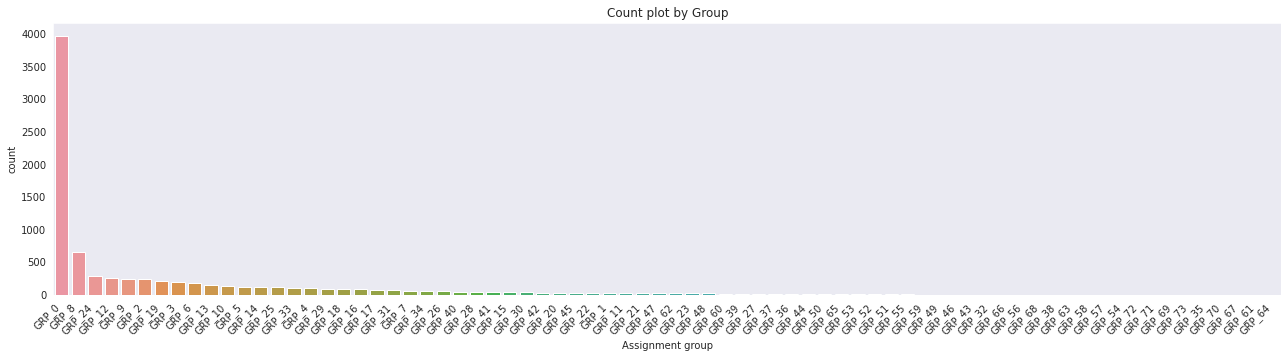

In [70]:
sns.set_style("dark")

descending_order = data['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
ax=sns.countplot(x='Assignment group', data=data,order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("Count plot by Group")
plt.show()

As seen from the graph above, the given data is highly skewed with GRP_0 having more than 45% of the records. The other groups with high records are GRP_8, GRP_24, GRP_12, GRP_9. There are many groups with only 1 record which leads to bias in the prediction.

In [71]:
data['Caller'].nunique()

2948

In [72]:
data['Caller'].value_counts()

bpctwhsn kzqsbmtp    810
ZkBogxib QsEJzdZO    151
fumkcsji sarmtlhy    134
rbozivdq gmlhrtvp     87
rkupnshb gsmzfojw     71
                    ... 
lqophnis rcmepgvq      1
vwaufgxr nvdyhlqk      1
qdgcilzf cpzlmesa      1
fbwqocvh olapczwf      1
tblmnxez ulcmryaf      1
Name: Caller, Length: 2948, dtype: int64

There are only 2948 callers in total for 8491 records which means that each caller may have raised one or more than one ticket.

In [73]:
caller_count = data['Caller'].value_counts()
caller_count.describe()

count    2948.000000
mean        2.880258
std        15.852312
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       810.000000
Name: Caller, dtype: float64

In [74]:
CallerGrp = data.groupby(['Caller'])
LeastDataCaller=[]
for grp in data['Caller'].unique():
  if(CallerGrp.get_group(grp).shape[0]<2):
    LeastDataCaller.append(grp)
print('Number of Callers who made only 1 call: ', (len(LeastDataCaller)))

Number of Callers who made only 1 call:  1459


**Observations:**

From the above data, it is clearly visible that:
1. The caller data is also highly skewed with the max being 810 but even the 75% data is at 3 records per caller. 
2. There were totally 2948 unique callers of which 1459 callers have created only 1 ticket. 
3. The remaining 1489 callers have created more than 2 tickets.
4. **bpctwhsn kzqsbmtp** is the caller who raised maximum tickets.
5. The top most word used in short description is **password reset**

## **Duplicates Removal and Translation**

In [75]:
#Find duplicate records in the given data
duplicate_data = data[data.duplicated()]
print(len(duplicate_data))

83


In [76]:
duplicate_data.head()

Short description  ... Assignment group
51                          call for ecwtrjnq jpecxuty  ...            GRP_0
229                         call for ecwtrjnq jpecxuty  ...            GRP_0
493                    ticket update on inplant_872730  ...            GRP_0
512                                   blank call //gso  ...            GRP_0
667  job bkbackup_tool_powder_prod_full failed in j...  ...            GRP_8

[5 rows x 4 columns]

Looks like there are 83 records with duplicate values and this needs to be cleaned.

In [77]:
#Removing those duplicates
data = data.drop_duplicates()
data.shape

(8408, 4)

All the 83 duplicate records have been removed from the data. Now lets continue with Translation.

In [78]:
df_before_translation = data.copy() ##Taking backup before translation
df_before_translation.tail()

Short description  ... Assignment group
8495                  emails not coming in from zz mail  ...           GRP_29
8496                           telephony_software issue  ...            GRP_0
8497  vip2: windows password reset for tifpdchb pedx...  ...            GRP_0
8498                     machine nÃ£o estÃ¡ funcionando  ...           GRP_62
8499  an mehreren pc`s lassen sich verschiedene prgr...  ...           GRP_49

[5 rows x 4 columns]

Since the data has lot of german text and also non-ascii characters, we need to translate all the data to English language. Hence using the google translator API to translate the given data for those records that are not in English language.

In [79]:
#Translate to english if the given sentence is not in english.
def Translate_to_English(x):
    translator = Translator()
    if translator.detect(x).lang != 'en':
        #print("Source: ", x)
        translatedText = translator.translate(x).text
        #print("Translated text in English: ", translatedText)
    else:
        translatedText = x
    return translatedText

In [80]:
#Translate the description column and short description column
for i in data.index:
  data['Description'][i] = Translate_to_English(str(data['Description'][i]))
  data['Short description'][i] = Translate_to_English(str(data['Short description'][i]))

In [81]:
data.tail()

Short description  ... Assignment group
8495                  emails not coming in from zz mail  ...           GRP_29
8496                           telephony_software issue  ...            GRP_0
8497  vip2: windows password reset for tifpdchb pedx...  ...            GRP_0
8498                             machine is not working  ...           GRP_62
8499  Different programs cannot be opened on several...  ...           GRP_49

[5 rows x 4 columns]

In [82]:
##Saved a copy of translated text as csv in drive
data.to_excel(project_path + 'Translated_Data.xlsx')

## **Data Cleansing & Preprocessing**

In [83]:
#Making a copy of the data and then cleaning the data
df_translated_before_cleaning = data.copy()

In [84]:
data.shape

(8408, 4)

### Clean the Description column

1. Combined short description and description columns together to make sure all the data is captured properly. Keeping Description and Short description separate does not make sense since both have repeated strings in most of the records. 
2. Also, since caller info is not relevant, removing that from the new dataframe.
3. The new data will have 8408 records with 2 columns

In [85]:
#Having callers unique list separately to remove the caller names from description later.
callers = data['Caller'].unique()

In [86]:
## merging the Short Description and Description Columns
new_data= pd.DataFrame({"Description": data["Short description"] + " " + data["Description"], "AssignmentGroup": data["Assignment group"]}, columns=["Description","AssignmentGroup"])

In [87]:
new_data.head()

Description AssignmentGroup
0  login issue -verified user details.(employee# ...           GRP_0
1  outlook \r\n\r\nreceived from: hmjdrvpb.komuay...           GRP_0
2  cant log in to vpn \r\n\r\nreceived from: eylq...           GRP_0
3  unable to access hr_tool page unable to access...           GRP_0
4                            skype error skype error           GRP_0

In [88]:
new_data.shape

(8408, 2)

In [89]:
new_data.isna().sum()

Description        0
AssignmentGroup    0
dtype: int64

The description has lots of unwanted characters/words like mail addresses, numbers, special characters, disclaimer messages etc. So we will clean them first.

1. Remove Disclaimers
2. Replace different formats like ftp with its location, ip address, etc with proper strings for better processing and predictions.
3. Check for valid dates
4. Remove emails, hyperlinks, numbers, special characters, non utf characters, etc


In [90]:
#This function is to remove the disclaimer messages given as part of the email sent by callers which is not needed
def Remove_Disclaimer(text):
   text = str(text)
   strDisclaimerMsg1 = r'this communication is intended solely for the use of the addressee and may contain information that is sensitive, confidential or excluded from disclosure in accordance with applicable law. it is strictly forbidden to distribute, distribute or reproduce this communication by anyone other than the intended recipient. if you have received this message by mistake, please notify the sender and delete this message.'
   strDisclaimerMsg2 = r'select the following link to view the disclaimer in an alternate language.'
   #to remove the pattern '[ # + company / posts> ['
   strDisclaimerMsg3 = r'\[.*?\['
   strDisclaimerMsg4 = r'this message is intended for the exclusive use of the person to whom it is addressed and may contain privileged, confidential information that is exempt from disclosure in accordance with the provisions of current legislation. any dissemination, distribution or reproduction of this message by someone other than the intended recipient is strictly prohibited. if you receive this message in error, please notify the sender and delete this message.'
   #text=text.lower()
   text = re.sub(strDisclaimerMsg1, ' ',str(text))
   text = re.sub(strDisclaimerMsg2, ' ',str(text))
   text = re.sub(strDisclaimerMsg3, ' ',str(text))
   text = re.sub(strDisclaimerMsg4, ' ',str(text))

   text = text.strip()
   return text


In [91]:
#Replace known formats with proper strings for better prediction
def preprocess_replace(text1):
  text1=text1.replace(to_replace='[Hh][Oo][sS][Tt][nN][Aa][Mm][Ee]_[0-9]*',value='hostname ',regex = True)
  text1=text1.replace(to_replace='ftp*.*', value='ftp location ', regex=True)
  text1=text1.replace(to_replace='[a-z0-9_]*.xlsx',value='excel ', regex=True)
  text1=text1.replace(to_replace='outside:[0-9./]*',value='outside ipaddress ',regex=True)
  text1=text1.replace(to_replace='inside:[0-9./]*',value='inside ipaddress ',regex=True)
  text1=text1.replace(to_replace='\\*hostname[_0-9]*',value='hostname ',regex=True)
  text1=text1.replace(to_replace='lmsl[0-9]*',value='lmsl ',regex=True)
  text1=text1.replace(to_replace='SID_[0-9][0-9]',value='sid ',regex = True)
  text1=text1.replace(to_replace='[Tt]icket_no[0-9]*',value='ticket_no ', regex=True)
  text1=text1.replace(to_replace='[jJ]ob_[0-9_a-z]*',value='job_id ',regex=True)
  text1=text1.replace(to_replace='[0-9]+.[0-9]+.[0-9]+.[0-9]+[/0-9]*',value='ipaddress ',regex=True)
  return text1

replace() function requires dataframe to be passed as such and not str format. Hence the call is outside of clean_data function

In [92]:
new_data['Description'] = preprocess_replace(new_data['Description'])
new_data.head()

Description AssignmentGroup
0  login issue -verified user details.(employee# ...           GRP_0
1  outlook \r\n\r\nreceived from: hmjdrvpb.komuay...           GRP_0
2  cant log in to vpn \r\n\r\nreceived from: eylq...           GRP_0
3  unable to access hr_tool page unable to access...           GRP_0
4                            skype error skype error           GRP_0

In [93]:
def is_valid_date(date_str):
    try:
        parser.parse(date_str)
        return True
    except:
        return False

In [94]:
def clean_data(text):
    text=text.lower()
    text = ' '.join([w for w in text.split() if not is_valid_date(w)])

    text = Remove_Disclaimer(text)
    text = re.sub(r"received from:",' ',text)
    text = re.sub(r"from:",' ',text)
    text = re.sub(r"to:",' ',text)
    text = re.sub(r"subject:",' ',text)
    text = re.sub(r"sent:",' ',text)
    text = re.sub(r"ic:",' ',text)
    text = re.sub(r"cc:",' ',text)
    text = re.sub(r"bcc:",' ',text)
    #Remove email 
    text = re.sub(r'\S*@\S*\s?', '', text)
    # Remove numbers 
    text = re.sub(r'\d+',' ' ,text)
    # Remove new line characters 
    text = re.sub(r'\n',' ',text)
    # Remove hashtag while keeping hashtag text
    text = re.sub(r'#',' ', text)
    #& 
    text = re.sub(r'&;?', 'and',text)
    # Remove HTML special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', '', text)
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)  
    # Remove characters beyond Readable formart by Unicode:
    text= ''.join(c for c in text if c <= '\uFFFF') 
    text = text.strip()
    # Remove unreadable characters  (also extra spaces)
    text = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
    for name in callers:
      namelist = [part for part in name.split()]
      for namepart in namelist: 
          text = text.replace(namepart,'')
          
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    text = re.sub(' +', ' ', text)
    text = text.strip()
    return text

In [95]:
#Cleaning the data and applying the regular expression rules
new_data['Description'] = new_data['Description'].apply(clean_data)

In [96]:
new_data.head()

Description AssignmentGroup
0  login issue verified user details employee and...           GRP_0
1  outlook hello team my meetings skype meetings ...           GRP_0
2    cant log in to vpn hi cannot log on to vpn best           GRP_0
3  unable to access hr tool page unable to access...           GRP_0
4                            skype error skype error           GRP_0

In [97]:
new_data.to_excel(project_path + "CleanedData.xlsx")

As you can see, all the unwanted characters/words are removed from the description column

## **Tokenization, Lemmatization and Stop words Removal**


As part of NLP data procesing, it is important to do Lemmatization, tokenization and stop words removal.

1. Tokenize the words
2. POS Tagging
3. Lemmatize the words
4. Remove the duplicate words in same sentence
5. Prepare bag of words for every record
6. Remove some of the known strings like hello, hi, good morning, good evening, etc

In [98]:
lemmatizer = WordNetLemmatizer()

# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# Function to convert array into string
def listToString(s):  
    str1 = " " 
    return (str1.join(s)) 
        

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tokenized = nltk.word_tokenize(sentence)
    ordered_tokens = set()
    result = [] 
    #remove duplicate words in sentence
    for word in nltk_tokenized:
        if word not in ordered_tokens:
            ordered_tokens.add(word) 
            result.append(word)
    new_desc = listToString(result)

    nltk_tagged = nltk.pos_tag(ordered_tokens)
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence),new_desc


temp =[]
temp1 = []
for sentence in new_data["Description"]:
    sentence = sentence.lower()
    cleanr = re.compile('<.*?>')
    sentence = re.sub(cleanr, ' ', sentence)        #Removing HTML tags
    sentence = re.sub(r'\S+@\S+', 'EmailId', sentence)
    sentence = re.sub(r'\'', '', sentence, re.I|re.A)
    sentence = re.sub(r'[0-9]', '', sentence, re.I|re.A)
    sentence = re.sub(r'[^a-zA-Z0-9\s]', ' ', sentence)
    sentence = sentence.lower()
    sentence = re.sub(r'com ', ' ', sentence, re.I|re.A)
    sentence = re.sub(r'hello team', ' ', sentence, re.I|re.A)
    sentence = re.sub(r'hello ', ' ', sentence, re.I|re.A)
    sentence = re.sub(r'hi team', ' ', sentence, re.I|re.A)
    sentence = re.sub(r'hi', ' ', sentence, re.I|re.A)
    sentence = re.sub(r'hello team', ' ', sentence, re.I|re.A)
    sentence = re.sub(r'best', ' ', sentence, re.I|re.A)
    sentence = re.sub(r'kind', ' ', sentence, re.I|re.A)
    sentence = re.sub(r'hello helpdesk', ' ', sentence, re.I|re.A)
    sentence = re.sub(r'good morning ', ' ', sentence, re.I|re.A)
    sentence = re.sub(r'good afternoon ', ' ', sentence, re.I|re.A)
    sentence = re.sub(r'good evening ', ' ', sentence, re.I|re.A)
    l_sentence,new_desc = lemmatize_sentence(sentence)

    words = [word for word in l_sentence.split() if word not in stopwords.words('english')]
    descWords = [word for word in new_desc.split() if word not in stopwords.words('english')]
    temp.append(words)
    temp1.append(listToString(descWords))

In [99]:
#Add the corrected description and bag of words in the data frame
new_data['BagOfWords'] = temp
new_data['NewDescription'] = temp1

In [100]:
new_data.head()

Description  ...                                     NewDescription
0  login issue verified user details employee and...  ...  login issue verified user details employee man...
1  outlook hello team my meetings skype meetings ...  ...  outlook meetings skype etc appearing calendar ...
2    cant log in to vpn hi cannot log on to vpn best  ...                                       cant log vpn
3  unable to access hr tool page unable to access...  ...                         unable access hr tool page
4                            skype error skype error  ...                                        skype error

[5 rows x 4 columns]

In [101]:
#Skip if any description is null or empty
final_data = new_data[new_data['NewDescription'].map(lambda d: len(d)) > 0]

In [102]:
final_data.shape

(8376, 4)

In [103]:
print(pd.Series({c: final_data[c].map(lambda x: len(str(x))).max() for c in final_data}).sort_values(ascending =False))

Description        7820
BagOfWords         4337
NewDescription     3263
AssignmentGroup       6
dtype: int64


The max length for description after all the clean up is 3249 characters. 

In [104]:
# calculate the length(number of characters) and number of words in every record and add it to the dataframe
final_data['length']=[len(text) for text in final_data['NewDescription']]
final_data['num_words'] = final_data['NewDescription'].apply(lambda x : len(x.split()))
final_data.head()

Description  ... num_words
0  login issue verified user details employee and...  ...        18
1  outlook hello team my meetings skype meetings ...  ...        10
2    cant log in to vpn hi cannot log on to vpn best  ...         3
3  unable to access hr tool page unable to access...  ...         5
4                            skype error skype error  ...         2

[5 rows x 6 columns]

In [105]:
final_data.shape

(8376, 6)

In [106]:
#Copy the data and take the records that has only more that 3 characters for final data
final_data1 =  final_data.copy()
final_data1=final_data1[final_data1['length']>=3]
final_data1.head()

Description  ... num_words
0  login issue verified user details employee and...  ...        18
1  outlook hello team my meetings skype meetings ...  ...        10
2    cant log in to vpn hi cannot log on to vpn best  ...         3
3  unable to access hr tool page unable to access...  ...         5
4                            skype error skype error  ...         2

[5 rows x 6 columns]

In [107]:
final_data1.drop(['Description'], axis=1,inplace=True)

In [108]:
final_data1.rename(columns = {'NewDescription':'Description'}, inplace = True)

In [109]:
final_data1 = final_data1[['Description','BagOfWords','length','num_words','AssignmentGroup']]
final_data1.head()

Description  ... AssignmentGroup
0  login issue verified user details employee man...  ...           GRP_0
1  outlook meetings skype etc appearing calendar ...  ...           GRP_0
2                                       cant log vpn  ...           GRP_0
3                         unable access hr tool page  ...           GRP_0
4                                        skype error  ...           GRP_0

[5 rows x 5 columns]

In [110]:
final_data1.shape

(8368, 5)

In [111]:
final_data1.describe().transpose()

count       mean         std  min   25%   50%     75%     max
length     8368.0  91.023662  140.974536  3.0  26.0  50.0  109.25  3263.0
num_words  8368.0  13.072897   18.898955  1.0   4.0   8.0   16.00   429.0

In [112]:
bins=[0,50,75, np.inf]
final_data1['bins']=pd.cut(final_data1.num_words, bins=[0,30,50,100,300, np.inf], labels=['0-30', '30-50', '50-100','100-300' ,'>300'])
word_distribution = final_data1.groupby('bins').size().reset_index().rename(columns={0:'counts'})

In [113]:
word_distribution

bins  counts
0     0-30    7672
1    30-50     502
2   50-100     155
3  100-300      32
4     >300       7

As seen above, the max character length for the description column in 3249 and max no. of words is 426. There are no records that have greater than 500 words. Almost 98% of the records have words in the range of 1-30 which means most of the customers have given only short description on their issue.

Text(0.5, 1.0, 'Word distribution per bin')

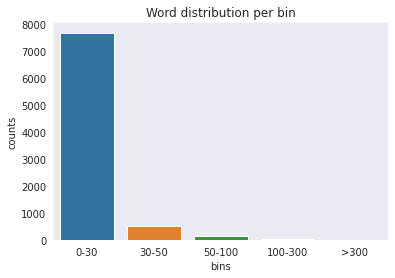

In [114]:
sns.barplot(x='bins', y='counts', data=word_distribution).set_title("Word distribution per bin")

In [115]:
final_data1.to_excel(project_path + "FinalData.xlsx")

### Combine non-frequent Assignment groups

Combining the groups that has less than 10 samples into a single group called LeastDataGroup. This is mainly done because, as seen in the EDA, there are 25 groups that had less than 10 samples only and this will not help in predictions. So combining them into one group will help to categorize/classify the tickets correctly.

We will see how the two data (1. Data without grouping, 2. Data with grouping) differ in the performance while modeling the data.

In [116]:
#Take a copy 
Final_Data_Grouped = final_data1.copy()

In [117]:
AssignmentGrp = Final_Data_Grouped.groupby(['AssignmentGroup'])
LeastDataGroup=[]
for grp in Final_Data_Grouped['AssignmentGroup'].unique():
  if(AssignmentGrp.get_group(grp).shape[0]<10):
    LeastDataGroup.append(grp)
print('Number of groups that has less than 10 samples: ', (len(LeastDataGroup)))
Final_Data_Grouped['AssignmentGroup']=Final_Data_Grouped['AssignmentGroup'].apply(lambda x : 'least_data_grp' if x in LeastDataGroup  else x)


Number of groups that has less than 10 samples:  25


In [118]:
Final_Data_Grouped['AssignmentGroup'].nunique()

50

In [119]:
Final_Data_Grouped['AssignmentGroup'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'least_data_grp', 'GRP_36', 'GRP_37', 'GRP_39',
       'GRP_40', 'GRP_41', 'GRP_42', 'GRP_44', 'GRP_45', 'GRP_47',
       'GRP_50', 'GRP_53', 'GRP_48', 'GRP_60', 'GRP_62', 'GRP_65'],
      dtype=object)

As you can see, the uniqueness count is reduced from 74 to 50 groups now for Assignment Group. The regrouping is done because with very less samples (each group having 1 or 2 records) might not help us in proper classification and that can impact our accuracy. So we will group such data into 1 group (Least data group/miscellaneous group) that can help us improve the accuracy.

## **Bigrams & TriGrams**

We will build a bigram and trigram model and see how the words are co-occuring together in the given data

In [120]:
#Split the given sentence to individual words
def SplitSentenceToWords(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [121]:
#Collect the bag of words
bag_of_words = list(SplitSentenceToWords(final_data1['Description']))
print(bag_of_words[1])

['outlook', 'meetings', 'skype', 'etc', 'appearing', 'calendar', 'somebody', 'please', 'advise', 'correct']


In [122]:
# define the bigram and trigram models (higher threshold is used to have fewer phrases)
bigram = gensim.models.Phrases(bag_of_words, min_count=5, threshold=100) 
trigram = gensim.models.Phrases(bigram[bag_of_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_model = gensim.models.phrases.Phraser(bigram)
trigram_model = gensim.models.phrases.Phraser(trigram)

In [123]:
#Build bigram and trigram model for given data
def Build_Bigrams(texts):
    return [bigram_model[doc] for doc in texts]

def Build_Trigrams(texts):
    return [trigram_model[doc] for doc in texts]


In [ ]:
# Form Bigrams
data_words_bigrams = Build_Bigrams(bag_of_words)
print(data_words_bigrams)

#Form trigrams
data_words_trigrams = Build_Trigrams(data_words_bigrams)
print(data_words_trigrams)

You can see the sample bigram and trigram data as seen above.

1. **Bigram samples**: details_employee, checked_ad, caller_confirmed, etc
2. **Trigram samples**: details_employee_manager, caller_confirmed_able, ticket_update_inplant

### Word Cloud for Bigrams

Building word cloud gives a very good representation of the frequent words occuring together and further actions to be taken accordingly

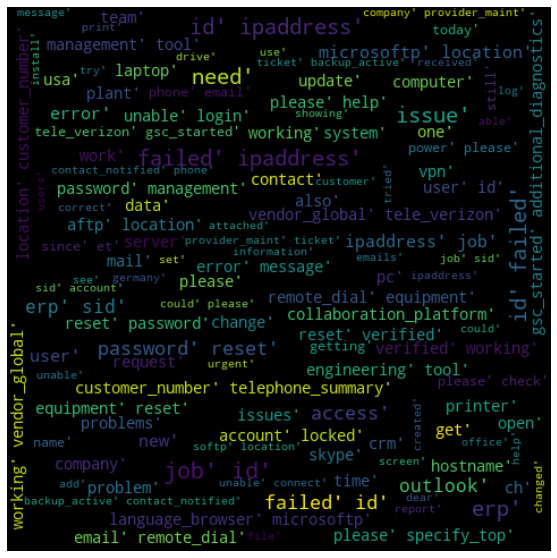

In [125]:
#Build word cloud for Bigrams Model
wordclouds=' '.join(map(str, data_words_bigrams))
wordcloud = WordCloud(width=480, height=480, max_font_size=20, min_font_size=10).generate(wordclouds)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

### Word Cloud for Trigrams

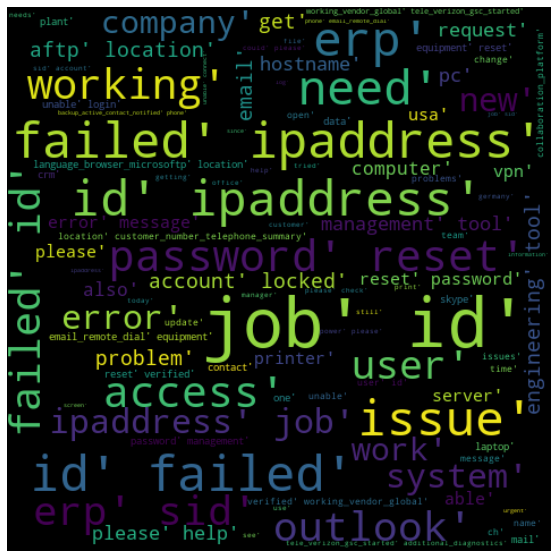

In [126]:
wordcloud_trigram=' '.join(map(str, data_words_trigrams))
wordcloud = WordCloud(width=480, height=480, max_words=100).generate(wordcloud_trigram)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

## **Word Cloud for Groups**

Let's see the word cloud for different groups. This will give a good representation on the maximum usage of words in every group and helps better in classification

In [127]:
stopwords = set(STOPWORDS)
## function to create Word Cloud
def show_wordcloud(data, title):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10, 5))
    plt.axis('off')
    #fig.title("Top 100 words of {}".format(title))
    if title: 
        fig.suptitle("Top 100 words of {}".format(title), fontsize=50, color='blue', fontweight = 'bold')
        #fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [128]:
#Sorting based on frequency of target class Assignment group
value = final_data1['AssignmentGroup'].value_counts().sort_values(ascending=False).index
value

Index(['GRP_0', 'GRP_8', 'GRP_24', 'GRP_12', 'GRP_9', 'GRP_2', 'GRP_19',
       'GRP_3', 'GRP_6', 'GRP_13', 'GRP_10', 'GRP_5', 'GRP_14', 'GRP_25',
       'GRP_33', 'GRP_4', 'GRP_29', 'GRP_18', 'GRP_16', 'GRP_17', 'GRP_7',
       'GRP_31', 'GRP_34', 'GRP_26', 'GRP_40', 'GRP_28', 'GRP_41', 'GRP_15',
       'GRP_42', 'GRP_20', 'GRP_45', 'GRP_22', 'GRP_1', 'GRP_11', 'GRP_21',
       'GRP_47', 'GRP_23', 'GRP_62', 'GRP_30', 'GRP_39', 'GRP_27', 'GRP_60',
       'GRP_37', 'GRP_36', 'GRP_44', 'GRP_50', 'GRP_48', 'GRP_53', 'GRP_65',
       'GRP_52', 'GRP_51', 'GRP_55', 'GRP_59', 'GRP_49', 'GRP_46', 'GRP_43',
       'GRP_66', 'GRP_32', 'GRP_68', 'GRP_38', 'GRP_63', 'GRP_56', 'GRP_58',
       'GRP_71', 'GRP_72', 'GRP_69', 'GRP_54', 'GRP_57', 'GRP_61', 'GRP_35',
       'GRP_70', 'GRP_64', 'GRP_67', 'GRP_73'],
      dtype='object')

In [129]:
print(len(value))

74


There are totally 74 groups and we will see the top 100 words of top 3 groups

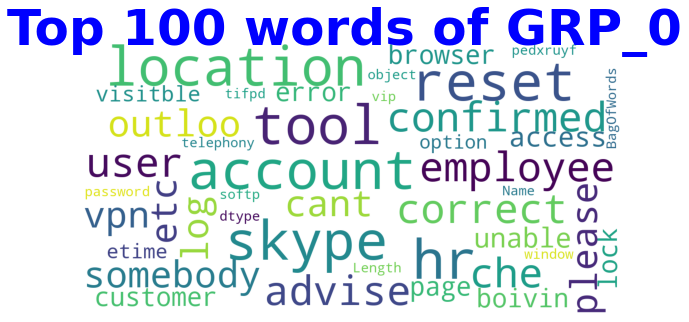

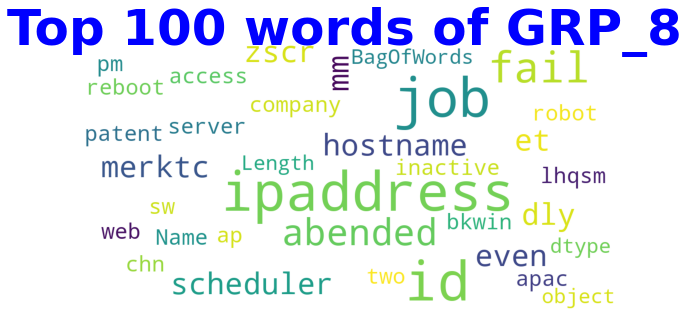

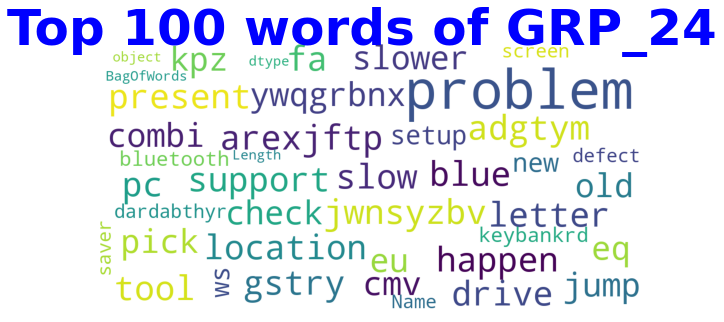

In [130]:
group = ['GRP_0','GRP_8', 'GRP_24' ]
for i in range(len(group)):

    CloudGrp = final_data1[final_data1['AssignmentGroup'] == group[i]]
    CloudGrp = CloudGrp['BagOfWords']
    show_wordcloud(CloudGrp,group[i])

**Observations:**

1. GRP 0  are mostly account related issues like skype account, vpn account, access issues where HR or manager help is required to proceed further
2. GRP 8 is mostly related to server issues, scheduler job issues that is not working or inactive and needs a restart
3. GRP 24 is mostly related to computer issues like screen issues, drive issues, computer slowness, bluetooth issues etc which needs support to be fixed

## **Create Dictionary**

In [131]:
# Create Dictionary
id2word = corpora.Dictionary(final_data1['BagOfWords'])

# Create Corpus from post clean data 
texts = final_data1['BagOfWords']

# Term Document Frequency and Bag of words 
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
# View as ID
print(corpus[:1])

In [ ]:
# View as word
print([[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]])

## **Test and Train Data Split**

For our modeling and train_test_split, we will use both the data:
1. data with grouping that is stored in the dataframe Final_Data_grouped 
2. data without grouping that is stored in the dataframe final_data1

and see how the performance/accuracy of the model differs and which model works better.


### Split Train, Test and Validation data

In [134]:
#save the 2 different data frames in excel file.
final_data1.to_excel(project_path + "FinalDataUngrouped.xlsx")
Final_Data_Grouped.to_excel(project_path + "FinalDataGrouped.xlsx")

In [135]:
# Split into Test, train, validation for Ungrouped data

train_ratio = 0.60
validation_ratio = 0.20
test_ratio = 0.20

final_data1.head()
X = final_data1['Description']
y = final_data1['AssignmentGroup']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

In [136]:
# Split into Test, train, validation for Grouped data

train_ratio = 0.60
validation_ratio = 0.20
test_ratio = 0.20

Final_Data_Grouped.head()
X_Grped = Final_Data_Grouped['Description']
Y_Grped = Final_Data_Grouped['AssignmentGroup']
X_train_Grped, X_test_Grped, y_train_Grped, y_test_Grped = train_test_split(X_Grped, Y_Grped, test_size=1 - train_ratio)

X_val_Grped, X_test_Grped, y_val_Grped, y_test_Grped = train_test_split(X_test_Grped, y_test_Grped, test_size=test_ratio/(test_ratio + validation_ratio)) 

# **Machine Learning Modeling**


In this section, we will use some of the traditional Machine learning models to see how the results are achieved for both kind of data approach that we are using.

We will use:

1. Logistic Regression Model
2. Support Vector Classifier Model
3. Decision tree Classifier Model
4. Random Forest Model
5. Adaboost Classifier Model

In [137]:
#Create a new dataframe to save the accuracy scores of all the models
Compare_Models = pd.DataFrame(columns= ['Accuracy','F1 Score'])
#Common function to append all the model results for comparion
def AppendModelResults(IndexName, AccuracyScore, F1Score):
  global Compare_Models
  new_row = [AccuracyScore,F1Score]
  Compare_Models = Compare_Models.append(pd.Series(new_row, index=Compare_Models.columns, name=IndexName))
  display(Compare_Models)


### Logistic Regression Model for Ungrouped data

In [138]:
# Model1 : Logistic regression model to build, fit and predict the target class
#build the pipeline
lr = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', LogisticRegression()),
             ])

#fit the model with training data
lr.fit(X_train, y_train)
#predict the model for test data
y_pred = lr.predict(X_test)

#calculate scores and print classification report
LR_Accuracy_Score = accuracy_score(y_test,y_pred)
print('accuracy %s' % LR_Accuracy_Score)
LR_F1_Score = f1_score(y_test,y_pred, average='weighted')
print('Testing F1 score: {}'.format(LR_F1_Score))
print(classification_report(y_test, y_pred))

accuracy 0.6427718040621266
Testing F1 score: 0.553272621944078
              precision    recall  f1-score   support

       GRP_0       0.64      0.99      0.78       814
       GRP_1       0.00      0.00      0.00         7
      GRP_10       0.86      0.26      0.40        23
      GRP_11       0.00      0.00      0.00         5
      GRP_12       0.62      0.44      0.51        48
      GRP_13       0.69      0.37      0.48        30
      GRP_14       0.78      0.28      0.41        25
      GRP_15       0.00      0.00      0.00         5
      GRP_16       0.00      0.00      0.00        20
      GRP_17       1.00      0.67      0.80         9
      GRP_18       0.00      0.00      0.00        11
      GRP_19       0.29      0.05      0.08        41
       GRP_2       0.82      0.41      0.55        44
      GRP_20       0.00      0.00      0.00         6
      GRP_21       0.00      0.00      0.00         9
      GRP_22       0.00      0.00      0.00         6
      GRP_23     

In [139]:
AppendModelResults('LR_Model', LR_Accuracy_Score, LR_F1_Score)

Accuracy  F1 Score
LR_Model  0.642772  0.553273

### Logistic Regression Model for Grouped data

In [140]:
lr_grped = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', LogisticRegression()),
             ])


lr_grped.fit(X_train_Grped, y_train_Grped)
y_pred_grped = lr_grped.predict(X_test_Grped)

LR_Grp_Accuracy_Score = accuracy_score(y_test_Grped,y_pred_grped)
print('accuracy %s' % LR_Grp_Accuracy_Score)
LR_Grp_F1_Score = f1_score(y_test_Grped,y_pred_grped, average='weighted')
print('Testing F1 score: {}'.format(LR_Grp_F1_Score))
print(classification_report(y_test_Grped, y_pred_grped))

accuracy 0.6111111111111112
Testing F1 score: 0.5140805897868745
                precision    recall  f1-score   support

         GRP_0       0.61      0.99      0.75       787
         GRP_1       0.00      0.00      0.00         7
        GRP_10       1.00      0.22      0.36        32
        GRP_11       0.00      0.00      0.00         8
        GRP_12       0.47      0.45      0.46        44
        GRP_13       0.75      0.20      0.32        44
        GRP_14       1.00      0.17      0.29        30
        GRP_15       0.00      0.00      0.00        10
        GRP_16       0.00      0.00      0.00        11
        GRP_17       1.00      0.83      0.91        12
        GRP_18       1.00      0.38      0.55        16
        GRP_19       0.60      0.07      0.12        44
         GRP_2       0.65      0.35      0.46        48
        GRP_20       0.00      0.00      0.00         4
        GRP_21       0.00      0.00      0.00         4
        GRP_22       0.00      0.00   

### Compare the Models

In [141]:
AppendModelResults('LR_Grped', LR_Grp_Accuracy_Score, LR_Grp_F1_Score)

Accuracy  F1 Score
LR_Model  0.642772  0.553273
LR_Grped  0.611111  0.514081

**Observations:**

1. Accuracy and F1 Score for grped data are slightly better than ungrouped ones. 

But we can see how the behavior is with other models as well

### Support Vector Classifier Model for Ungrouped data

In [142]:
#Model 2: Support Vector Classifier

svc = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', SVC()),
              ])
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
SVC_Accuracy_Score = accuracy_score(y_test, y_pred)
print('accuracy %s' % SVC_Accuracy_Score)
SVC_F1_Score = f1_score(y_test, y_pred, average='weighted')
print('Testing F1 score: {}'.format(SVC_F1_Score))
print(classification_report(y_test, y_pred))

accuracy 0.6433691756272402
Testing F1 score: 0.5531217734138609
              precision    recall  f1-score   support

       GRP_0       0.63      0.99      0.77       814
       GRP_1       1.00      0.14      0.25         7
      GRP_10       0.88      0.30      0.45        23
      GRP_11       0.00      0.00      0.00         5
      GRP_12       0.69      0.46      0.55        48
      GRP_13       1.00      0.17      0.29        30
      GRP_14       0.88      0.28      0.42        25
      GRP_15       0.00      0.00      0.00         5
      GRP_16       0.00      0.00      0.00        20
      GRP_17       0.89      0.89      0.89         9
      GRP_18       0.00      0.00      0.00        11
      GRP_19       0.00      0.00      0.00        41
       GRP_2       0.78      0.41      0.54        44
      GRP_20       0.00      0.00      0.00         6
      GRP_21       0.00      0.00      0.00         9
      GRP_22       0.00      0.00      0.00         6
      GRP_23    

In [143]:
AppendModelResults('SVC Model', SVC_Accuracy_Score, SVC_F1_Score)

Accuracy  F1 Score
LR_Model   0.642772  0.553273
LR_Grped   0.611111  0.514081
SVC Model  0.643369  0.553122

### Support Vector Classifier Model for Grouped data

In [144]:
svc = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', SVC()),
              ])
svc.fit(X_train_Grped, y_train_Grped)

y_pred_grped= svc.predict(X_test_Grped)
SVC_Grped_Accuracy_Score = accuracy_score(y_test_Grped, y_pred_grped)
print('accuracy %s' % SVC_Grped_Accuracy_Score)
SVC_Grped_F1_Score = f1_score(y_test_Grped, y_pred_grped, average='weighted')
print('Testing F1 score: {}'.format(SVC_Grped_F1_Score))
print(classification_report(y_test_Grped, y_pred_grped))

accuracy 0.6135005973715651
Testing F1 score: 0.5199719711736132
                precision    recall  f1-score   support

         GRP_0       0.60      0.99      0.75       787
         GRP_1       1.00      0.14      0.25         7
        GRP_10       1.00      0.22      0.36        32
        GRP_11       0.00      0.00      0.00         8
        GRP_12       0.50      0.41      0.45        44
        GRP_13       1.00      0.11      0.20        44
        GRP_14       1.00      0.27      0.42        30
        GRP_15       0.00      0.00      0.00        10
        GRP_16       0.00      0.00      0.00        11
        GRP_17       1.00      1.00      1.00        12
        GRP_18       1.00      0.25      0.40        16
        GRP_19       0.00      0.00      0.00        44
         GRP_2       0.79      0.40      0.53        48
        GRP_20       0.00      0.00      0.00         4
        GRP_21       0.00      0.00      0.00         4
        GRP_22       0.00      0.00   

### Compare the Models

In [145]:
AppendModelResults('SVC_Grped',SVC_Grped_Accuracy_Score,SVC_Grped_F1_Score)

Accuracy  F1 Score
LR_Model   0.642772  0.553273
LR_Grped   0.611111  0.514081
SVC Model  0.643369  0.553122
SVC_Grped  0.613501  0.519972

### Decision Tree Classifier Model with Ungrouped data





In [146]:
#Model 3: Decision Tree Classifier
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', DecisionTreeClassifier()),
              ])
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
DT_Accuracy_Score = accuracy_score(y_test, y_pred)
print('accuracy %s' % DT_Accuracy_Score)
DT_F1_Score = f1_score(y_test, y_pred, average='weighted')
print('Testing F1 score: {}'.format(DT_F1_Score))
print(classification_report(y_test, y_pred))

accuracy 0.5997610513739546
Testing F1 score: 0.5867719530724079
              precision    recall  f1-score   support

       GRP_0       0.79      0.84      0.81       814
       GRP_1       0.50      0.29      0.36         7
      GRP_10       0.36      0.39      0.37        23
      GRP_11       0.00      0.00      0.00         5
      GRP_12       0.51      0.50      0.51        48
      GRP_13       0.32      0.27      0.29        30
      GRP_14       0.40      0.40      0.40        25
      GRP_15       0.30      0.60      0.40         5
      GRP_16       0.42      0.25      0.31        20
      GRP_17       0.82      1.00      0.90         9
      GRP_18       0.02      0.09      0.04        11
      GRP_19       0.26      0.22      0.24        41
       GRP_2       0.45      0.39      0.41        44
      GRP_20       0.00      0.00      0.00         6
      GRP_21       0.00      0.00      0.00         9
      GRP_22       0.00      0.00      0.00         6
      GRP_23    

In [147]:
AppendModelResults('Decision Tree', DT_Accuracy_Score, DT_F1_Score)

Accuracy  F1 Score
LR_Model       0.642772  0.553273
LR_Grped       0.611111  0.514081
SVC Model      0.643369  0.553122
SVC_Grped      0.613501  0.519972
Decision Tree  0.599761  0.586772

### Decision Tree Classifier for Grouped data

In [148]:
#Model 3: Decision Tree Classifier
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', DecisionTreeClassifier()),
              ])
nb.fit(X_train_Grped, y_train_Grped)

y_pred_grped = nb.predict(X_test_Grped)
DT_Grped_Accuracy_Score = accuracy_score(y_test_Grped, y_pred_grped)
print('accuracy %s' % DT_Grped_Accuracy_Score)
DT_Grped_F1_Score = f1_score(y_test_Grped, y_pred_grped, average='weighted')
print('Testing F1 score: {}'.format(DT_Grped_F1_Score))
print(classification_report(y_test_Grped, y_pred_grped))

accuracy 0.5806451612903226
Testing F1 score: 0.5735036658555601
                precision    recall  f1-score   support

         GRP_0       0.78      0.80      0.79       787
         GRP_1       0.50      0.14      0.22         7
        GRP_10       0.45      0.28      0.35        32
        GRP_11       0.50      0.25      0.33         8
        GRP_12       0.48      0.50      0.49        44
        GRP_13       0.57      0.36      0.44        44
        GRP_14       0.58      0.47      0.52        30
        GRP_15       0.22      0.40      0.29        10
        GRP_16       0.27      0.36      0.31        11
        GRP_17       0.80      1.00      0.89        12
        GRP_18       0.10      0.25      0.14        16
        GRP_19       0.27      0.20      0.23        44
         GRP_2       0.39      0.40      0.39        48
        GRP_20       0.00      0.00      0.00         4
        GRP_21       0.00      0.00      0.00         4
        GRP_22       0.00      0.00   

In [149]:
AppendModelResults('Decision Tree Grped', DT_Grped_Accuracy_Score, DT_Grped_F1_Score)

Accuracy  F1 Score
LR_Model             0.642772  0.553273
LR_Grped             0.611111  0.514081
SVC Model            0.643369  0.553122
SVC_Grped            0.613501  0.519972
Decision Tree        0.599761  0.586772
Decision Tree Grped  0.580645  0.573504

### Random Forest Model for Ungrouped data


In [150]:
#Model 4: Random Forest Classifier
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', RandomForestClassifier()),
              ])
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
RF_Accuracy_Score = accuracy_score(y_test, y_pred)
print('accuracy %s' % RF_Accuracy_Score )
RF_F1_Score = f1_score(y_test, y_pred, average='weighted')
print('Testing F1 score: {}'.format(RF_F1_Score))
print(classification_report(y_test, y_pred))

accuracy 0.6594982078853047
Testing F1 score: 0.5891215172170993
              precision    recall  f1-score   support

       GRP_0       0.68      0.97      0.80       814
       GRP_1       0.67      0.29      0.40         7
      GRP_10       0.80      0.35      0.48        23
      GRP_11       0.00      0.00      0.00         5
      GRP_12       0.62      0.60      0.61        48
      GRP_13       0.62      0.50      0.56        30
      GRP_14       0.70      0.28      0.40        25
      GRP_15       0.00      0.00      0.00         5
      GRP_16       0.00      0.00      0.00        20
      GRP_17       1.00      0.89      0.94         9
      GRP_18       0.12      0.18      0.14        11
      GRP_19       0.75      0.07      0.13        41
       GRP_2       0.74      0.39      0.51        44
      GRP_20       0.00      0.00      0.00         6
      GRP_21       0.00      0.00      0.00         9
      GRP_22       0.00      0.00      0.00         6
      GRP_23    

In [151]:
AppendModelResults('Random Forest', RF_Accuracy_Score, RF_F1_Score)

Accuracy  F1 Score
LR_Model             0.642772  0.553273
LR_Grped             0.611111  0.514081
SVC Model            0.643369  0.553122
SVC_Grped            0.613501  0.519972
Decision Tree        0.599761  0.586772
Decision Tree Grped  0.580645  0.573504
Random Forest        0.659498  0.589122

### Random Forest Classifier for Grouped data

In [152]:
#Model 4: Random Forest Classifier
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', RandomForestClassifier()),
              ])
nb.fit(X_train_Grped, y_train_Grped)

y_pred_grped = nb.predict(X_test_Grped)
RF_Grped_Accuracy_Score = accuracy_score(y_test_Grped, y_pred_grped)
print('accuracy %s' % RF_Grped_Accuracy_Score )
RF_Grped_F1_Score = f1_score(y_test_Grped, y_pred_grped, average='weighted')
print('Testing F1 score: {}'.format(RF_Grped_F1_Score))
print(classification_report(y_test_Grped, y_pred_grped))

accuracy 0.6367980884109916
Testing F1 score: 0.5649512228762369
                precision    recall  f1-score   support

         GRP_0       0.65      0.98      0.78       787
         GRP_1       1.00      0.14      0.25         7
        GRP_10       1.00      0.22      0.36        32
        GRP_11       0.00      0.00      0.00         8
        GRP_12       0.53      0.52      0.53        44
        GRP_13       0.65      0.34      0.45        44
        GRP_14       0.80      0.40      0.53        30
        GRP_15       0.00      0.00      0.00        10
        GRP_16       1.00      0.09      0.17        11
        GRP_17       1.00      1.00      1.00        12
        GRP_18       0.25      0.31      0.28        16
        GRP_19       0.75      0.07      0.12        44
         GRP_2       0.71      0.31      0.43        48
        GRP_20       1.00      0.25      0.40         4
        GRP_21       0.00      0.00      0.00         4
        GRP_22       0.00      0.00   

In [153]:
AppendModelResults('Random Forest Grped', RF_Grped_Accuracy_Score, RF_Grped_F1_Score)

Accuracy  F1 Score
LR_Model             0.642772  0.553273
LR_Grped             0.611111  0.514081
SVC Model            0.643369  0.553122
SVC_Grped            0.613501  0.519972
Decision Tree        0.599761  0.586772
Decision Tree Grped  0.580645  0.573504
Random Forest        0.659498  0.589122
Random Forest Grped  0.636798  0.564951

### Adaboost Classifier Model for Ungrouped data


In [154]:
#Model 5: Adaboost Classifier

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', AdaBoostClassifier()),
              ])
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
ABC_Accuarcy_Score = accuracy_score(y_test, y_pred)
print('accuracy %s' % ABC_Accuarcy_Score )
ABC_F1_Score = f1_score(y_test, y_pred, average='weighted')
print('Testing F1 score: {}'.format(ABC_F1_Score))
print(classification_report(y_test, y_pred))

accuracy 0.5173237753882916
Testing F1 score: 0.38692630166473413
              precision    recall  f1-score   support

       GRP_0       0.60      0.95      0.74       814
       GRP_1       0.00      0.00      0.00         7
      GRP_10       0.00      0.00      0.00        23
      GRP_11       0.00      0.00      0.00         5
      GRP_12       0.00      0.00      0.00        48
      GRP_13       0.00      0.00      0.00        30
      GRP_14       0.00      0.00      0.00        25
      GRP_15       0.00      0.00      0.00         5
      GRP_16       0.00      0.00      0.00        20
      GRP_17       0.00      0.00      0.00         9
      GRP_18       0.00      0.00      0.00        11
      GRP_19       0.00      0.00      0.00        41
       GRP_2       0.00      0.00      0.00        44
      GRP_20       0.00      0.00      0.00         6
      GRP_21       0.00      0.00      0.00         9
      GRP_22       0.00      0.00      0.00         6
      GRP_23   

In [155]:
AppendModelResults('AdaBoost', ABC_Accuarcy_Score, ABC_F1_Score)

Accuracy  F1 Score
LR_Model             0.642772  0.553273
LR_Grped             0.611111  0.514081
SVC Model            0.643369  0.553122
SVC_Grped            0.613501  0.519972
Decision Tree        0.599761  0.586772
Decision Tree Grped  0.580645  0.573504
Random Forest        0.659498  0.589122
Random Forest Grped  0.636798  0.564951
AdaBoost             0.517324  0.386926

### AdaBoost Classifier for Grouped data

In [156]:
#Model 5: Adaboost Classifier

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', AdaBoostClassifier()),
              ])
nb.fit(X_train_Grped, y_train_Grped)

y_pred_grped = nb.predict(X_test_Grped)
ABC_Grped_Accuarcy_Score = accuracy_score(y_test_Grped,y_pred_grped)
print('accuracy %s' % ABC_Grped_Accuarcy_Score )
ABC_Grped_F1_Score = f1_score(y_test_Grped, y_pred_grped, average='weighted')
print('Testing F1 score: {}'.format(ABC_Grped_Accuarcy_Score))
print(classification_report(y_test_Grped, y_pred_grped))

accuracy 0.4862604540023895
Testing F1 score: 0.4862604540023895
                precision    recall  f1-score   support

         GRP_0       0.58      0.94      0.71       787
         GRP_1       0.00      0.00      0.00         7
        GRP_10       0.00      0.00      0.00        32
        GRP_11       0.00      0.00      0.00         8
        GRP_12       0.25      0.02      0.04        44
        GRP_13       0.00      0.00      0.00        44
        GRP_14       0.00      0.00      0.00        30
        GRP_15       0.00      0.00      0.00        10
        GRP_16       0.00      0.00      0.00        11
        GRP_17       0.00      0.00      0.00        12
        GRP_18       0.00      0.00      0.00        16
        GRP_19       0.00      0.00      0.00        44
         GRP_2       0.00      0.00      0.00        48
        GRP_20       0.00      0.00      0.00         4
        GRP_21       0.00      0.00      0.00         4
        GRP_22       0.00      0.00   

### Compare the Models

In [157]:
AppendModelResults('AdaBoost Grped', ABC_Grped_Accuarcy_Score, ABC_Grped_F1_Score)

Accuracy  F1 Score
LR_Model             0.642772  0.553273
LR_Grped             0.611111  0.514081
SVC Model            0.643369  0.553122
SVC_Grped            0.613501  0.519972
Decision Tree        0.599761  0.586772
Decision Tree Grped  0.580645  0.573504
Random Forest        0.659498  0.589122
Random Forest Grped  0.636798  0.564951
AdaBoost             0.517324  0.386926
AdaBoost Grped       0.486260  0.361604

**Observations:**

Of all the models,Decision Tree and Random forest had the highest F1 and accuracy score and AdaBoost classifier had the lower accuracy and F1 score. All the other models performed similarly and there is not much difference between grouped and ungrouped data. Hence we will use the grouped data in the upcoming models.

# **Deep Learning Modeling**

Setting different Parameters for the model

In [158]:
max_features = 9000
maxlen = 100 ## Add your max length here ##
embedding_size = 100

Apply tokenizer on description column

In [159]:
tokenizer = KerasTokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(Final_Data_Grouped['Description'].values)

### Label Encoding for Assignment Group (Target Class)

In [160]:
#Apply label encoder for assignment group
le = LabelEncoder()
Final_Data_Grouped['EncodedGroup'] = le.fit_transform(Final_Data_Grouped['AssignmentGroup'])

In [161]:
Final_Data_Grouped.tail()

Description  ... EncodedGroup
8495  emails coming zz mail good aftp location recei...  ...           22
8496                           telephony softp location  ...            0
8497       vip windows password reset tifpdchb pedxruyf  ...            0
8498  mac ne working unable access utilities finish ...  ...           44
8499      different programs opened several pc area cnc  ...           49

[5 rows x 7 columns]

### Define X and Y for model

In [162]:
X = tokenizer.texts_to_sequences(Final_Data_Grouped['Description'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(Final_Data_Grouped['EncodedGroup'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 8368
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  27  12  97  16 119 157  51  25
 227 174  11   6 374  37 224 183  31 166]
Number of Labels:  8368
0


### Train and Test Split

In [163]:
# Split into Test, train, validation for Ungrouped data

train_ratio = 0.60
validation_ratio = 0.20
test_ratio = 0.20

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state=0)

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state=0)

In [164]:
#print the corresponding shapes
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)

(5020, 100)
(5020,)
(1674, 100)
(1674,)
(1674, 100)
(1674,)


In [165]:
print(x_train)
print(y_train)

[[   0    0    0 ... 8659 4677 8660]
 [   0    0    0 ...    3   10    1]
 [   0    0    0 ...   13  679   33]
 ...
 [   0    0    0 ...    3   10    1]
 [   0    0    0 ...    0    0    4]
 [   0    0    0 ...   90  332  371]]
[17 42 21 ... 48 24  5]


In [ ]:
tokenizer.word_index.items()

In [167]:
#define the vocab size
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

10708


## Word2Vec & Glove Embedding

### Create Word2Vec file

In [168]:
#Create word2vec embedding and save the vector values in a text file
sentences = [line.split(' ') for line in Final_Data_Grouped['Description']]
word2vec = Word2Vec(sentences=sentences,min_count=1)
word2vec.wv.save_word2vec_format(project_path+ 'word2vec_vector.txt')

In [169]:
# load the whole embedding into memory
embeddings1 = dict()
f = open(project_path+'word2vec_vector.txt')

for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings1[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings1))

Loaded 10708 word vectors.


### Create Weight Matrix for Word2Vec

In [170]:
embedding_matrix = np.zeros((vocab_size, 100))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings1.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings1.values())

10708

### Get GLOVE Word embedding

In [171]:
glove_file = project_path + "glove.6B.zip"

In [172]:
EMBEDDING_FILE = project_path + 'glove.6B.100d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

In [173]:
EMBEDDING_FILE = project_path + 'glove.6B.200d.txt'

embeddings_200 = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings_200[word] = embd

In [174]:
EMBEDDING_FILE = project_path + 'glove.6B.300d.txt'

embeddings_300 = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings_300[word] = embd

In [175]:
EMBEDDING_FILE = project_path + 'glove.6B.50d.txt'

embeddings_50 = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings_50[word] = embd

### Create Weight Matrix for GlOVE

In [176]:
embedding_matrix_glove = np.zeros((vocab_size, 100))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix_glove[i] = embedding_vector

embedding_matrix_glove.shape

(10708, 100)

In [177]:
embedding_matrix_glove_200 = np.zeros((vocab_size, 200))

for word, i in tokenizer.word_index.items():
    embedding_vector_200 = embeddings_200.get(word)
    if embedding_vector_200 is not None:
        embedding_matrix_glove_200[i] = embedding_vector_200

embedding_matrix_glove_200.shape

(10708, 200)

In [178]:
embedding_matrix_glove_300 = np.zeros((vocab_size, 300))

for word, i in tokenizer.word_index.items():
    embedding_vector_300 = embeddings_300.get(word)
    if embedding_vector_300 is not None:
        embedding_matrix_glove_300[i] = embedding_vector_300

embedding_matrix_glove_300.shape

(10708, 300)

In [179]:
embedding_matrix_glove_50 = np.zeros((vocab_size, 50))

for word, i in tokenizer.word_index.items():
    embedding_vector_50 = embeddings_50.get(word)
    if embedding_vector_50 is not None:
        embedding_matrix_glove_50[i] = embedding_vector_50

embedding_matrix_glove_50.shape

(10708, 50)

## Common function for calculating Scores, plotting confusion matrix and loss and accuracy graph

In [180]:
#Common function to calculate accuracy and F1 score for test data
def calculate_Accuracy_F1_Score(y_test, y_pred):
   mat_test = confusion_matrix(y_test,y_pred)
   draw_cm(mat_test)
   report = classification_report(y_test,y_pred)
   accuracyScore = accuracy_score(y_test,y_pred)
   f1Score = f1_score(y_test, y_pred, average='weighted')
   return report, accuracyScore, f1Score

In [181]:
#Function to plot the confusion matrix
def draw_cm(conf_matrix):
   CategoryNames = []
   plt.clf()
   CategoryNames = Final_Data_Grouped['AssignmentGroup'].unique()
   xytics = np.arange(len(CategoryNames))
   myArray = [CategoryNames, CategoryNames]
   plt.figure(figsize=(30,30))
   plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Oranges)
   thresh = conf_matrix.max() / 2
   for i in range(conf_matrix.shape[0]):
     for j in range(conf_matrix.shape[1]):
        plt.text(j,i,format(conf_matrix[i, j]), ha='center',va='center')
   plt.title('Confusion Matrix - Vizualization')
   plt.xticks(xytics, labels=CategoryNames, rotation = 90)
   plt.yticks(xytics, labels=CategoryNames)
   plt.ylabel('True')
   plt.xlabel('Predicted')
   plt.tight_layout()
   plt.colorbar()
   plt.show()

In [182]:
# Visualize history
# Plot history: Validation and Training loss
def plot_loss(Model_history):
  plt.clf()
  plt.plot(Model_history.history['val_loss'], label='Validation Loss')
  plt.plot(Model_history.history['loss'], label = 'Training Loss')
  plt.title('Validation & Training loss history')
  plt.ylabel('Loss value')
  plt.xlabel('No. epoch')
  plt.legend()
  plt.show

def plot_accuracy(Model_history):
# Plot history: Validation and Training Accuracy
  plt.clf()
  plt.plot(Model_history.history['val_acc'], label = 'Validation Accuracy')
  plt.plot(Model_history.history['acc'], label = 'Training Accuracy')
  plt.title('Validation & Training accuracy history')
  plt.ylabel('Accuracy value (%)')
  plt.xlabel('No. epoch')
  plt.legend()
  plt.show()

## Create and Compile Simple Sequential Model

In [183]:
# Define the Keras model
model = Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=maxlen))
model.add(Dropout(0.50))
model.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(Dropout(0.50))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dropout(0.50))
model.add(Dense(50, activation='softmax'))
model.compile(optimizer=Adam(lr = 0.01), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [184]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1070800   
_________________________________________________________________
dropout (Dropout)            (None, 100, 100)          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 100, 32)           6432      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 32)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 50, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1600)              0

In [185]:
Batch_size = 100
Epochs = 5

Model_history = model.fit(x_train, y_train, batch_size = Batch_size, validation_data = (x_val,y_val), epochs = Epochs)

Epoch 1/5
51/51 [==============================] - 1s 19ms/step - loss: 2.4445 - acc: 0.4865 - val_loss: 1.9749 - val_acc: 0.5484
Epoch 2/5
51/51 [==============================] - 1s 13ms/step - loss: 1.9746 - acc: 0.5398 - val_loss: 1.9600 - val_acc: 0.5842
Epoch 3/5
51/51 [==============================] - 1s 14ms/step - loss: 1.7971 - acc: 0.5588 - val_loss: 1.8277 - val_acc: 0.5962
Epoch 4/5
51/51 [==============================] - 1s 13ms/step - loss: 1.6741 - acc: 0.5833 - val_loss: 1.7727 - val_acc: 0.5932
Epoch 5/5
51/51 [==============================] - 1s 14ms/step - loss: 1.6537 - acc: 0.5976 - val_loss: 1.7960 - val_acc: 0.5902


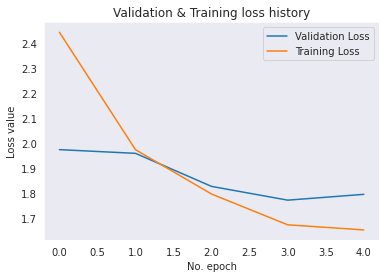

In [186]:
plot_loss(Model_history)

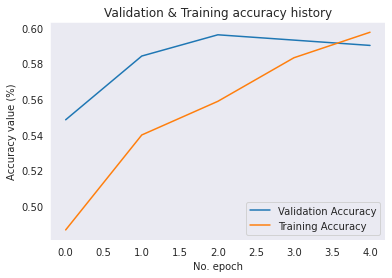

In [187]:
plot_accuracy(Model_history)

In [188]:
# Test the model after training
test_results = model.evaluate(x_test, y_test, verbose=False)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {100*test_results[1]}%')

Test results - Loss: 1.8956892490386963 - Accuracy: 57.40740895271301%


In [189]:
y_pred = model.predict_classes(x_test)

<Figure size 432x288 with 0 Axes>

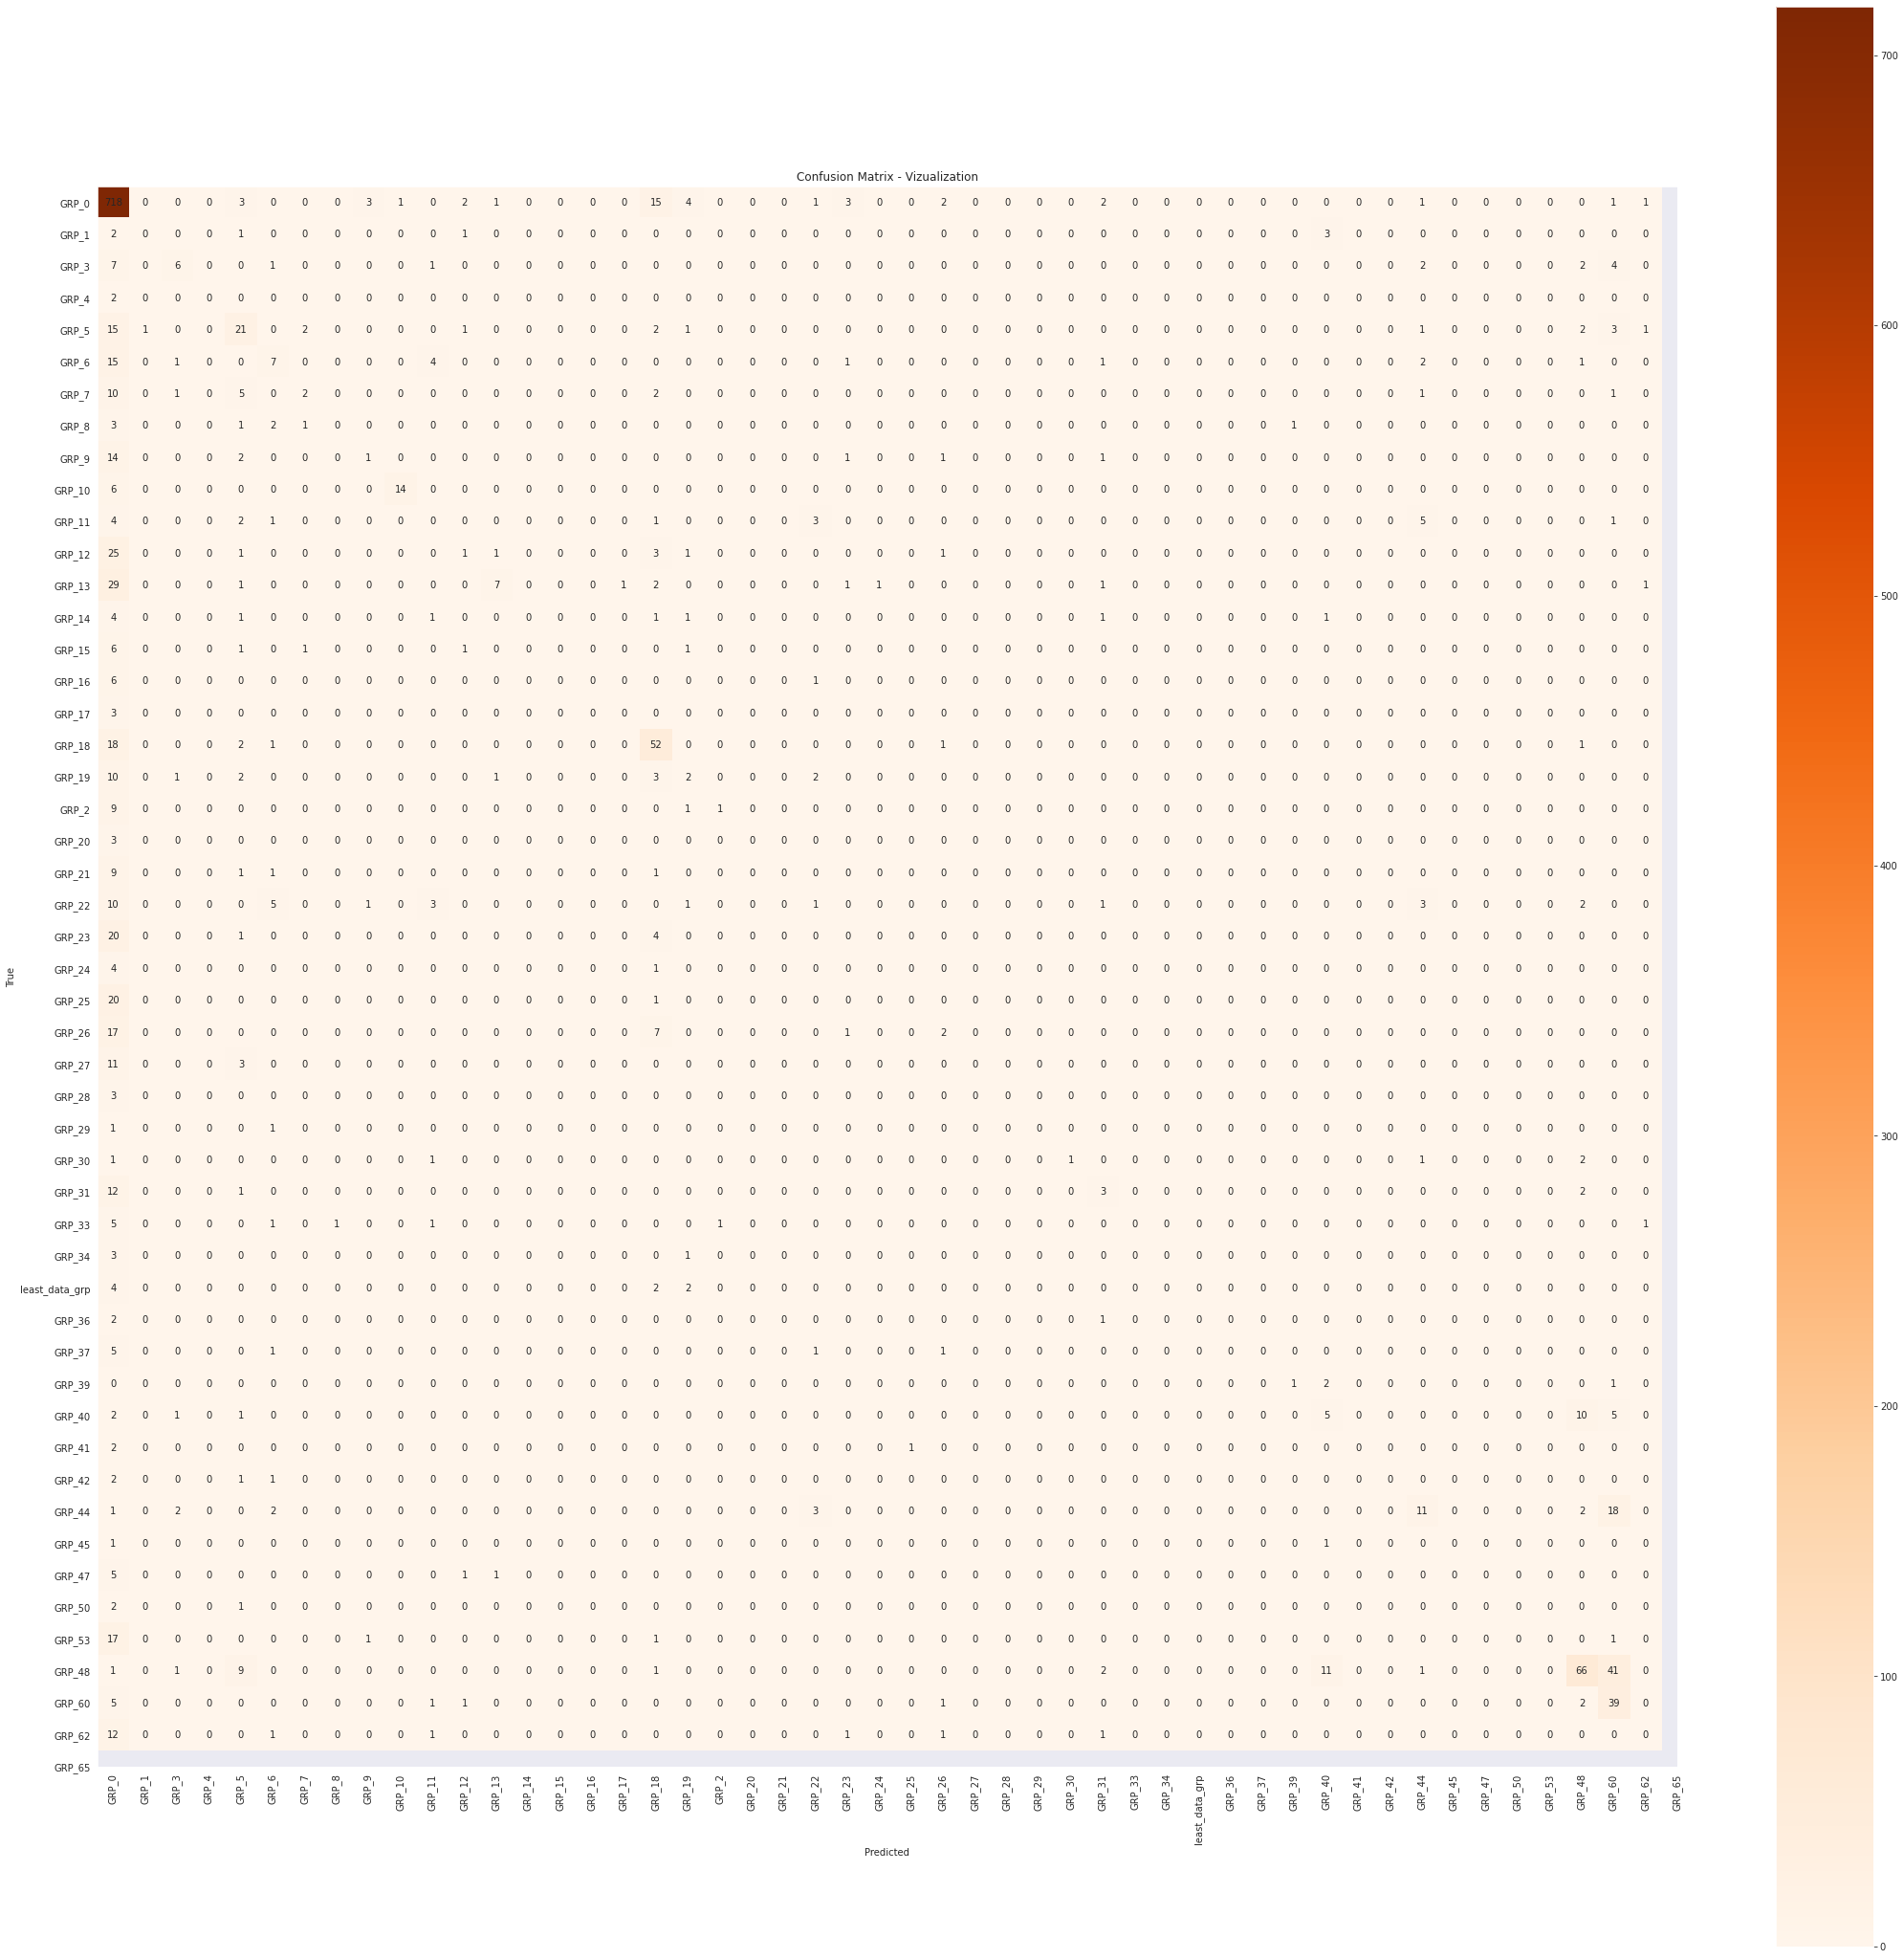

In [190]:
report, Seq_NLP_Accuracy_Score, Seq_NLP_F1_Score = calculate_Accuracy_F1_Score(y_test,y_pred)

In [191]:
print("Accuracy Score: ", Seq_NLP_Accuracy_Score)
print("F1 Score: ", Seq_NLP_F1_Score)
print("Classification Report: ")
print(report)

Accuracy Score:  0.5740740740740741
F1 Score:  0.5000274324795618
Classification Report: 
              precision    recall  f1-score   support

           0       0.66      0.95      0.78       758
           1       0.00      0.00      0.00         7
           2       0.46      0.26      0.33        23
           3       0.00      0.00      0.00         2
           4       0.34      0.42      0.38        50
           5       0.28      0.22      0.25        32
           6       0.33      0.09      0.14        22
           7       0.00      0.00      0.00         8
           8       0.17      0.05      0.08        20
           9       0.93      0.70      0.80        20
          10       0.00      0.00      0.00        17
          11       0.12      0.03      0.05        33
          12       0.64      0.16      0.25        44
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00        10
          15       0.00      0.00      0.00  

In [192]:
AppendModelResults('Sequential NLP', Seq_NLP_Accuracy_Score, Seq_NLP_F1_Score)

Accuracy  F1 Score
LR_Model             0.642772  0.553273
LR_Grped             0.611111  0.514081
SVC Model            0.643369  0.553122
SVC_Grped            0.613501  0.519972
Decision Tree        0.599761  0.586772
Decision Tree Grped  0.580645  0.573504
Random Forest        0.659498  0.589122
Random Forest Grped  0.636798  0.564951
AdaBoost             0.517324  0.386926
AdaBoost Grped       0.486260  0.361604
Sequential NLP       0.574074  0.500027

## Create and Compile a Simple LSTM Model with Word2Vec Embedding

In [193]:
lstm_model = Sequential()
#Embedding layer
lstm_model.add(Embedding(vocab_size, embedding_size, weights=[embedding_matrix]))
lstm_model.add(LSTM(units=128))
lstm_model.add(Flatten())
lstm_model.add(Dropout(0.50))
lstm_model.add(Dense(50, activation='relu'))
lstm_model.add(Flatten())
lstm_model.add(Dropout(0.50))
lstm_model.add(Dense(50, activation='softmax'))
lstm_model.compile(optimizer=Adam(lr = 0.01), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [194]:
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         1070800   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                6450      
_________________________________________________________________
flatten_2 (Flatten)          (None, 50)                0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)               

In [195]:
Batch_size = 100
Epochs = 5

Lstm_Model_history = lstm_model.fit(x_train, y_train, batch_size = Batch_size, validation_data = (x_val,y_val), epochs = Epochs)

Epoch 1/5
51/51 [==============================] - 2s 30ms/step - loss: 2.4883 - acc: 0.4875 - val_loss: 2.0147 - val_acc: 0.5335
Epoch 2/5
51/51 [==============================] - 1s 21ms/step - loss: 2.0151 - acc: 0.5386 - val_loss: 1.9071 - val_acc: 0.5765
Epoch 3/5
51/51 [==============================] - 1s 21ms/step - loss: 1.7748 - acc: 0.5641 - val_loss: 1.8859 - val_acc: 0.5830
Epoch 4/5
51/51 [==============================] - 1s 21ms/step - loss: 1.6350 - acc: 0.5717 - val_loss: 1.9300 - val_acc: 0.5747
Epoch 5/5
51/51 [==============================] - 1s 20ms/step - loss: 1.4877 - acc: 0.5964 - val_loss: 2.0560 - val_acc: 0.5717


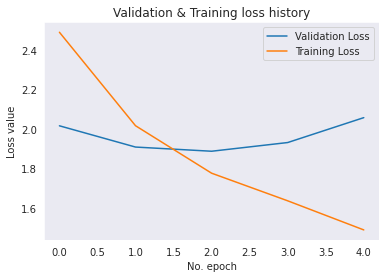

In [196]:
plot_loss(Lstm_Model_history)

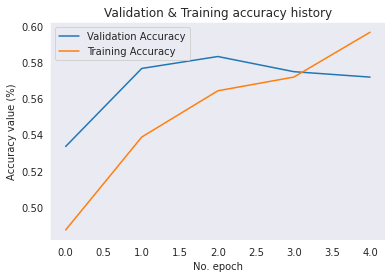

In [197]:
plot_accuracy(Lstm_Model_history)

In [198]:
# Test the model after training
test_results = lstm_model.evaluate(x_test, y_test, verbose=False)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {100*test_results[1]}%')

Test results - Loss: 2.128716468811035 - Accuracy: 56.0931921005249%


In [199]:
y_pred = lstm_model.predict_classes(x_test)

<Figure size 432x288 with 0 Axes>

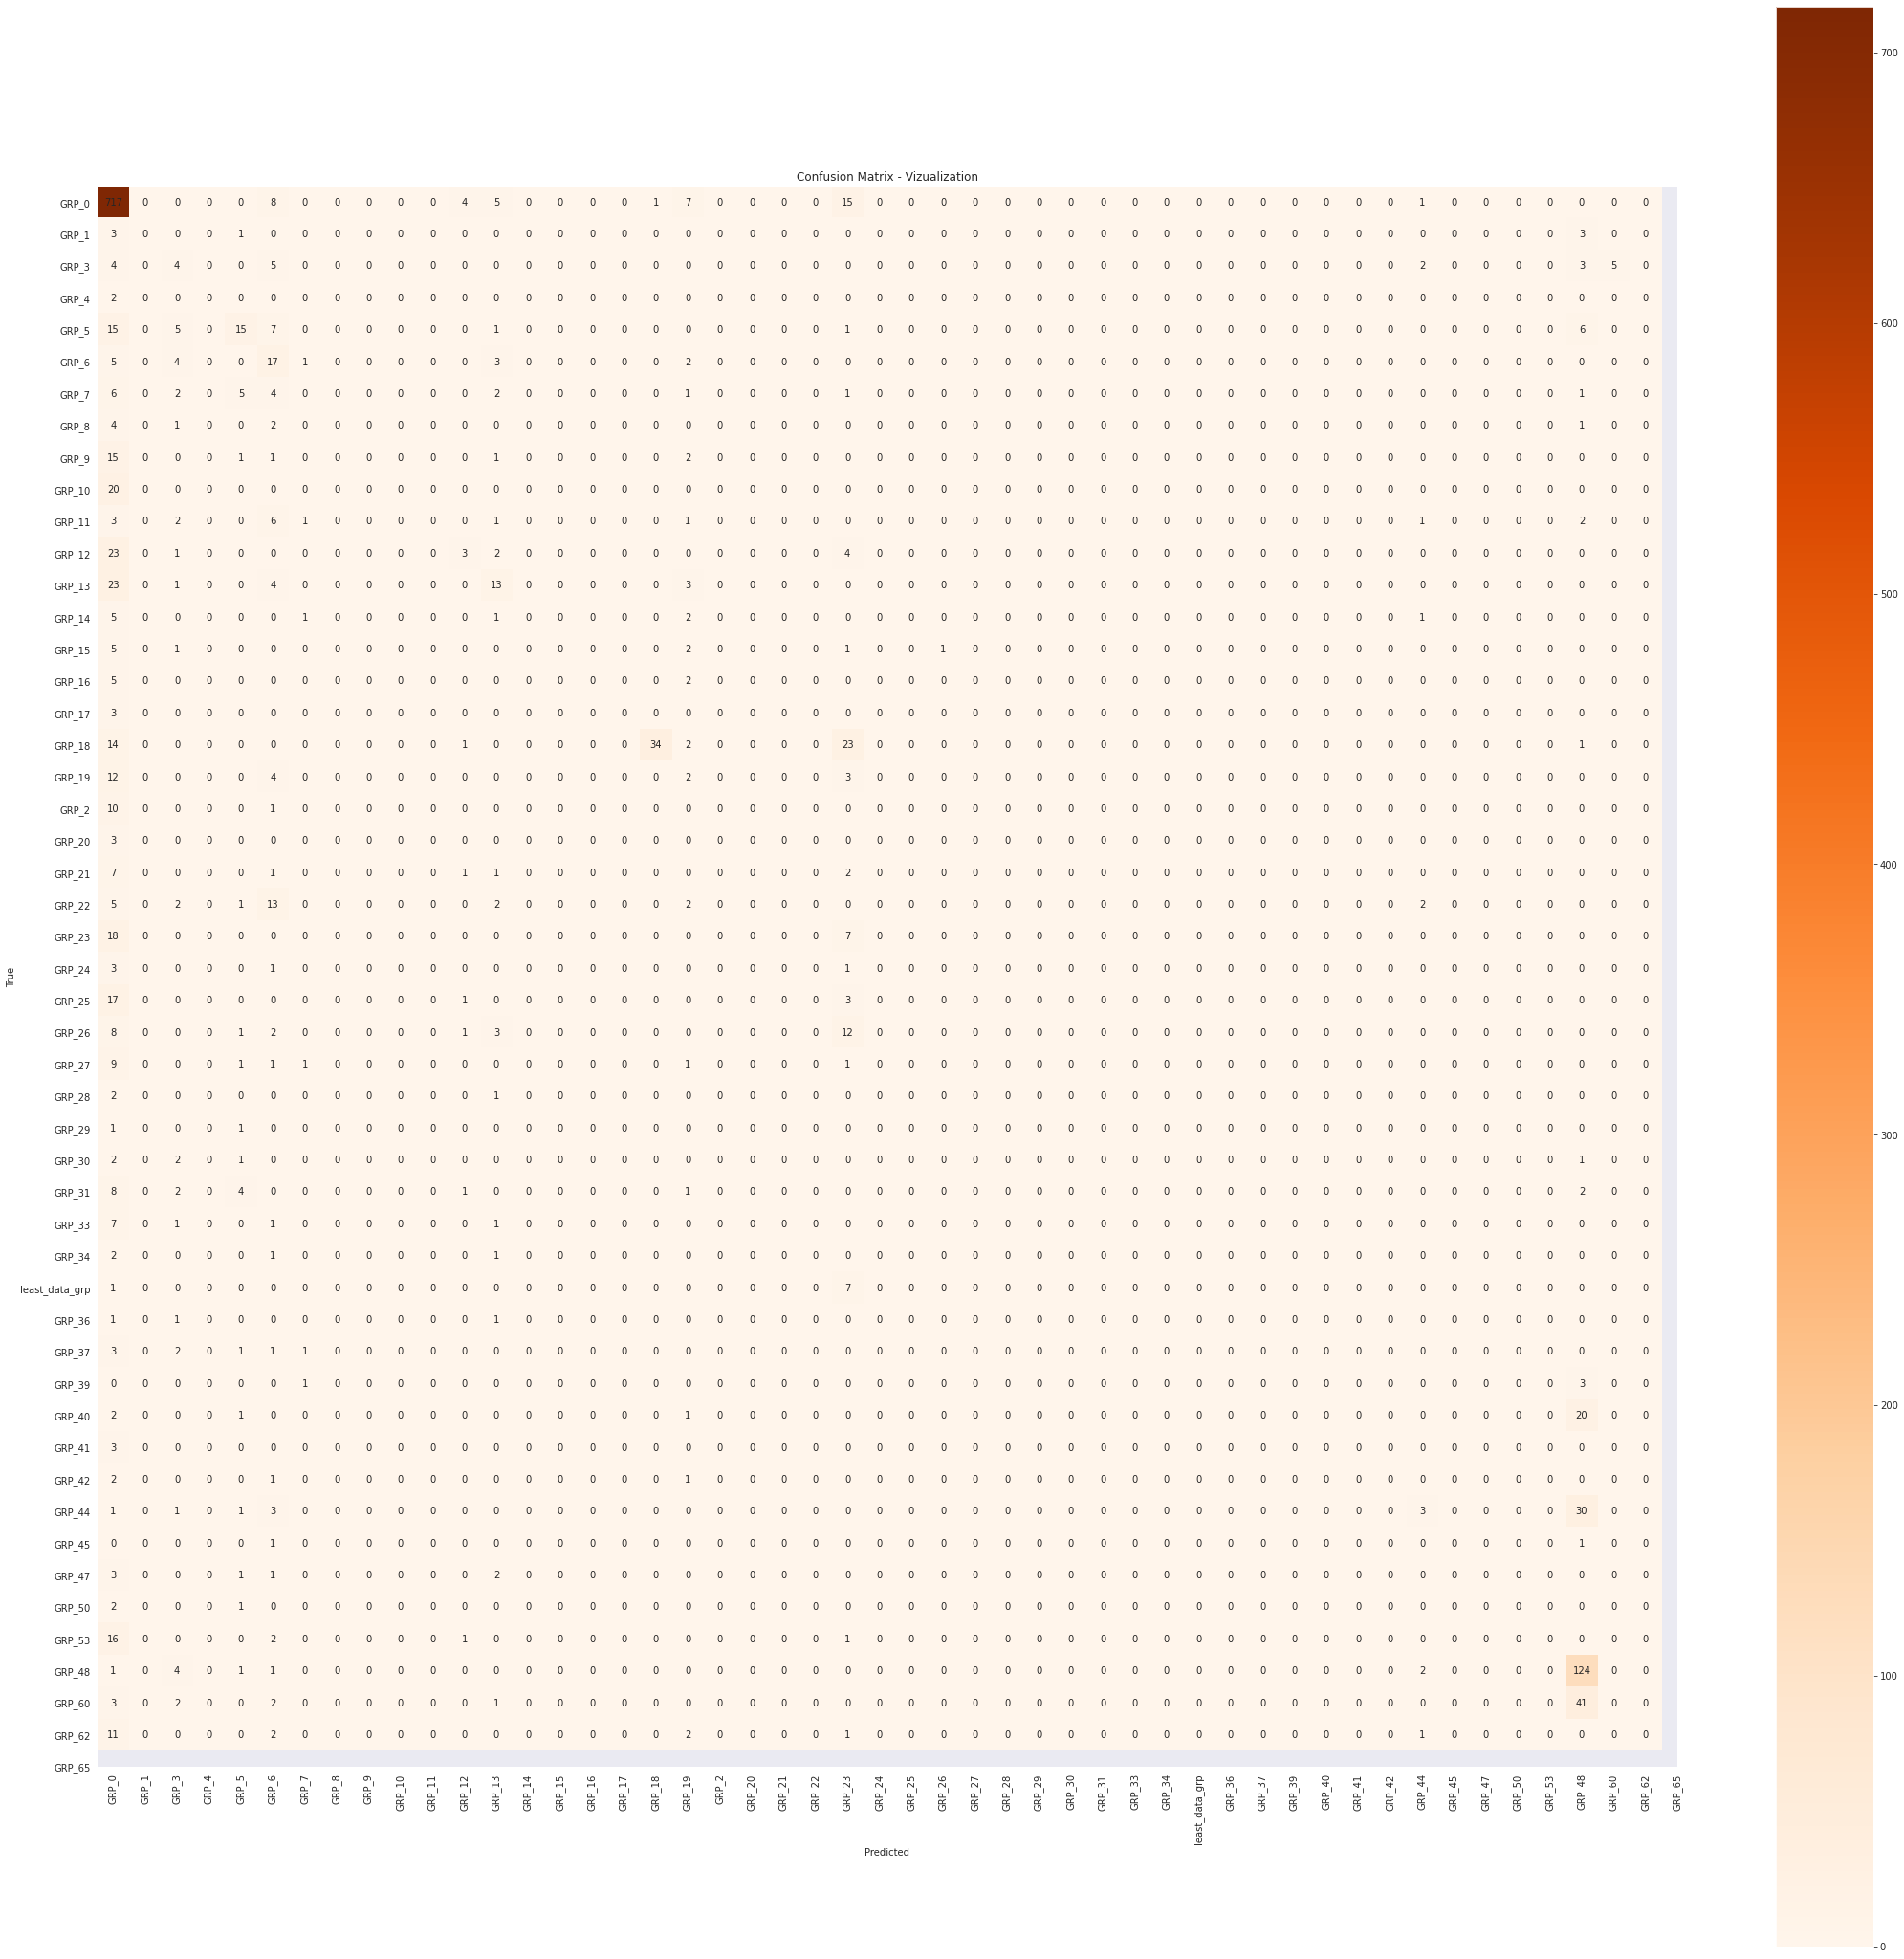

In [200]:
lstm_report, LSTM_Accuracy_Score,LSTM_F1_Score = calculate_Accuracy_F1_Score(y_test, y_pred)

In [201]:
print("Accuracy_Score: ", LSTM_Accuracy_Score)
print("F1 Score: ", LSTM_F1_Score)
print(lstm_report)

Accuracy_Score:  0.5609318996415771
F1 Score:  0.4761634770580561
              precision    recall  f1-score   support

           0       0.69      0.95      0.80       758
           1       0.00      0.00      0.00         7
           2       0.11      0.17      0.13        23
           3       0.00      0.00      0.00         2
           4       0.41      0.30      0.34        50
           5       0.18      0.53      0.27        32
           6       0.00      0.00      0.00        22
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        20
           9       0.00      0.00      0.00        20
          10       0.00      0.00      0.00        17
          11       0.23      0.09      0.13        33
          12       0.31      0.30      0.30        44
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00        10
          15       0.00      0.00      0.00         7
          16   

In [202]:
AppendModelResults('LSTM with Word2Vec', LSTM_Accuracy_Score, LSTM_F1_Score)

Accuracy  F1 Score
LR_Model             0.642772  0.553273
LR_Grped             0.611111  0.514081
SVC Model            0.643369  0.553122
SVC_Grped            0.613501  0.519972
Decision Tree        0.599761  0.586772
Decision Tree Grped  0.580645  0.573504
Random Forest        0.659498  0.589122
Random Forest Grped  0.636798  0.564951
AdaBoost             0.517324  0.386926
AdaBoost Grped       0.486260  0.361604
Sequential NLP       0.574074  0.500027
LSTM with Word2Vec   0.560932  0.476163

## Create and Compile a Simple LSTM Model with GLOVE Embedding

In [203]:
lstm_model_glove = Sequential()
#Embedding layer
lstm_model_glove.add(Embedding(vocab_size, embedding_size, weights=[embedding_matrix_glove]))
lstm_model_glove.add(LSTM(units=128))
lstm_model_glove.add(Flatten())
lstm_model_glove.add(Dropout(0.50))
lstm_model_glove.add(Dense(50, activation='tanh'))
lstm_model_glove.add(Flatten())
lstm_model_glove.add(Dropout(0.50))
lstm_model_glove.add(Dense(50, activation='softmax'))
lstm_model_glove.compile(optimizer=Adam(lr = 0.01), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [204]:
lstm_model_glove.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         1070800   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
flatten_3 (Flatten)          (None, 128)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                6450      
_________________________________________________________________
flatten_4 (Flatten)          (None, 50)                0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)               

In [205]:
Batch_size = 100
Epochs = 5

Lstm_glove_Model_history = lstm_model_glove.fit(x_train, y_train, batch_size = Batch_size, validation_data = (x_val,y_val), epochs = Epochs)

Epoch 1/5
51/51 [==============================] - 2s 30ms/step - loss: 2.3977 - acc: 0.4908 - val_loss: 1.9160 - val_acc: 0.5699
Epoch 2/5
51/51 [==============================] - 1s 22ms/step - loss: 1.8986 - acc: 0.5528 - val_loss: 1.7660 - val_acc: 0.5914
Epoch 3/5
51/51 [==============================] - 1s 22ms/step - loss: 1.6063 - acc: 0.6000 - val_loss: 1.7266 - val_acc: 0.6087
Epoch 4/5
51/51 [==============================] - 1s 21ms/step - loss: 1.3774 - acc: 0.6355 - val_loss: 1.7169 - val_acc: 0.6057
Epoch 5/5
51/51 [==============================] - 1s 20ms/step - loss: 1.1907 - acc: 0.6717 - val_loss: 1.7566 - val_acc: 0.5968


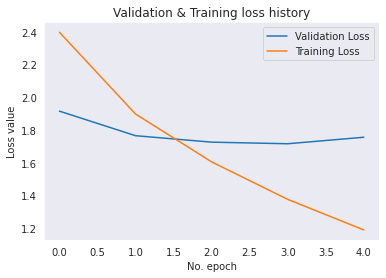

In [206]:
plot_loss(Lstm_glove_Model_history)

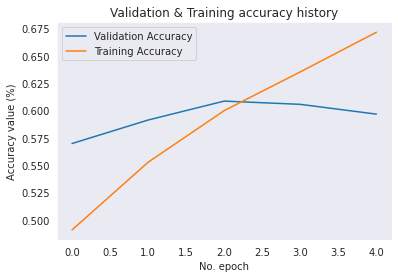

In [207]:
plot_accuracy(Lstm_glove_Model_history)

In [208]:
# Test the model after training
test_results = lstm_model_glove.evaluate(x_test, y_test, verbose=False)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {100*test_results[1]}%')

Test results - Loss: 1.8448033332824707 - Accuracy: 57.825565338134766%


In [209]:
y_pred = lstm_model_glove.predict_classes(x_test)

<Figure size 432x288 with 0 Axes>

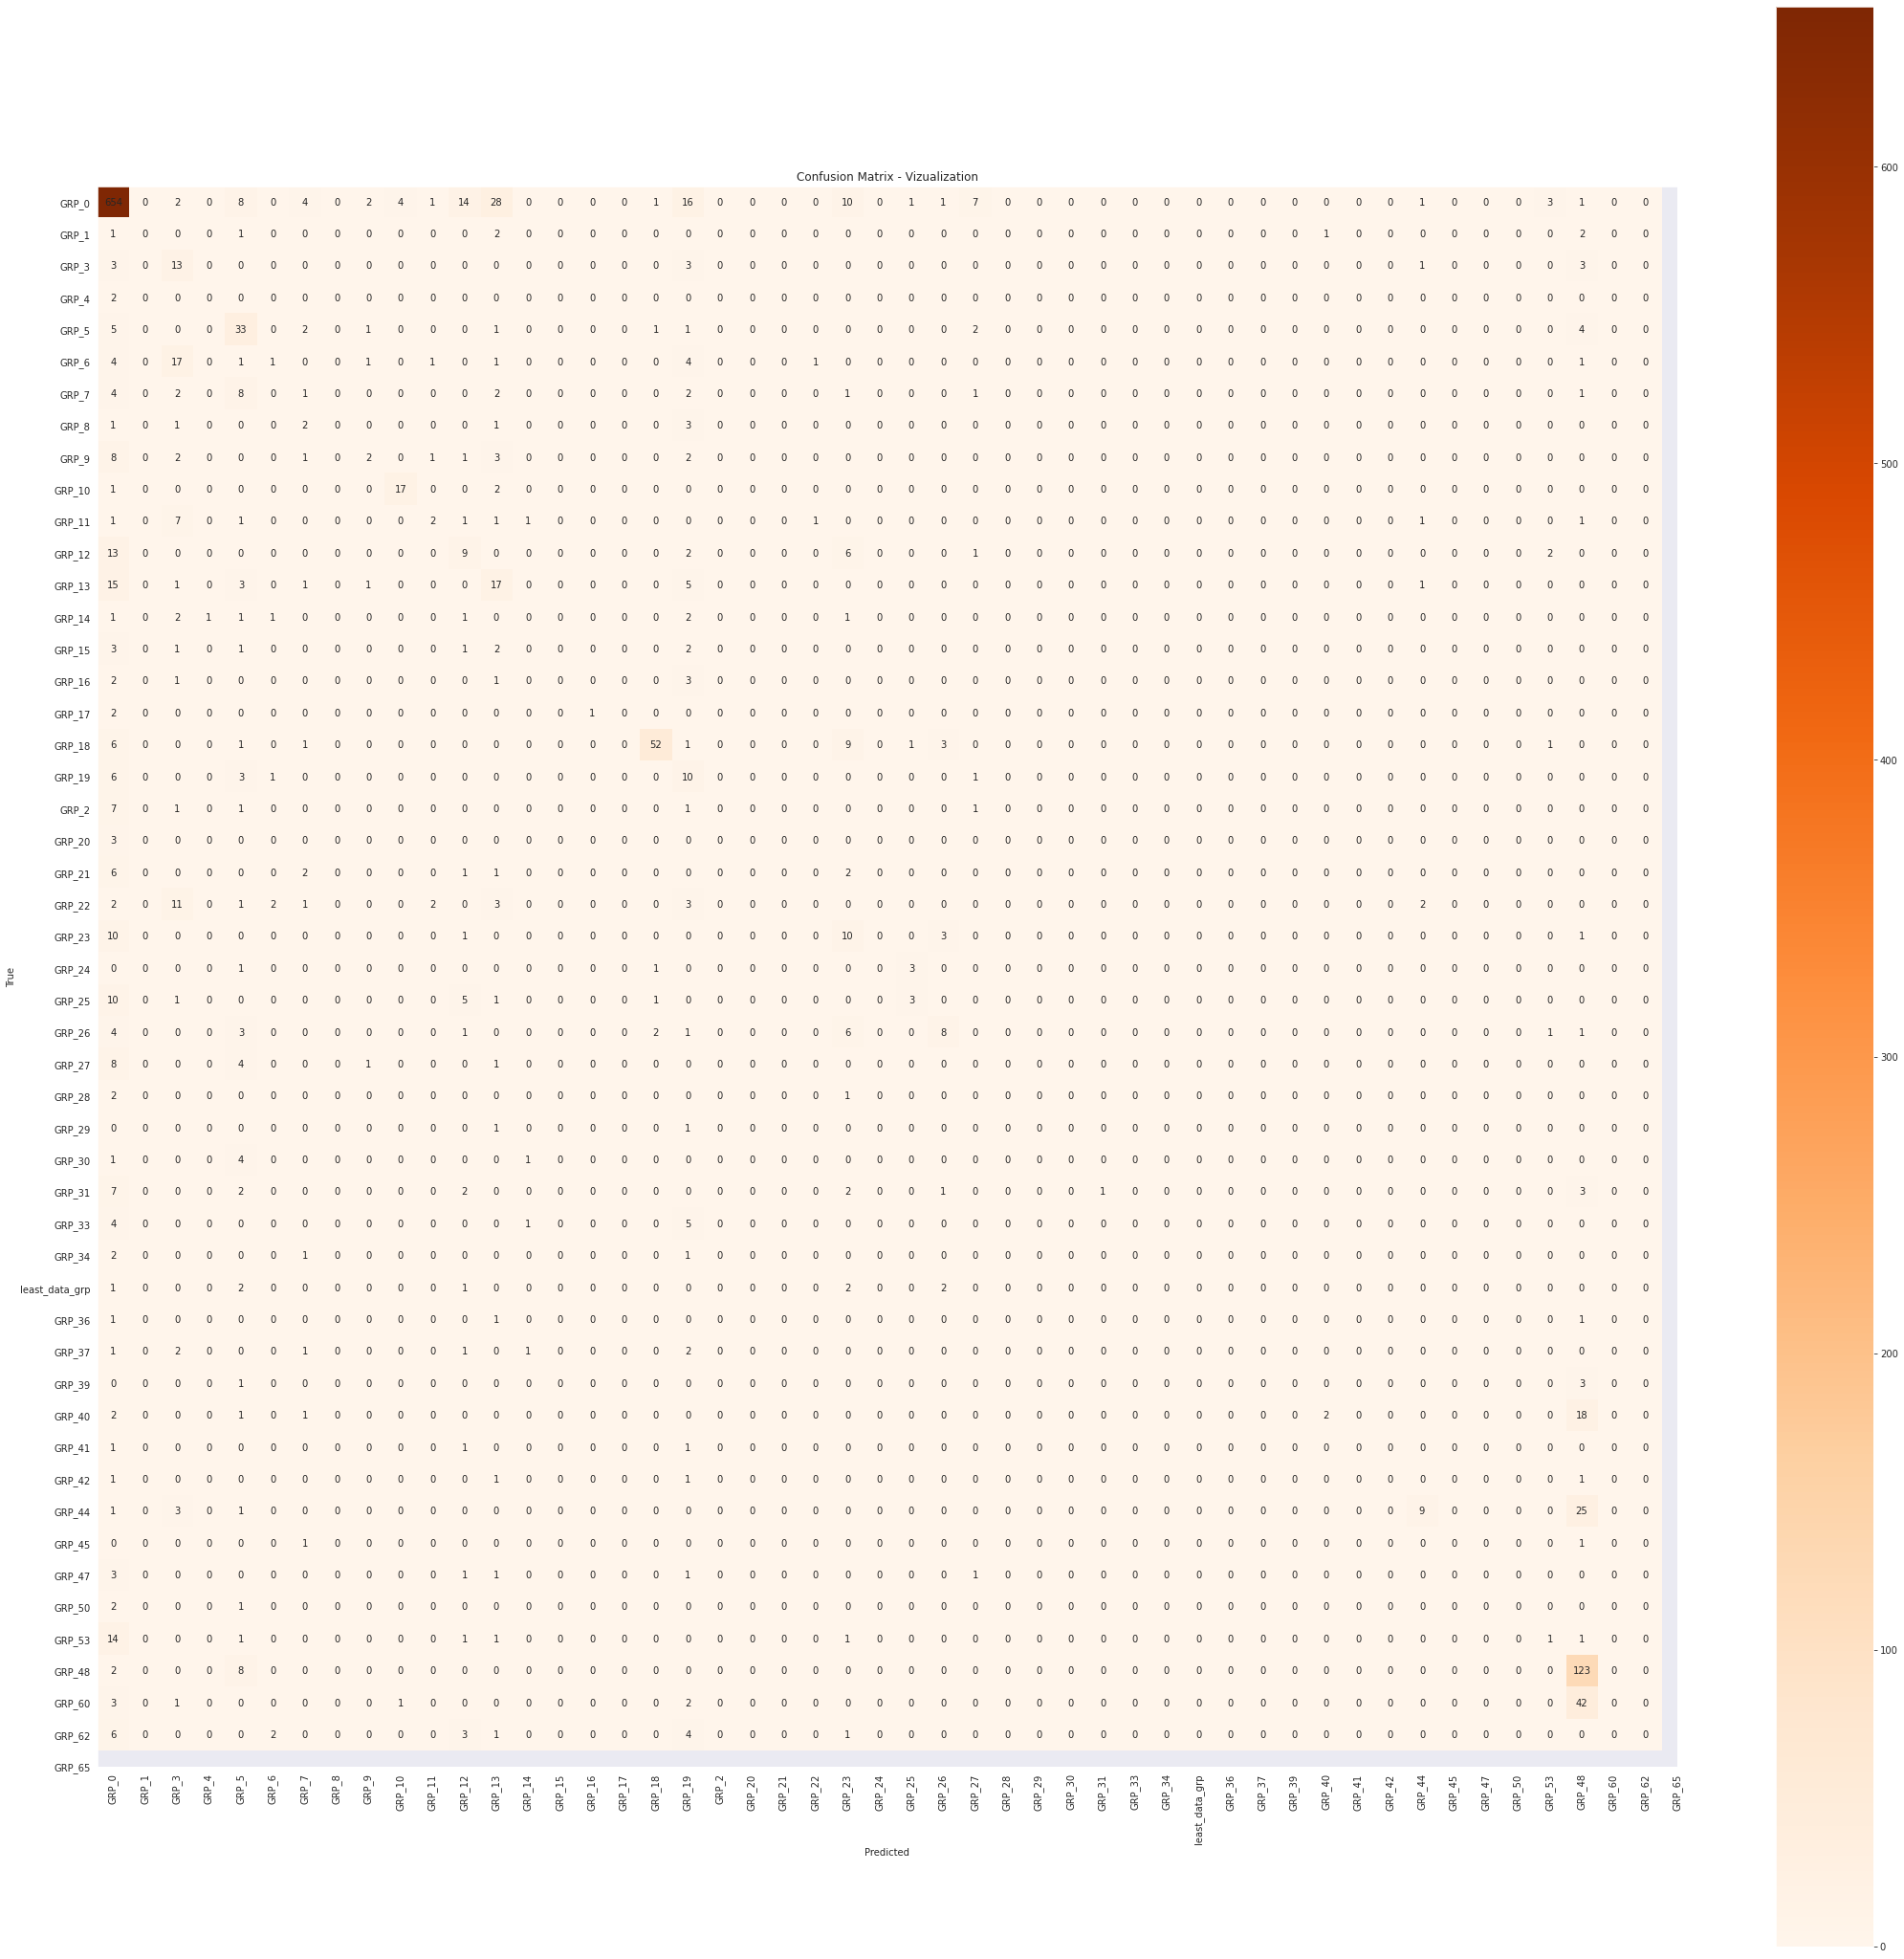

In [210]:
lstm_glove_report, LSTM_Glove_Accuracy_Score,LSTM_Glove_F1_Score = calculate_Accuracy_F1_Score(y_test, y_pred)

In [211]:
print("Accuracy_Score: ", LSTM_Glove_Accuracy_Score)
print("F1 Score: ", LSTM_Glove_F1_Score)
print(lstm_glove_report)

Accuracy_Score:  0.5782556750298686
F1 Score:  0.531279851258365
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       758
           1       0.00      0.00      0.00         7
           2       0.19      0.57      0.29        23
           3       0.00      0.00      0.00         2
           4       0.36      0.66      0.46        50
           5       0.14      0.03      0.05        32
           6       0.05      0.05      0.05        22
           7       0.00      0.00      0.00         8
           8       0.25      0.10      0.14        20
           9       0.77      0.85      0.81        20
          10       0.29      0.12      0.17        17
          11       0.20      0.27      0.23        33
          12       0.23      0.39      0.29        44
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00        10
          15       0.00      0.00      0.00         7
          16    

### Compare the Models

In [212]:
AppendModelResults('LSTM with Glove',LSTM_Glove_Accuracy_Score, LSTM_Glove_F1_Score)

Accuracy  F1 Score
LR_Model             0.642772  0.553273
LR_Grped             0.611111  0.514081
SVC Model            0.643369  0.553122
SVC_Grped            0.613501  0.519972
Decision Tree        0.599761  0.586772
Decision Tree Grped  0.580645  0.573504
Random Forest        0.659498  0.589122
Random Forest Grped  0.636798  0.564951
AdaBoost             0.517324  0.386926
AdaBoost Grped       0.486260  0.361604
Sequential NLP       0.574074  0.500027
LSTM with Word2Vec   0.560932  0.476163
LSTM with Glove      0.578256  0.531280

**Observations:**

1. LSTM with Glove is comparatively better than Word2Vec and Sequential NLP with respect to F1 score and also the best performance model in Deep learning model.



# **Work done after Interim Submission:**

1. Bidirectional LSTM
2. Hyperparameters tuning
3. GRU model
4. RNN Model
5. State of the art Models (Bert, ULMFit)
6. Visual aids for Model Comparison

## Create and Compile a Bidirectional LSTM Model with GLOVE Embedding

1. Model Built for Bidirectional LSTM model with Glove as the embedding.
2. Have used Dropouts and Flattening layers as well.
3. Activation functions Tanh and Softmax were used instead of relu that was used previously. 
4. The loss function used is Catergorical Cross entropy with learning rate of 0.01 and accuracy as the metric

In [213]:
BiDir_lstm_model_glove = Sequential()
#Embedding layer
BiDir_lstm_model_glove.add(Embedding(vocab_size, embedding_size, weights=[embedding_matrix_glove]))
BiDir_lstm_model_glove.add(Bidirectional(LSTM(units=128,recurrent_dropout=0.5,dropout=0.5)))
BiDir_lstm_model_glove.add(Flatten())
BiDir_lstm_model_glove.add(Dense(100, activation='tanh'))
BiDir_lstm_model_glove.add(Flatten())
BiDir_lstm_model_glove.add(Dropout(0.50))
BiDir_lstm_model_glove.add(Dense(50, activation='softmax'))
BiDir_lstm_model_glove.compile(optimizer=Adam(lr = 0.01), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [214]:
BiDir_lstm_model_glove.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 100)         1070800   
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               234496    
_________________________________________________________________
flatten_5 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               25700     
_________________________________________________________________
flatten_6 (Flatten)          (None, 100)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)               

In [215]:
Batch_size = 100
Epochs = 5

Bidir_Lstm_glove_Model_history = BiDir_lstm_model_glove.fit(x_train, y_train, batch_size = Batch_size, validation_data = (x_val,y_val), epochs = Epochs)

Epoch 1/5
51/51 [==============================] - 39s 774ms/step - loss: 2.3449 - acc: 0.5094 - val_loss: 1.8259 - val_acc: 0.5830
Epoch 2/5
51/51 [==============================] - 40s 779ms/step - loss: 1.7913 - acc: 0.5737 - val_loss: 1.6145 - val_acc: 0.6099
Epoch 3/5
51/51 [==============================] - 39s 763ms/step - loss: 1.4977 - acc: 0.6155 - val_loss: 1.5332 - val_acc: 0.6260
Epoch 4/5
51/51 [==============================] - 40s 784ms/step - loss: 1.2408 - acc: 0.6685 - val_loss: 1.5746 - val_acc: 0.6338
Epoch 5/5
51/51 [==============================] - 40s 785ms/step - loss: 1.0841 - acc: 0.6998 - val_loss: 1.6612 - val_acc: 0.6314


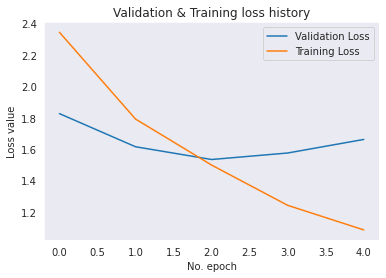

In [216]:
plot_loss(Bidir_Lstm_glove_Model_history)

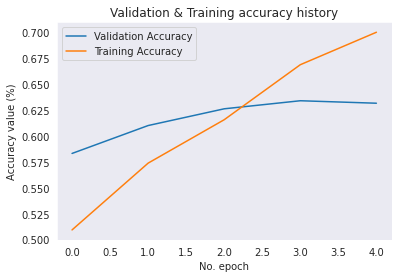

In [217]:
plot_accuracy(Bidir_Lstm_glove_Model_history)

In [218]:
# Test the model after training
test_results = BiDir_lstm_model_glove.evaluate(x_test, y_test, verbose=False)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {100*test_results[1]}%')

Test results - Loss: 1.773436188697815 - Accuracy: 60.57347655296326%


In [219]:
y_pred = BiDir_lstm_model_glove.predict_classes(x_test)

<Figure size 432x288 with 0 Axes>

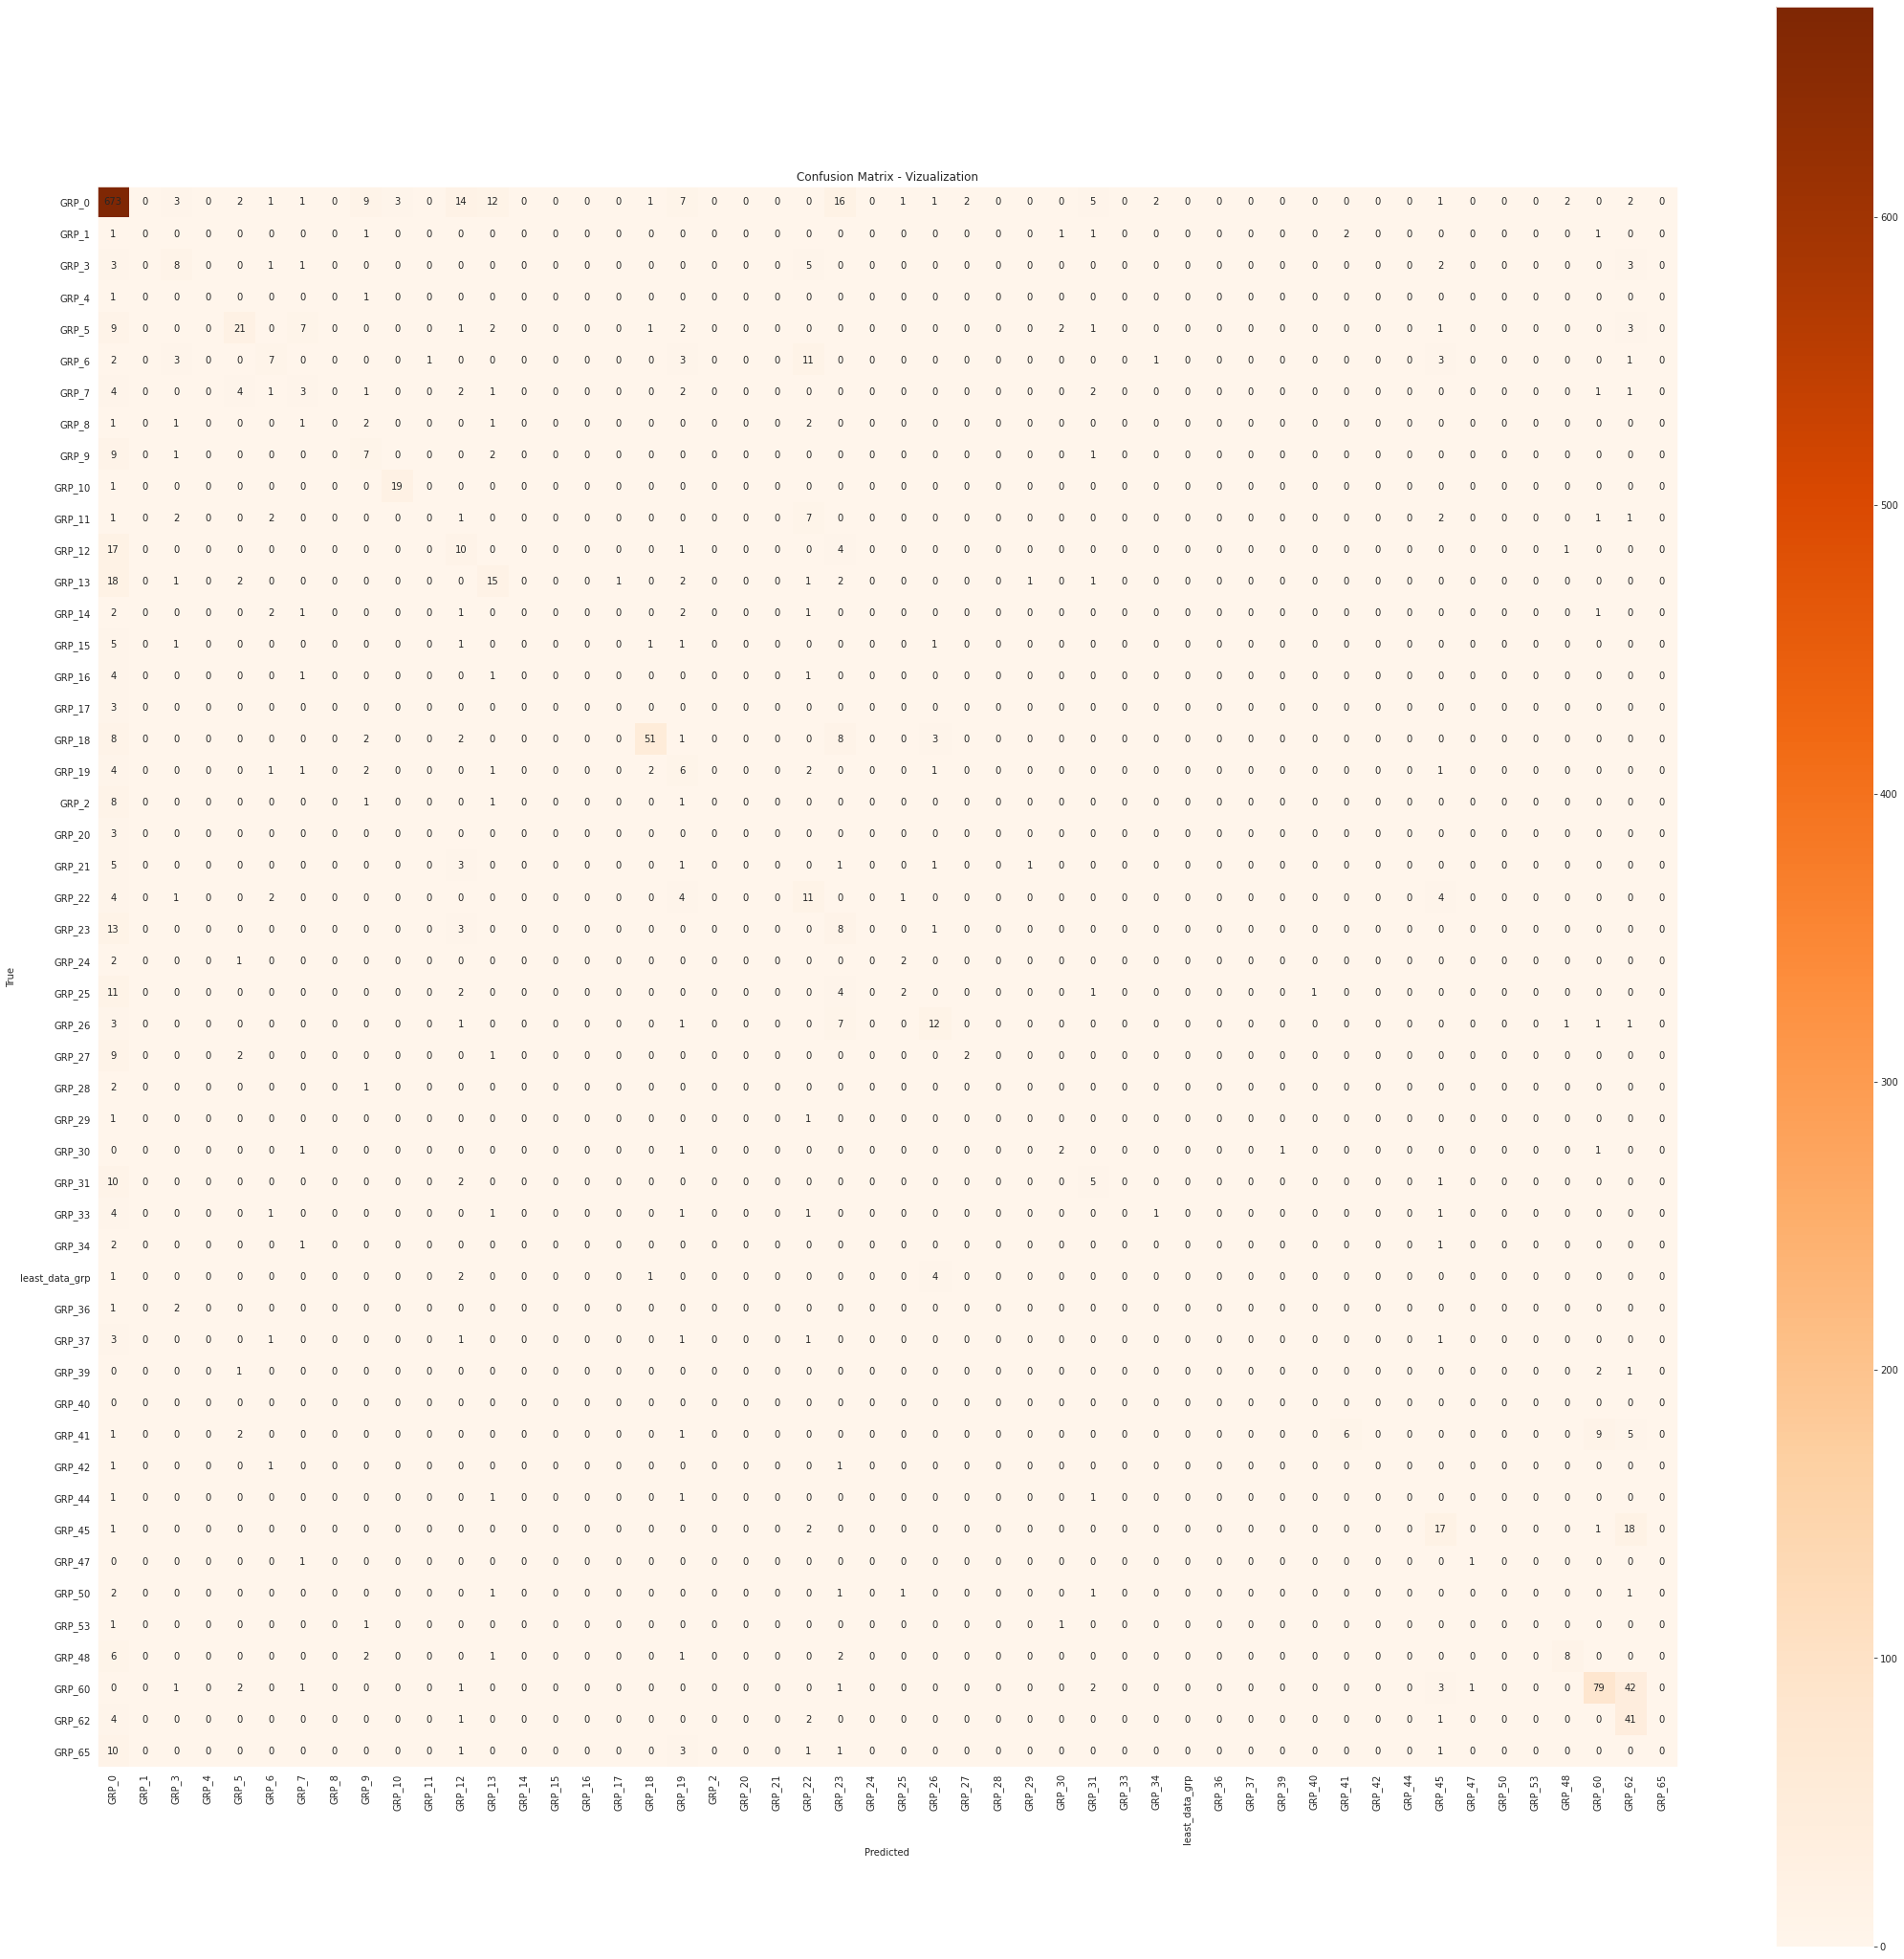

In [220]:
BiDir_lstm_glove_report, BiDir_LSTM_Glove_Accuracy_Score,BiDir_LSTM_Glove_F1_Score = calculate_Accuracy_F1_Score(y_test, y_pred)

In [221]:
print("Accuracy_Score: ", BiDir_LSTM_Glove_Accuracy_Score)
print("F1 Score: ", BiDir_LSTM_Glove_F1_Score)
print(BiDir_lstm_glove_report)

Accuracy_Score:  0.6057347670250897
F1 Score:  0.578126902263985
              precision    recall  f1-score   support

           0       0.77      0.89      0.82       758
           1       0.00      0.00      0.00         7
           2       0.33      0.35      0.34        23
           3       0.00      0.00      0.00         2
           4       0.57      0.42      0.48        50
           5       0.35      0.22      0.27        32
           6       0.15      0.14      0.14        22
           7       0.00      0.00      0.00         8
           8       0.23      0.35      0.28        20
           9       0.86      0.95      0.90        20
          10       0.00      0.00      0.00        17
          11       0.20      0.30      0.24        33
          12       0.37      0.34      0.35        44
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00        10
          15       0.00      0.00      0.00         7
          16    

### Compare the Models

In [222]:
AppendModelResults('BiDirectional LSTM with Glove', BiDir_LSTM_Glove_Accuracy_Score, BiDir_LSTM_Glove_F1_Score)

Accuracy  F1 Score
LR_Model                       0.642772  0.553273
LR_Grped                       0.611111  0.514081
SVC Model                      0.643369  0.553122
SVC_Grped                      0.613501  0.519972
Decision Tree                  0.599761  0.586772
Decision Tree Grped            0.580645  0.573504
Random Forest                  0.659498  0.589122
Random Forest Grped            0.636798  0.564951
AdaBoost                       0.517324  0.386926
AdaBoost Grped                 0.486260  0.361604
Sequential NLP                 0.574074  0.500027
LSTM with Word2Vec             0.560932  0.476163
LSTM with Glove                0.578256  0.531280
BiDirectional LSTM with Glove  0.605735  0.578127

**Observations:**

1. Bidirectional LSTM with Glove is comparatively better than Simple LSTM, Word2Vec and Sequential NLP with respect to F1 score and accuracy and also the best performance model in Deep learning model.



## HyperParameter Tuning

Lets tune some of the hyper parameters in the Bidirectional LSTM to see if the performance of the model improves. Hyperparameters that are going to be used in tuning are:

1.   Learning Rate
2.   Embedding size
3.   Maxlen
4.   LSTM units
5.   Multiple LSTM layers
6.   Return Sequence
7.   Epochs
8.   Using Callbacks
9.   Batch Size




In [223]:
LearningRate = 0.01
LearningRate1 = 0.001
LearningRate2 = 0.0001

embedding_size = 100
embedding_size1 = 50
embedding_size2 = 200
embedding_size3 = 300

maxlen = 100
maxlen1 = 50
maxlen2 = 200
maxlen3 = 300


### Define X and Y for model

In [224]:
X = tokenizer.texts_to_sequences(Final_Data_Grouped['Description'])
#padding sequences based on different maxlen values (hyperparameter)
X = pad_sequences(X, maxlen = maxlen)
X1 = pad_sequences(X, maxlen = maxlen1)
X2 = pad_sequences(X, maxlen = maxlen2)
X3 = pad_sequences(X, maxlen = maxlen3)

y = np.asarray(Final_Data_Grouped['EncodedGroup'])

### Train and Test Split

In [225]:
# Split into Test, train, validation for grouped data with 100 as the maxlen

train_ratio = 0.60
validation_ratio = 0.20
test_ratio = 0.20

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state=0)

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state=0)

In [226]:
#print the corresponding shapes
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)

(5020, 100)
(5020,)
(1674, 100)
(1674,)
(1674, 100)
(1674,)


In [227]:
#train_test split with max_len=50
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=1 - train_ratio, random_state=0)

x_val1, x_test1, y_val1, y_test1 = train_test_split(x_test1, y_test1, test_size=test_ratio/(test_ratio + validation_ratio), random_state=0)

In [228]:
#print the corresponding shapes
print(x_train1.shape)
print(y_train1.shape)
print(x_test1.shape)
print(y_test1.shape)
print(x_val1.shape)
print(y_val1.shape)

(5020, 50)
(5020,)
(1674, 50)
(1674,)
(1674, 50)
(1674,)


In [229]:
#train test split with maxlen = 200
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=1 - train_ratio, random_state=0)

x_val2, x_test2, y_val2, y_test2 = train_test_split(x_test2, y_test2, test_size=test_ratio/(test_ratio + validation_ratio), random_state=0)

In [230]:
#print the corresponding shapes
print(x_train2.shape)
print(y_train2.shape)
print(x_test2.shape)
print(y_test2.shape)
print(x_val2.shape)
print(y_val2.shape)

(5020, 200)
(5020,)
(1674, 200)
(1674,)
(1674, 200)
(1674,)


In [231]:
#train test split with mexlen = 300
x_train3, x_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=1 - train_ratio, random_state=0)

x_val3, x_test3, y_val3, y_test3 = train_test_split(x_test3, y_test3, test_size=test_ratio/(test_ratio + validation_ratio), random_state=0)

In [232]:
#print the corresponding shapes
print(x_train3.shape)
print(y_train3.shape)
print(x_test3.shape)
print(y_test3.shape)
print(x_val3.shape)
print(y_val3.shape)

(5020, 300)
(5020,)
(1674, 300)
(1674,)
(1674, 300)
(1674,)


In [ ]:
tokenizer.word_index.items()

In [234]:
#define the vocab size
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

10708


### Create and Compile a Bidirectional LSTM Model with GLOVE Embedding - 50 Dimensions

In this model, we have used the embedding size of 50 and maxlen as 50 and appropriate weights with 50 dimenstions have been used.

In [235]:
BiDir_lstm_model_glove_50 = Sequential()
#Embedding layer
BiDir_lstm_model_glove_50.add(Embedding(vocab_size, embedding_size1, input_length=maxlen1, weights=[embedding_matrix_glove_50]))
BiDir_lstm_model_glove_50.add(Bidirectional(LSTM(units=128,recurrent_dropout=0.5,dropout=0.5)))
BiDir_lstm_model_glove_50.add(Flatten())
BiDir_lstm_model_glove_50.add(Dense(50, activation='tanh'))
BiDir_lstm_model_glove_50.add(Flatten())
BiDir_lstm_model_glove_50.add(Dropout(0.50))
BiDir_lstm_model_glove_50.add(Dense(50, activation='softmax'))
BiDir_lstm_model_glove_50.compile(optimizer=Adam(lr = LearningRate), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [236]:
BiDir_lstm_model_glove_50.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 50, 50)            535400    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               183296    
_________________________________________________________________
flatten_7 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 50)                12850     
_________________________________________________________________
flatten_8 (Flatten)          (None, 50)                0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 50)               

Batch size is also set to 50 and epochs is set to 5 only

In [237]:
Batch_size = 50
Epochs = 5

Bidir_Lstm_glove_Model_50_history = BiDir_lstm_model_glove_50.fit(x_train1, y_train1, batch_size = Batch_size, validation_data = (x_val1,y_val1), epochs = Epochs)

Epoch 1/5
101/101 [==============================] - 40s 399ms/step - loss: 2.3742 - acc: 0.4970 - val_loss: 1.8804 - val_acc: 0.5735
Epoch 2/5
101/101 [==============================] - 41s 402ms/step - loss: 1.9129 - acc: 0.5486 - val_loss: 1.7335 - val_acc: 0.5956
Epoch 3/5
101/101 [==============================] - 41s 403ms/step - loss: 1.6672 - acc: 0.5821 - val_loss: 1.6722 - val_acc: 0.5681
Epoch 4/5
101/101 [==============================] - 40s 395ms/step - loss: 1.5073 - acc: 0.6088 - val_loss: 1.6427 - val_acc: 0.5938
Epoch 5/5
101/101 [==============================] - 41s 402ms/step - loss: 1.4048 - acc: 0.6289 - val_loss: 1.6825 - val_acc: 0.6105


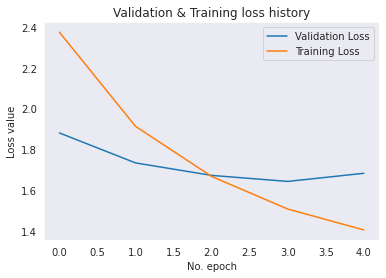

In [238]:
plot_loss(Bidir_Lstm_glove_Model_50_history)

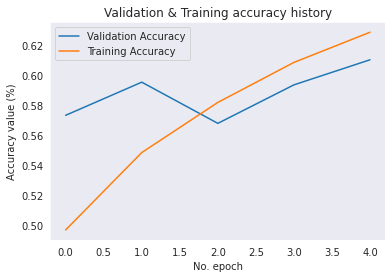

In [239]:
plot_accuracy(Bidir_Lstm_glove_Model_50_history)

In [240]:
# Test the model after training
test_results = BiDir_lstm_model_glove_50.evaluate(x_test1, y_test1, verbose=False)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {100*test_results[1]}%')

Test results - Loss: 1.8194732666015625 - Accuracy: 58.72162580490112%


In [241]:
y_pred = BiDir_lstm_model_glove_50.predict_classes(x_test1)

<Figure size 432x288 with 0 Axes>

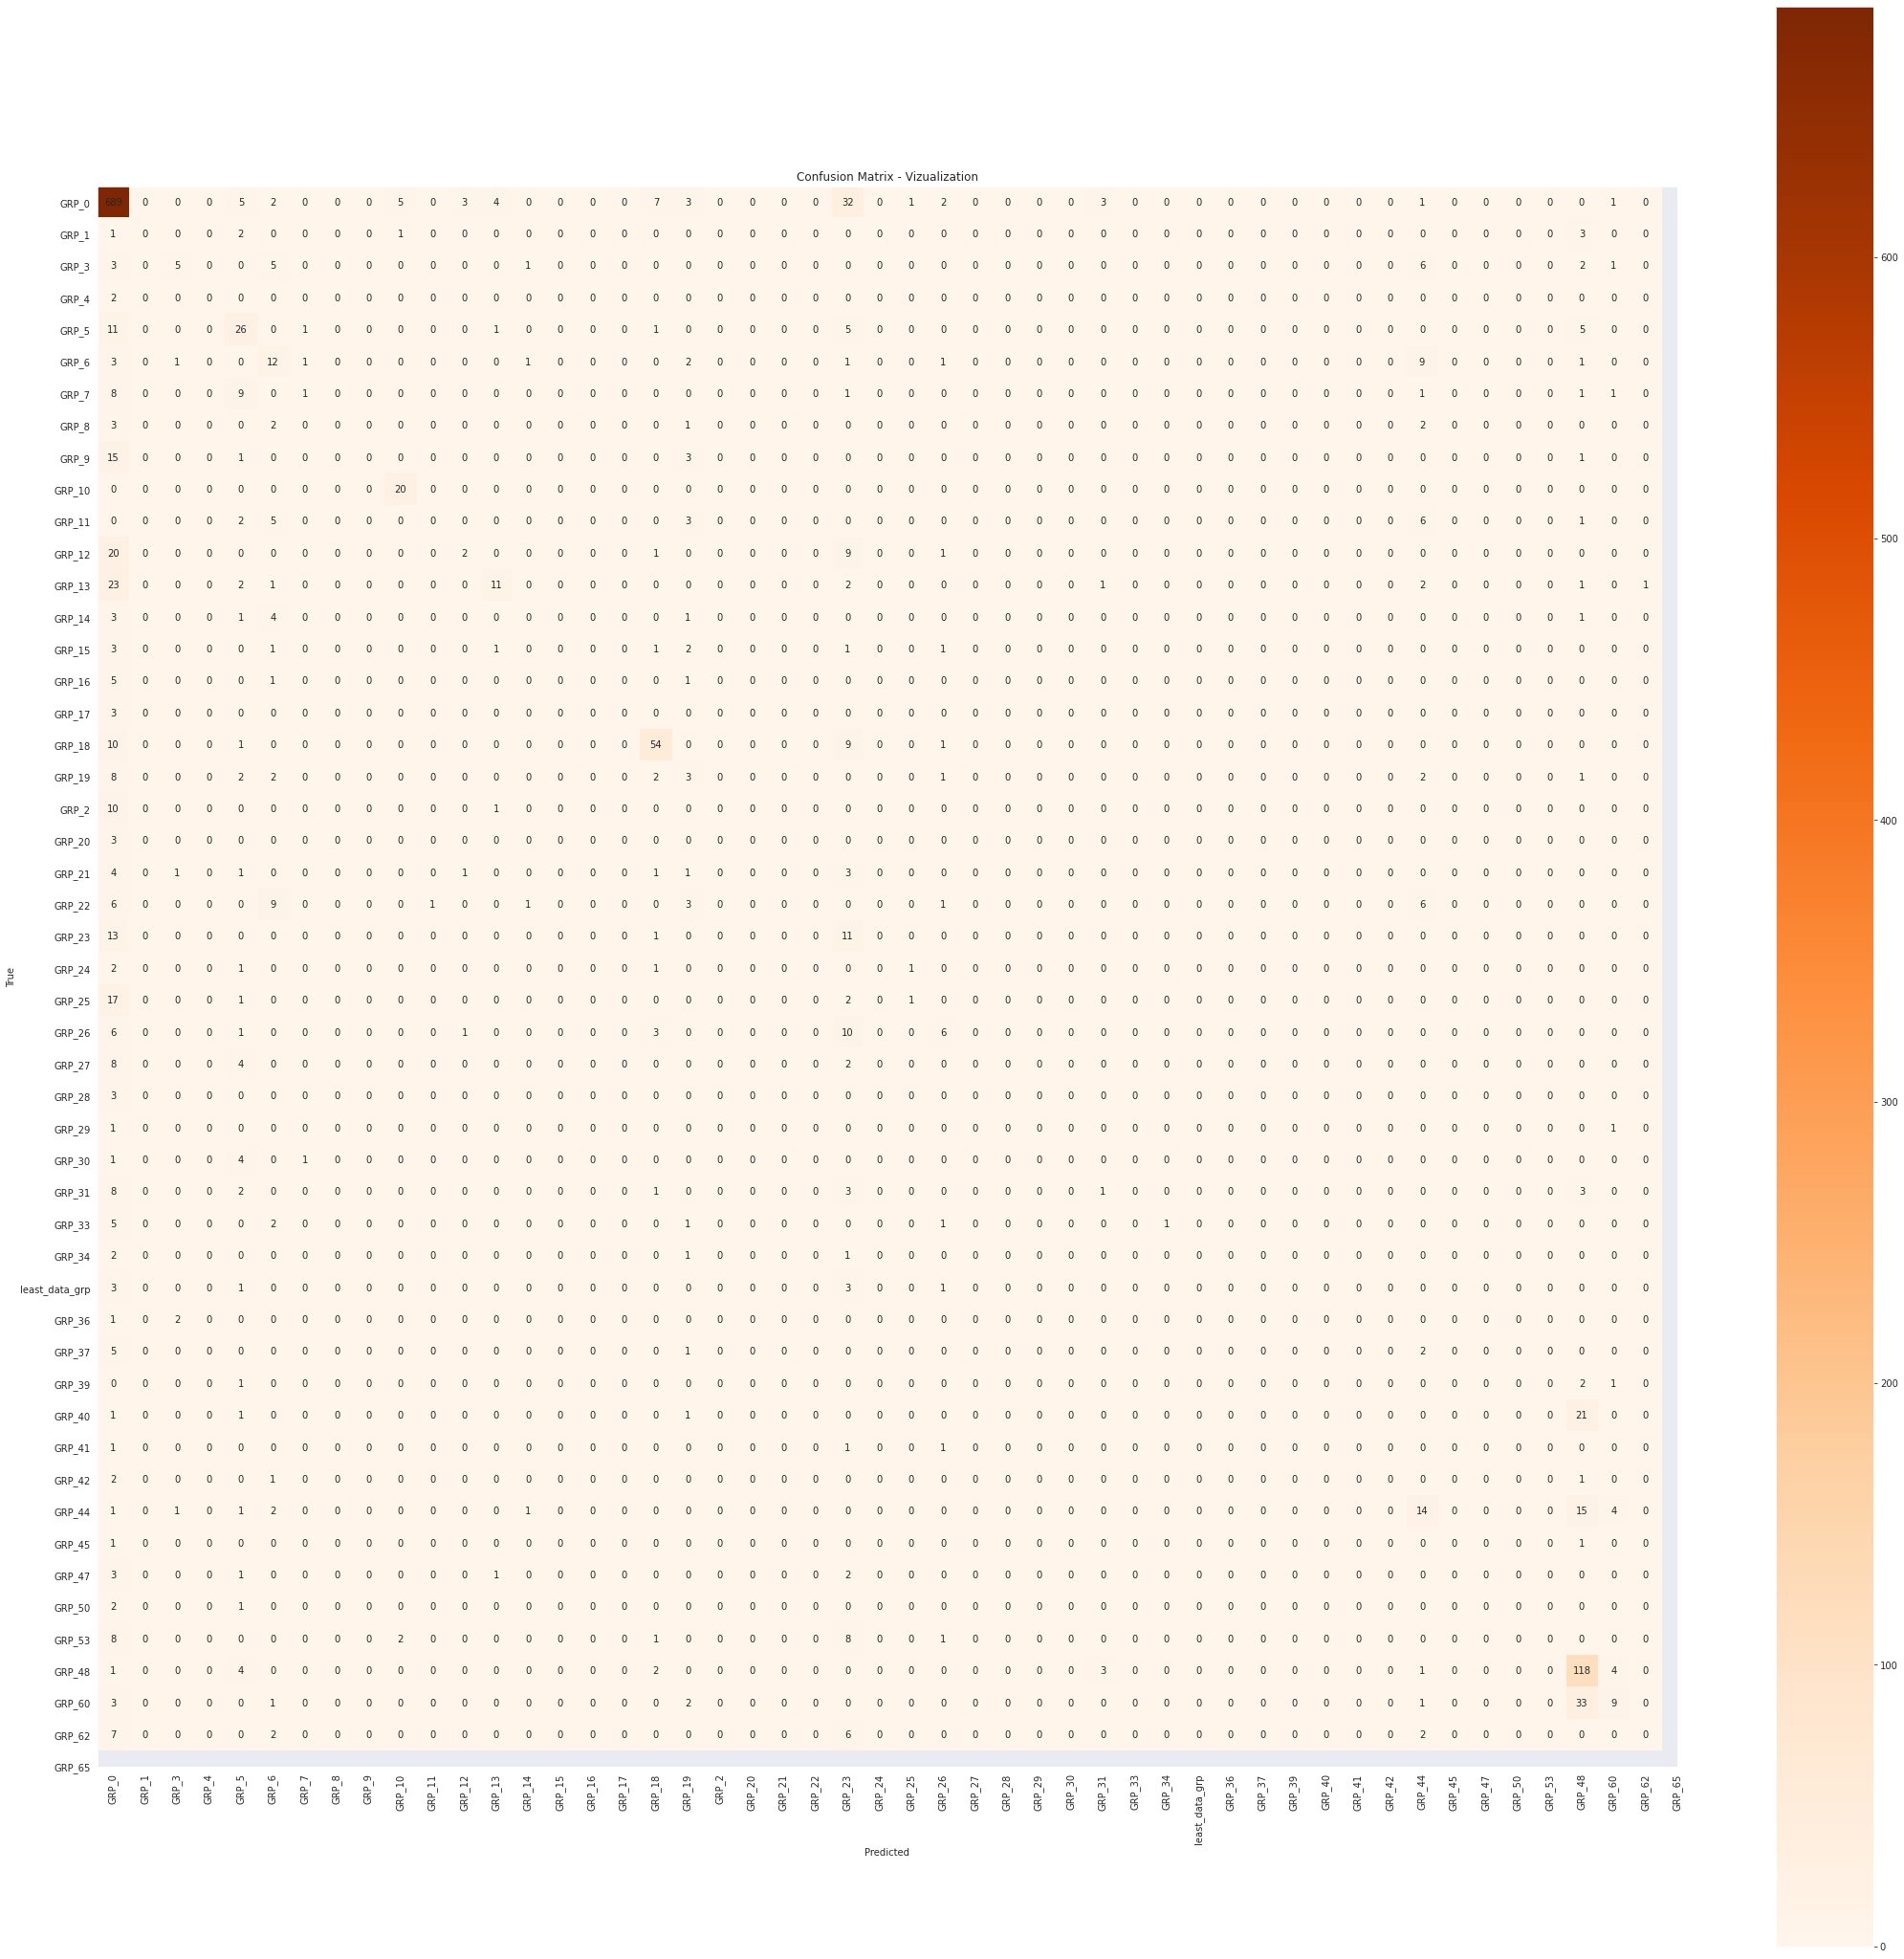

In [242]:
BiDir_lstm_glove_50_report, BiDir_LSTM_Glove_50_Accuracy_Score,BiDir_LSTM_Glove_50_F1_Score = calculate_Accuracy_F1_Score(y_test1, y_pred)

In [243]:
print("Accuracy_Score: ", BiDir_LSTM_Glove_50_Accuracy_Score)
print("F1 Score: ", BiDir_LSTM_Glove_50_F1_Score)
print(BiDir_lstm_glove_50_report)

Accuracy_Score:  0.5872162485065711
F1 Score:  0.5230626931909823
              precision    recall  f1-score   support

           0       0.73      0.91      0.81       758
           1       0.00      0.00      0.00         7
           2       0.50      0.22      0.30        23
           3       0.00      0.00      0.00         2
           4       0.35      0.52      0.42        50
           5       0.23      0.38      0.29        32
           6       0.25      0.05      0.08        22
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        20
           9       0.71      1.00      0.83        20
          10       0.00      0.00      0.00        17
          11       0.29      0.06      0.10        33
          12       0.58      0.25      0.35        44
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00        10
          15       0.00      0.00      0.00         7
          16   

#### Compare the Models

In [244]:
AppendModelResults('BiDirectional LSTM with 50 Dimensions', BiDir_LSTM_Glove_50_Accuracy_Score, BiDir_LSTM_Glove_50_F1_Score)

Accuracy  F1 Score
LR_Model                               0.642772  0.553273
LR_Grped                               0.611111  0.514081
SVC Model                              0.643369  0.553122
SVC_Grped                              0.613501  0.519972
Decision Tree                          0.599761  0.586772
Decision Tree Grped                    0.580645  0.573504
Random Forest                          0.659498  0.589122
Random Forest Grped                    0.636798  0.564951
AdaBoost                               0.517324  0.386926
AdaBoost Grped                         0.486260  0.361604
Sequential NLP                         0.574074  0.500027
LSTM with Word2Vec                     0.560932  0.476163
LSTM with Glove                        0.578256  0.531280
BiDirectional LSTM with Glove          0.605735  0.578127
BiDirectional LSTM with 50 Dimensions  0.587216  0.523063

**Observations:**

1. Bidirectional LSTM with 50 dimensions are also having accuracy of 59% which is close to the Bidirectional LSTM with 100 dimensions but still they are not higher than the model with 100 dimensions.



### Create and Compile a Bidirectional LSTM Model with GLOVE Embedding - 200 Dimensions

Now lets try with 200 dimensions. Here Embedding size, maxlen, weights are defined with 200 dimensions. We have also removed all the flattening, dropout and additional activation layers. Learning rate used here is 0.001

In [245]:
BiDir_lstm_model_glove_200 = Sequential()
#Embedding layer
BiDir_lstm_model_glove_200.add(Embedding(vocab_size, embedding_size2, input_length=maxlen2, weights=[embedding_matrix_glove_200]))
BiDir_lstm_model_glove_200.add(Bidirectional(LSTM(units=128,recurrent_dropout=0.5,dropout=0.5)))
BiDir_lstm_model_glove_200.add(Dense(50, activation='softmax'))
BiDir_lstm_model_glove_200.compile(optimizer=Adam(lr = LearningRate1), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [246]:
BiDir_lstm_model_glove_200.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 200, 200)          2141600   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 256)               336896    
_________________________________________________________________
dense_9 (Dense)              (None, 50)                12850     
Total params: 2,491,346
Trainable params: 2,491,346
Non-trainable params: 0
_________________________________________________________________


Have used the batch size of 200 with 5 Epochs still and also have used call backs such as model checkpoint, early stopping and Reduce Learning Rate.

In [247]:
Batch_size = 200
Epochs = 5
model_checkpoint = ModelCheckpoint("results_{val_loss:.2f}", save_best_only=True,
                                    verbose=1)
early_stopping = EarlyStopping(patience=5, verbose=1)
reduce_lr = ReduceLROnPlateau(patience=4, min_lr=1e-05, factor=0.1)

Bidir_Lstm_glove_Model_200_history = BiDir_lstm_model_glove_200.fit(x_train2, y_train2, batch_size = Batch_size, callbacks=[model_checkpoint,early_stopping,reduce_lr],validation_data = (x_val2,y_val2), epochs = Epochs)

Epoch 1/5
26/26 [==============================] - ETA: 0s - loss: 2.8907 - acc: 0.4249
Epoch 00001: val_loss improved from inf to 2.29186, saving model to results_2.29
26/26 [==============================] - 47s 2s/step - loss: 2.8907 - acc: 0.4249 - val_loss: 2.2919 - val_acc: 0.4964
Epoch 2/5
26/26 [==============================] - ETA: 0s - loss: 2.2658 - acc: 0.5058
Epoch 00002: val_loss improved from 2.29186 to 2.03480, saving model to results_2.03
26/26 [==============================] - 47s 2s/step - loss: 2.2658 - acc: 0.5058 - val_loss: 2.0348 - val_acc: 0.5579
Epoch 3/5
26/26 [==============================] - ETA: 0s - loss: 2.0117 - acc: 0.5375
Epoch 00003: val_loss improved from 2.03480 to 1.85882, saving model to results_1.86
26/26 [==============================] - 46s 2s/step - loss: 2.0117 - acc: 0.5375 - val_loss: 1.8588 - val_acc: 0.5723
Epoch 4/5
26/26 [==============================] - ETA: 0s - loss: 1.8342 - acc: 0.5570
Epoch 00004: val_loss improved from 1.85

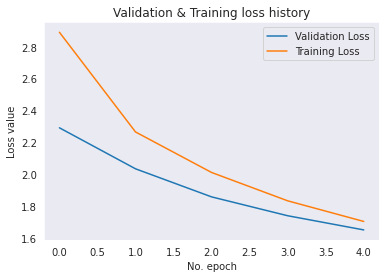

In [248]:
plot_loss(Bidir_Lstm_glove_Model_200_history)

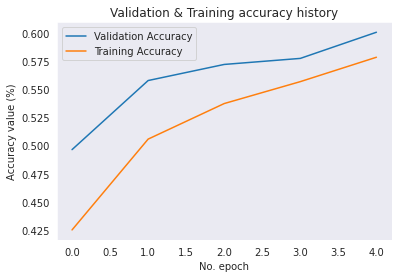

In [249]:
plot_accuracy(Bidir_Lstm_glove_Model_200_history)

In [250]:
# Test the model after training
test_results = BiDir_lstm_model_glove_200.evaluate(x_test2, y_test2, verbose=False)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {100*test_results[1]}%')

Test results - Loss: 1.7583280801773071 - Accuracy: 56.75029754638672%


In [251]:
y_pred = BiDir_lstm_model_glove_200.predict_classes(x_test2)

<Figure size 432x288 with 0 Axes>

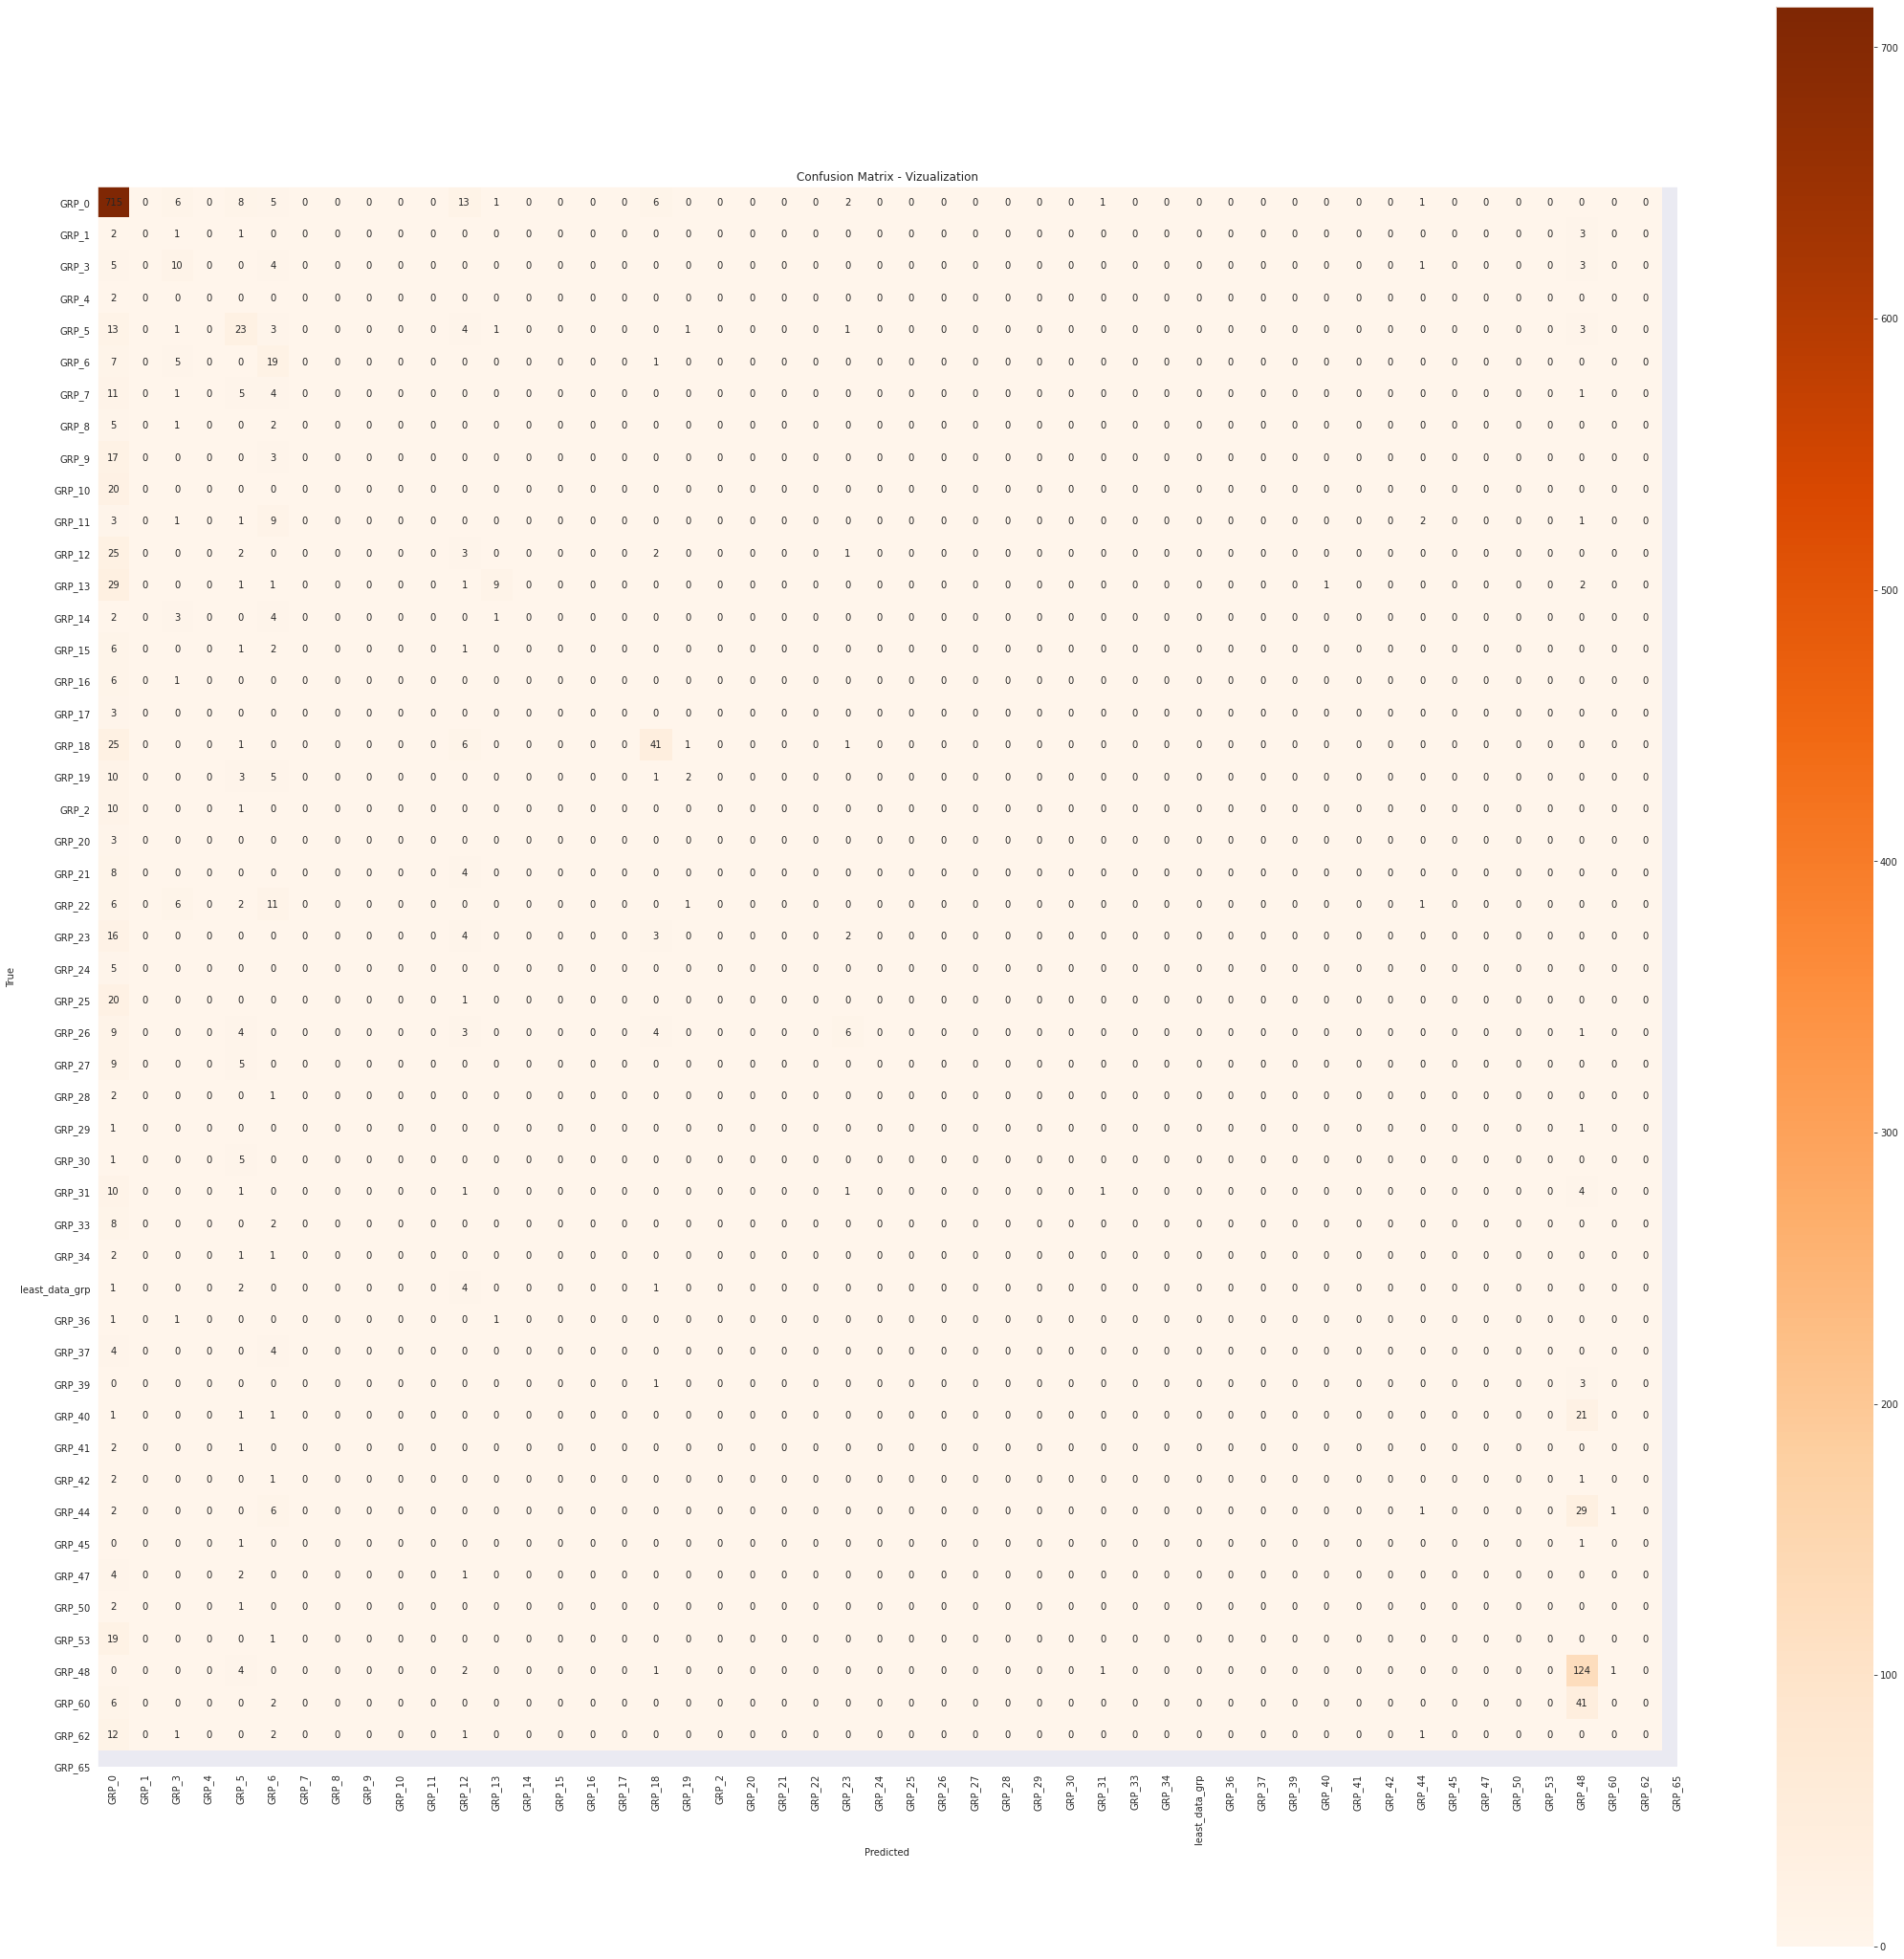

In [252]:
BiDir_lstm_glove_200_report, BiDir_LSTM_Glove_200_Accuracy_Score,BiDir_LSTM_Glove_200_F1_Score = calculate_Accuracy_F1_Score(y_test2, y_pred)

In [253]:
print("Accuracy_Score: ", BiDir_LSTM_Glove_200_Accuracy_Score)
print("F1 Score: ", BiDir_LSTM_Glove_200_F1_Score)
print(BiDir_lstm_glove_200_report)

Accuracy_Score:  0.5675029868578255
F1 Score:  0.4701897223961876
              precision    recall  f1-score   support

           0       0.67      0.94      0.78       758
           1       0.00      0.00      0.00         7
           2       0.26      0.43      0.33        23
           3       0.00      0.00      0.00         2
           4       0.30      0.46      0.36        50
           5       0.20      0.59      0.30        32
           6       0.00      0.00      0.00        22
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        20
           9       0.00      0.00      0.00        20
          10       0.00      0.00      0.00        17
          11       0.06      0.09      0.07        33
          12       0.69      0.20      0.32        44
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00        10
          15       0.00      0.00      0.00         7
          16   

#### Compare the Models

In [254]:
AppendModelResults('Bidirectional LSTM with 200 Dimensions', BiDir_LSTM_Glove_200_Accuracy_Score, BiDir_LSTM_Glove_200_F1_Score)

Accuracy  F1 Score
LR_Model                                0.642772  0.553273
LR_Grped                                0.611111  0.514081
SVC Model                               0.643369  0.553122
SVC_Grped                               0.613501  0.519972
Decision Tree                           0.599761  0.586772
Decision Tree Grped                     0.580645  0.573504
Random Forest                           0.659498  0.589122
Random Forest Grped                     0.636798  0.564951
AdaBoost                                0.517324  0.386926
AdaBoost Grped                          0.486260  0.361604
Sequential NLP                          0.574074  0.500027
LSTM with Word2Vec                      0.560932  0.476163
LSTM with Glove                         0.578256  0.531280
BiDirectional LSTM with Glove           0.605735  0.578127
BiDirectional LSTM with 50 Dimensions   0.587216  0.523063
Bidirectional LSTM with 200 Dimensions  0.567503  0.470190

**Observations:**

1. Bidirectional LSTM with 200 Dimensions is not performing better compared to 100 or 50 dimensions. Though the accuracy is 57%, the F1 scores are very low at 47%.



### Create and Compile a Bidirectional LSTM Model with GLOVE Embedding - 300 Dimensions

1. Maxlen = 300
2. Embedding Size = 300
3. LSTM Units = 256
4. Learning Rate = 0.001

In [255]:
BiDir_lstm_model_glove_300 = Sequential()
#Embedding layer
BiDir_lstm_model_glove_300.add(Embedding(vocab_size, embedding_size3, input_length=maxlen3, weights=[embedding_matrix_glove_300]))
BiDir_lstm_model_glove_300.add(Bidirectional(LSTM(units=256,recurrent_dropout=0.5,dropout=0.5)))
BiDir_lstm_model_glove_300.add(Dense(50, activation='softmax'))
BiDir_lstm_model_glove_300.compile(optimizer=Adam(lr = LearningRate1), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [256]:
BiDir_lstm_model_glove_300.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 300, 300)          3212400   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 512)               1140736   
_________________________________________________________________
dense_10 (Dense)             (None, 50)                25650     
Total params: 4,378,786
Trainable params: 4,378,786
Non-trainable params: 0
_________________________________________________________________


Also have used:
1. Batch size = 300
2. Epochs = 5
3. Callbacks (Model Checkpoint, early stopping, reduce_lr)

In [257]:
Batch_size = 300
Epochs = 5
model_checkpoint = ModelCheckpoint("results_{val_loss:.2f}", save_best_only=True,
                                    verbose=1)
early_stopping = EarlyStopping(patience=5, verbose=1)
reduce_lr = ReduceLROnPlateau(patience=4, min_lr=1e-05, factor=0.1)

Bidir_Lstm_glove_Model_300_history = BiDir_lstm_model_glove_300.fit(x_train3, y_train3, batch_size = Batch_size, callbacks=[model_checkpoint,early_stopping,reduce_lr],validation_data = (x_val3,y_val3), epochs = Epochs)

Epoch 1/5
17/17 [==============================] - ETA: 0s - loss: 2.9656 - acc: 0.4325
Epoch 00001: val_loss improved from inf to 2.28125, saving model to results_2.28
17/17 [==============================] - 47s 3s/step - loss: 2.9656 - acc: 0.4325 - val_loss: 2.2812 - val_acc: 0.5114
Epoch 2/5
17/17 [==============================] - ETA: 0s - loss: 2.2227 - acc: 0.5141
Epoch 00002: val_loss improved from 2.28125 to 2.00989, saving model to results_2.01
17/17 [==============================] - 46s 3s/step - loss: 2.2227 - acc: 0.5141 - val_loss: 2.0099 - val_acc: 0.5591
Epoch 3/5
17/17 [==============================] - ETA: 0s - loss: 1.9478 - acc: 0.5398
Epoch 00003: val_loss improved from 2.00989 to 1.81133, saving model to results_1.81
17/17 [==============================] - 48s 3s/step - loss: 1.9478 - acc: 0.5398 - val_loss: 1.8113 - val_acc: 0.5747
Epoch 4/5
17/17 [==============================] - ETA: 0s - loss: 1.7565 - acc: 0.5695
Epoch 00004: val_loss improved from 1.81

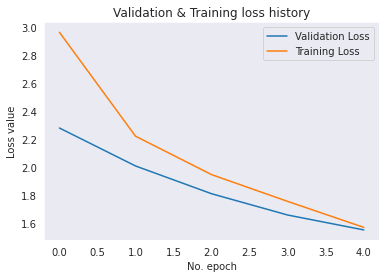

In [258]:
plot_loss(Bidir_Lstm_glove_Model_300_history)

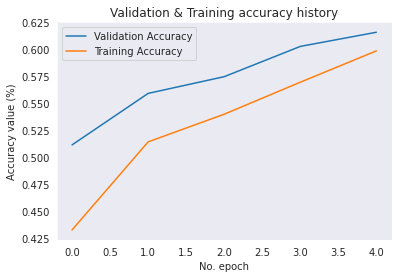

In [259]:
plot_accuracy(Bidir_Lstm_glove_Model_300_history)

In [260]:
# Test the model after training
test_results = BiDir_lstm_model_glove_300.evaluate(x_test3, y_test3, verbose=True)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {100*test_results[1]}%')

53/53 [==============================] - 8s 153ms/step - loss: 1.6671 - acc: 0.5878
Test results - Loss: 1.6670976877212524 - Accuracy: 58.78136157989502%


In [261]:
y_pred = BiDir_lstm_model_glove_300.predict_classes(x_test3)

<Figure size 432x288 with 0 Axes>

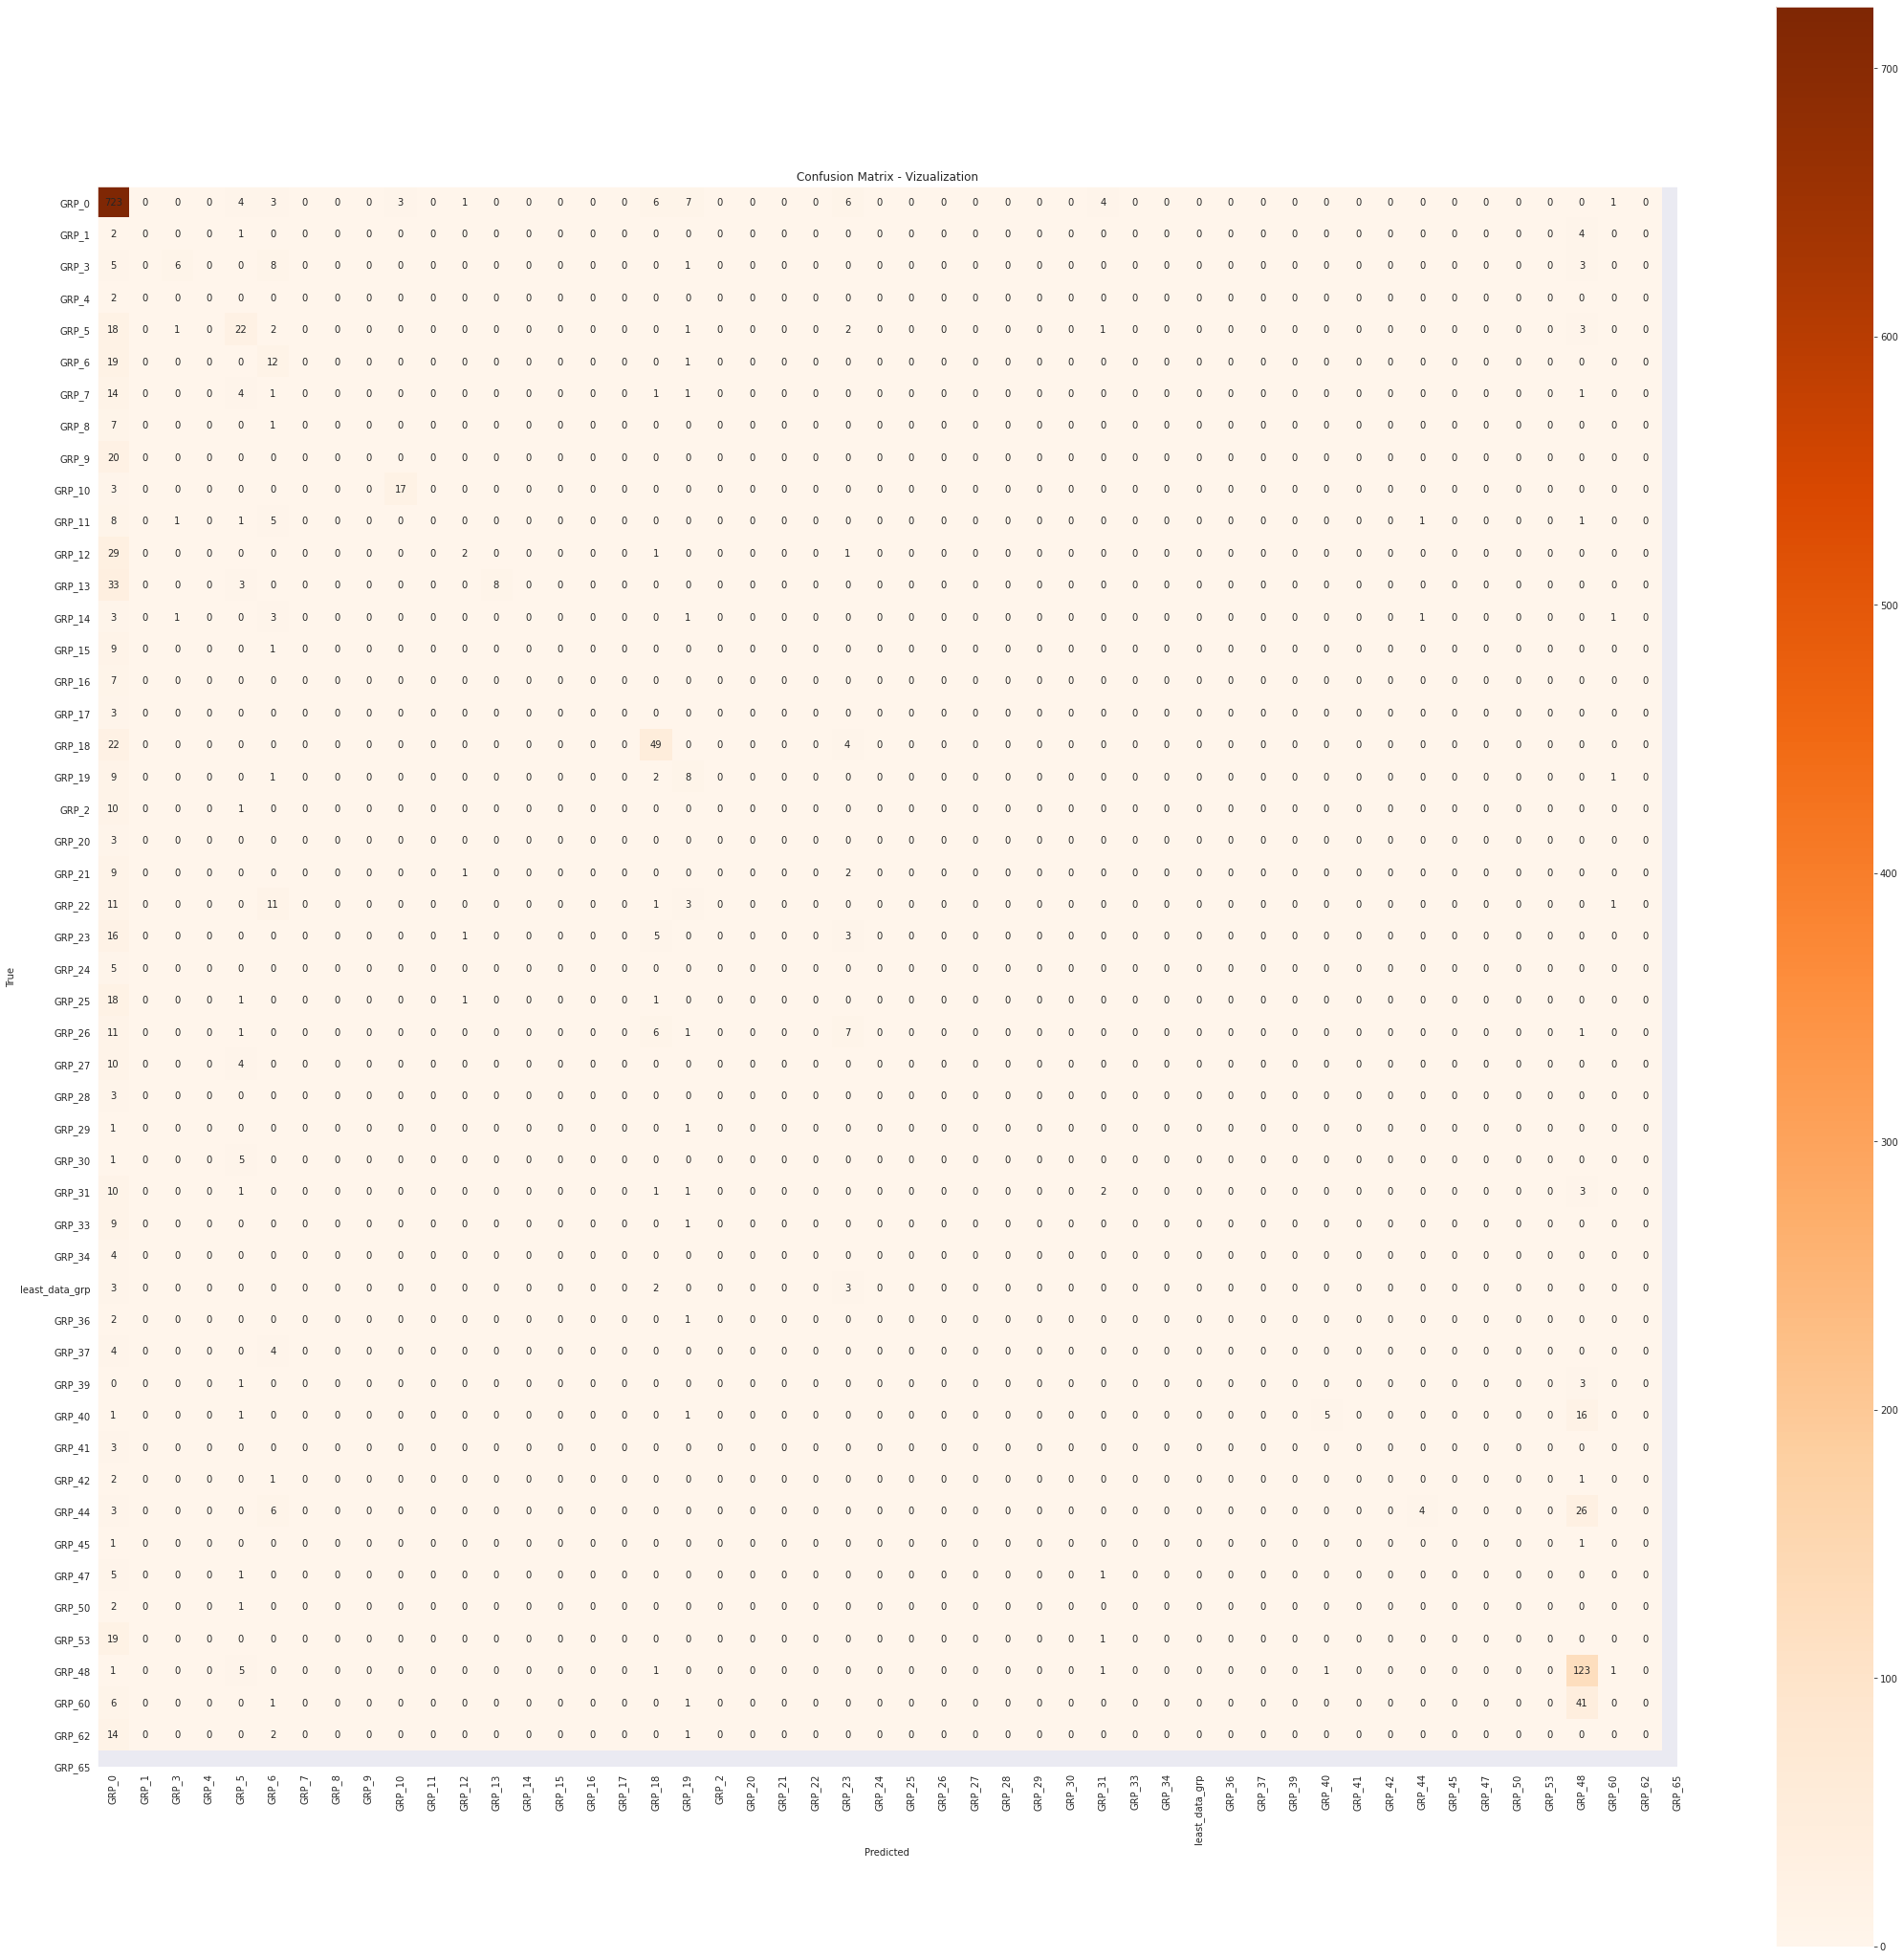

In [262]:
BiDir_lstm_glove_300_report, BiDir_LSTM_Glove_300_Accuracy_Score,BiDir_LSTM_Glove_300_F1_Score = calculate_Accuracy_F1_Score(y_test3, y_pred)

In [263]:
print("Accuracy_Score: ", BiDir_LSTM_Glove_300_Accuracy_Score)
print("F1 Score: ", BiDir_LSTM_Glove_300_F1_Score)
print(BiDir_lstm_glove_300_report)

Accuracy_Score:  0.5878136200716846
F1 Score:  0.4900473719228404
              precision    recall  f1-score   support

           0       0.64      0.95      0.77       758
           1       0.00      0.00      0.00         7
           2       0.67      0.26      0.38        23
           3       0.00      0.00      0.00         2
           4       0.39      0.44      0.41        50
           5       0.19      0.38      0.26        32
           6       0.00      0.00      0.00        22
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        20
           9       0.85      0.85      0.85        20
          10       0.00      0.00      0.00        17
          11       0.33      0.06      0.10        33
          12       1.00      0.18      0.31        44
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00        10
          15       0.00      0.00      0.00         7
          16   

#### Compare the Models

In [264]:
AppendModelResults('BiDirectional LSTM with 300 Dimensions', BiDir_LSTM_Glove_300_Accuracy_Score, BiDir_LSTM_Glove_300_F1_Score)

Accuracy  F1 Score
LR_Model                                0.642772  0.553273
LR_Grped                                0.611111  0.514081
SVC Model                               0.643369  0.553122
SVC_Grped                               0.613501  0.519972
Decision Tree                           0.599761  0.586772
Decision Tree Grped                     0.580645  0.573504
Random Forest                           0.659498  0.589122
Random Forest Grped                     0.636798  0.564951
AdaBoost                                0.517324  0.386926
AdaBoost Grped                          0.486260  0.361604
Sequential NLP                          0.574074  0.500027
LSTM with Word2Vec                      0.560932  0.476163
LSTM with Glove                         0.578256  0.531280
BiDirectional LSTM with Glove           0.605735  0.578127
BiDirectional LSTM with 50 Dimensions   0.587216  0.523063
Bidirectional LSTM with 200 Dimensions  0.567503  0.470190
BiDirectional LSTM with 300 Dimensions  0.587814  0.490047

**Observations:**

1. Bidirectional LSTM with 300 Dimensions is almost the same as 200 dimensions but not better than 100 or 50 dimensions. Though the accuracy is 58%, the F1 scores are very low at 48%.



### Create and Compile a Bidirectional LSTM Model with different learning rate and callbacks

1. Embedding Size = 100
2. Weights = 100 dimensions
3. Learning rate = 0.0001

In [265]:
BiDir_lstm_model_glove1 = Sequential()
#Embedding layer
BiDir_lstm_model_glove1.add(Embedding(vocab_size, embedding_size, weights=[embedding_matrix_glove]))
BiDir_lstm_model_glove1.add(Bidirectional(LSTM(units=128,recurrent_dropout=0.5,dropout=0.5)))
BiDir_lstm_model_glove1.add(Flatten())
BiDir_lstm_model_glove1.add(Dense(50, activation='tanh'))
BiDir_lstm_model_glove1.add(Flatten())
BiDir_lstm_model_glove1.add(Dropout(0.50))
BiDir_lstm_model_glove1.add(Dense(50, activation='softmax'))
BiDir_lstm_model_glove1.compile(optimizer=Adam(lr = 0.0001), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [266]:
BiDir_lstm_model_glove1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 100)         1070800   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 256)               234496    
_________________________________________________________________
flatten_9 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 50)                12850     
_________________________________________________________________
flatten_10 (Flatten)         (None, 50)                0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)               

Batch Size = 100
Epochs = 10

In [267]:
Batch_size = 100
Epochs = 10
model_checkpoint = ModelCheckpoint("results_{val_loss:.2f}", save_best_only=True,verbose=1)
early_stopping = EarlyStopping(patience=5, verbose=1)
reduce_lr = ReduceLROnPlateau(patience=4, min_lr=1e-05, factor=0.1)
Bidir_Lstm_glove_Model_history1 = BiDir_lstm_model_glove1.fit(x_train, y_train, batch_size = Batch_size, callbacks=[model_checkpoint,early_stopping,reduce_lr], validation_data = (x_val,y_val), epochs = Epochs)

Epoch 1/10
51/51 [==============================] - ETA: 0s - loss: 3.6982 - acc: 0.2341
Epoch 00001: val_loss improved from inf to 3.24153, saving model to results_3.24
51/51 [==============================] - 48s 940ms/step - loss: 3.6982 - acc: 0.2341 - val_loss: 3.2415 - val_acc: 0.4964
Epoch 2/10
51/51 [==============================] - ETA: 0s - loss: 2.9292 - acc: 0.4647
Epoch 00002: val_loss improved from 3.24153 to 2.56085, saving model to results_2.56
51/51 [==============================] - 47s 927ms/step - loss: 2.9292 - acc: 0.4647 - val_loss: 2.5608 - val_acc: 0.4958
Epoch 3/10
51/51 [==============================] - ETA: 0s - loss: 2.7552 - acc: 0.4647
Epoch 00003: val_loss improved from 2.56085 to 2.48135, saving model to results_2.48
51/51 [==============================] - 47s 929ms/step - loss: 2.7552 - acc: 0.4647 - val_loss: 2.4814 - val_acc: 0.4946
Epoch 4/10
51/51 [==============================] - ETA: 0s - loss: 2.6956 - acc: 0.4675
Epoch 00004: val_loss impro

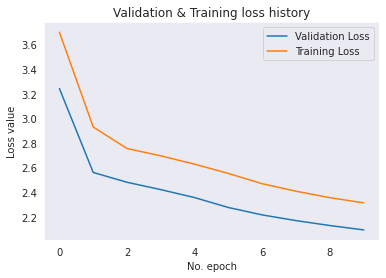

In [268]:
plot_loss(Bidir_Lstm_glove_Model_history1)

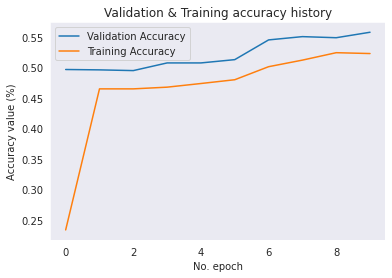

In [269]:
plot_accuracy(Bidir_Lstm_glove_Model_history1)

In [270]:
# Test the model after training
test_results = BiDir_lstm_model_glove1.evaluate(x_test, y_test, verbose=False)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {100*test_results[1]}%')

Test results - Loss: 2.2552599906921387 - Accuracy: 51.61290168762207%


In [271]:
y_pred = BiDir_lstm_model_glove1.predict_classes(x_test)

<Figure size 432x288 with 0 Axes>

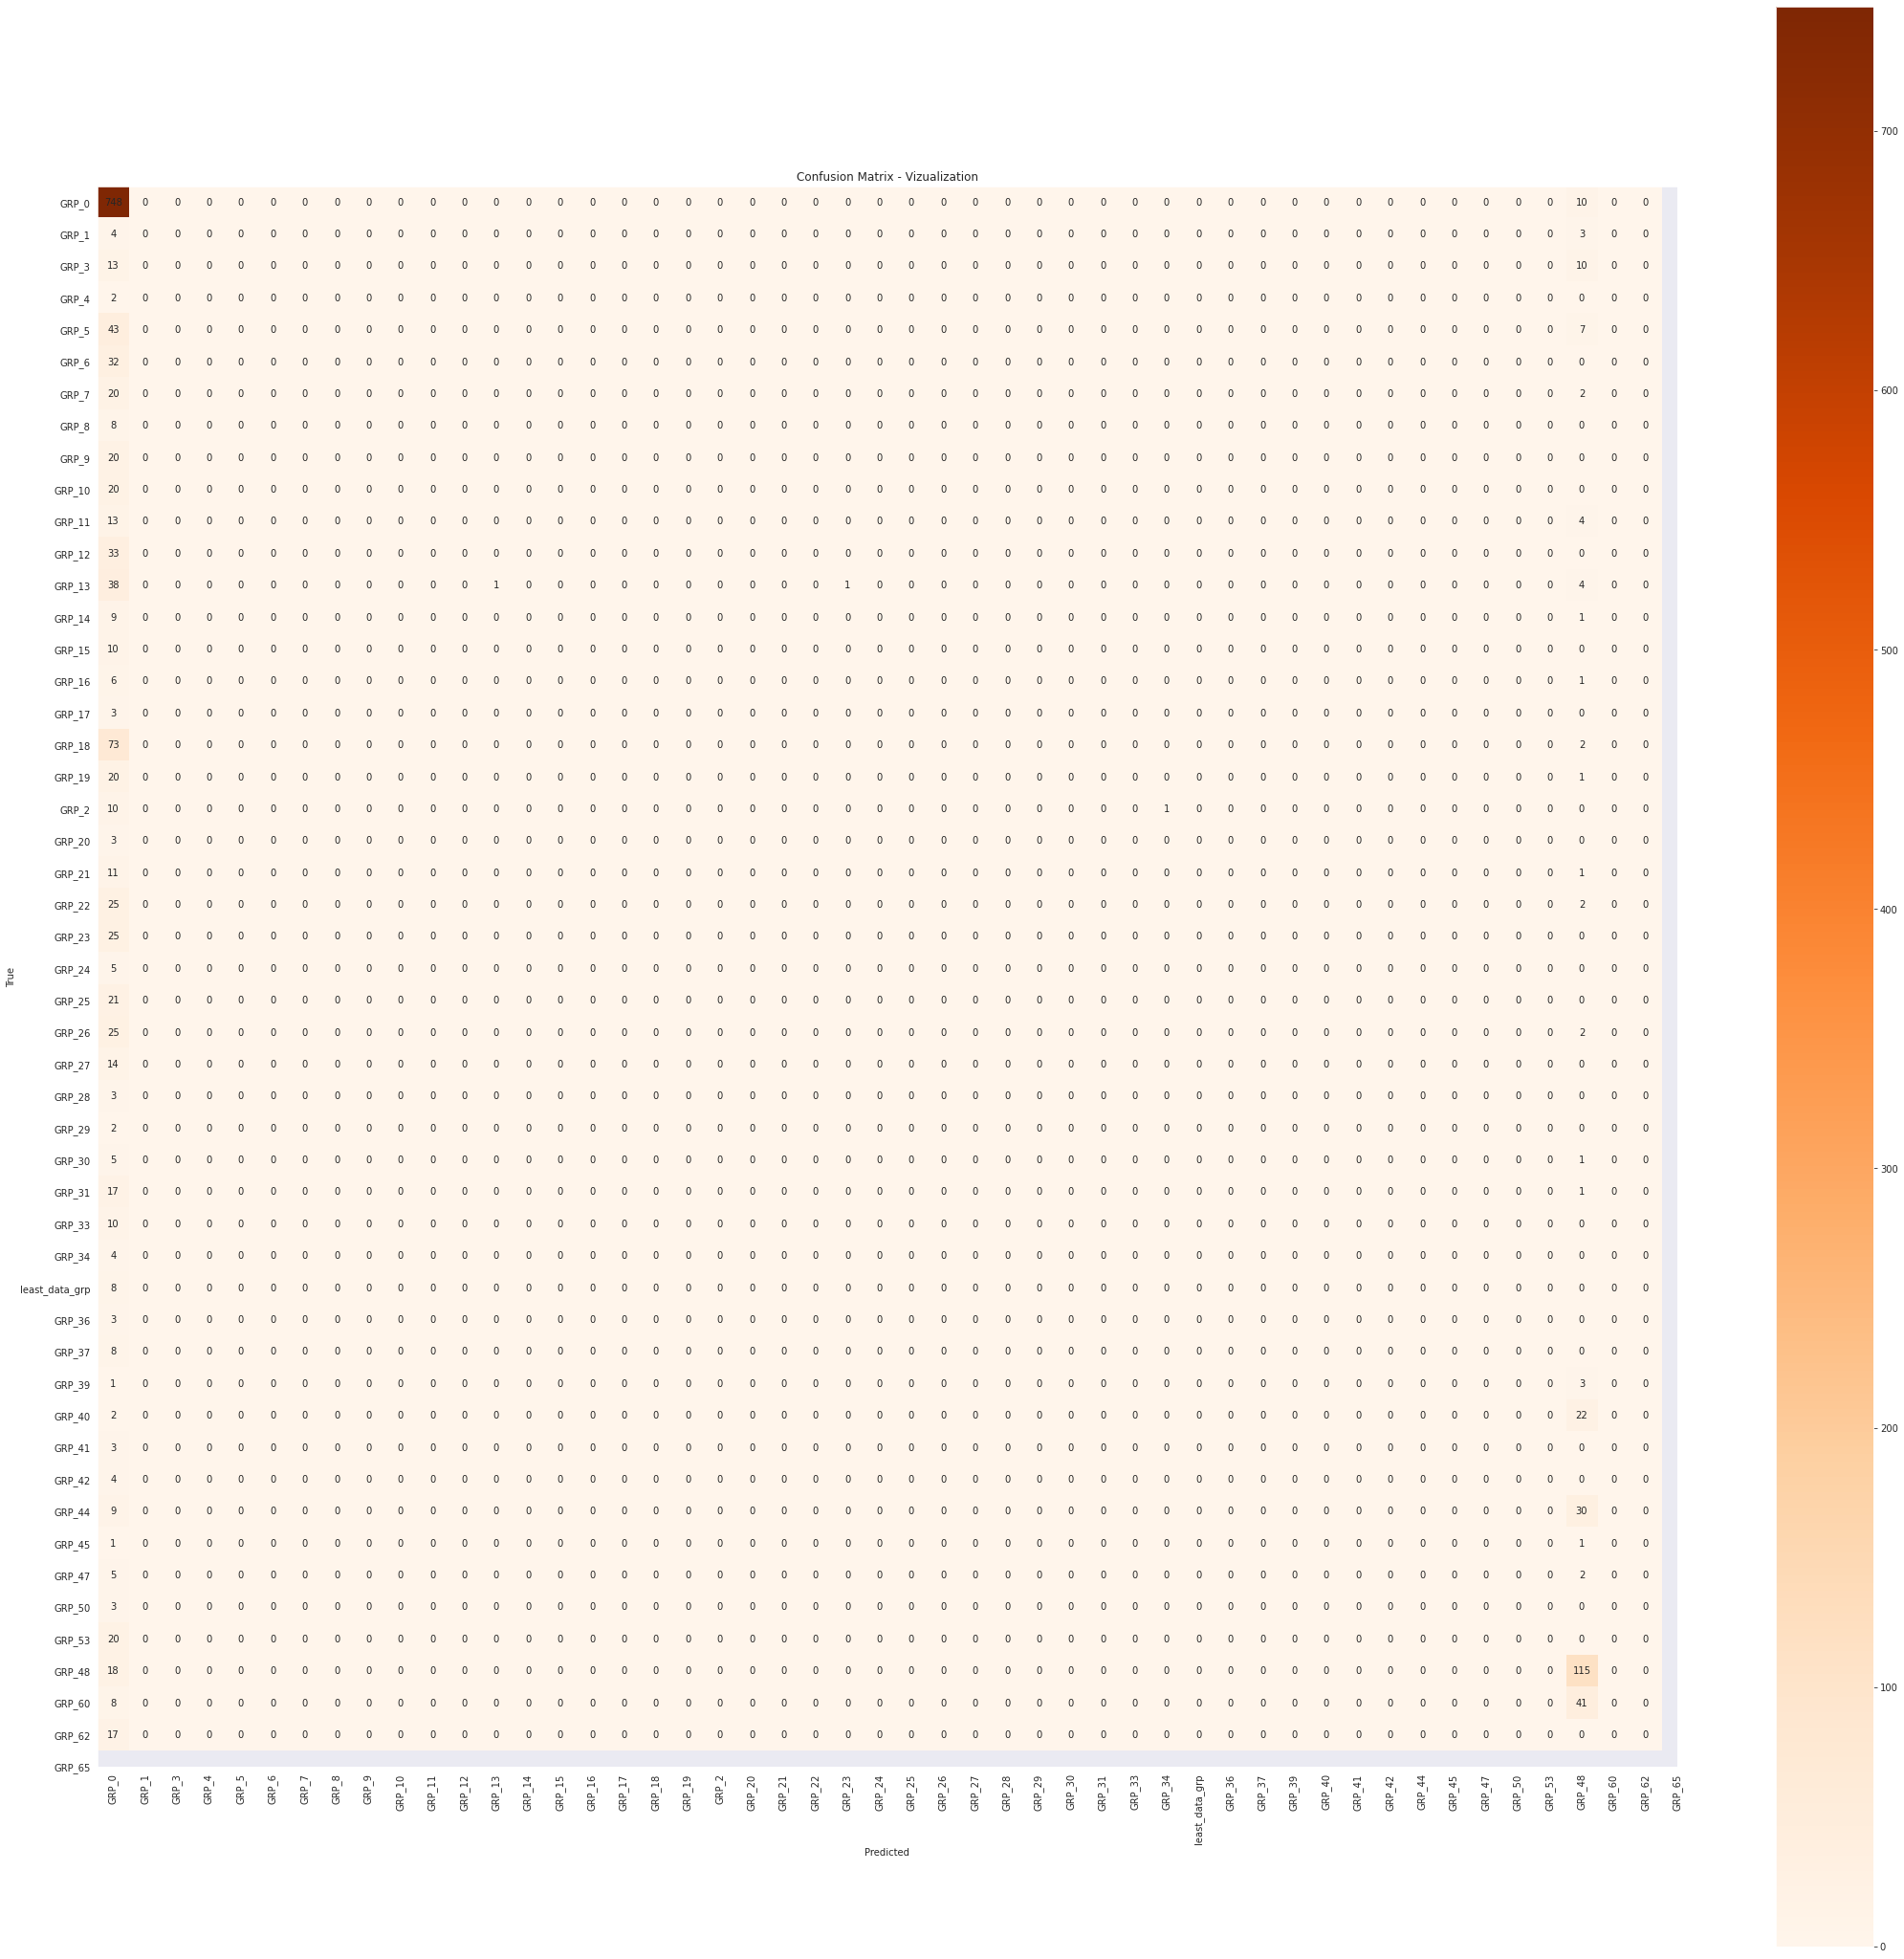

In [272]:
BiDir_lstm_glove1_report, BiDir_LSTM_Glove1_Accuracy_Score,BiDir_LSTM_Glove1_F1_Score = calculate_Accuracy_F1_Score(y_test, y_pred)

In [273]:
print("Accuracy_Score: ", BiDir_LSTM_Glove1_Accuracy_Score)
print("F1 Score: ", BiDir_LSTM_Glove1_F1_Score)
print(BiDir_lstm_glove1_report)

Accuracy_Score:  0.5161290322580645
F1 Score:  0.3601429346566277
              precision    recall  f1-score   support

           0       0.53      0.99      0.69       758
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        23
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        50
           5       0.00      0.00      0.00        32
           6       0.00      0.00      0.00        22
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        20
           9       0.00      0.00      0.00        20
          10       0.00      0.00      0.00        17
          11       0.00      0.00      0.00        33
          12       1.00      0.02      0.04        44
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00        10
          15       0.00      0.00      0.00         7
          16   

#### Compare the Models

In [274]:
AppendModelResults('BiDirectional LSTM with LR 0.0001', BiDir_LSTM_Glove1_Accuracy_Score, BiDir_LSTM_Glove1_F1_Score)

Accuracy  F1 Score
LR_Model                                0.642772  0.553273
LR_Grped                                0.611111  0.514081
SVC Model                               0.643369  0.553122
SVC_Grped                               0.613501  0.519972
Decision Tree                           0.599761  0.586772
Decision Tree Grped                     0.580645  0.573504
Random Forest                           0.659498  0.589122
Random Forest Grped                     0.636798  0.564951
AdaBoost                                0.517324  0.386926
AdaBoost Grped                          0.486260  0.361604
Sequential NLP                          0.574074  0.500027
LSTM with Word2Vec                      0.560932  0.476163
LSTM with Glove                         0.578256  0.531280
BiDirectional LSTM with Glove           0.605735  0.578127
BiDirectional LSTM with 50 Dimensions   0.587216  0.523063
Bidirectional LSTM with 200 Dimensions  0.567503  0.470190
BiDirectional LSTM with 300 Dimensions  0.587814  0.490047
BiDirectional LSTM with LR 0.0001       0.516129  0.360143

**Observations:**

1. As seen above, both the accuracy score and F1 score are lower when Learning rate is very low (0.0001). The increase in the number of epochs (10) helped to increase the accuracy of the model from 22% to 52%. Increasing the epochs more can increase the accuracy little more. But since the F1 scores are very low, this model with learning rate 0.0001 cannot be considered further.



### Create and Compile a Bidirectional LSTM Model with different LSTM Values

1. Embedding Size = 100
2. Maxlen = 100
3. LSTM units = 256
4. Activation function = Relu
5. Learning rate = 0.01

In [275]:
BiDir_lstm_model_glove2 = Sequential()
#Embedding layer
BiDir_lstm_model_glove2.add(Embedding(vocab_size, embedding_size, input_length = maxlen, weights=[embedding_matrix_glove]))
BiDir_lstm_model_glove2.add(Bidirectional(LSTM(units=256,recurrent_dropout=0.5,dropout=0.5)))
BiDir_lstm_model_glove2.add(Flatten())
BiDir_lstm_model_glove2.add(Dropout(0.50))
BiDir_lstm_model_glove2.add(Dense(50, activation='relu'))
BiDir_lstm_model_glove2.add(Flatten())
BiDir_lstm_model_glove2.add(Dropout(0.50))
BiDir_lstm_model_glove2.add(Dense(50, activation='softmax'))
BiDir_lstm_model_glove2.compile(optimizer=Adam(lr = 0.01), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [276]:
BiDir_lstm_model_glove2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 100, 100)          1070800   
_________________________________________________________________
bidirectional_5 (Bidirection (None, 512)               731136    
_________________________________________________________________
flatten_11 (Flatten)         (None, 512)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 50)                25650     
_________________________________________________________________
flatten_12 (Flatten)         (None, 50)                0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 50)               

In [277]:
Batch_size = 100
Epochs = 5
model_checkpoint = ModelCheckpoint("results_{val_loss:.2f}", save_best_only=True,verbose=1)
early_stopping = EarlyStopping(patience=5, verbose=1)
reduce_lr = ReduceLROnPlateau(patience=4, min_lr=1e-05, factor=0.1)
Bidir_Lstm_glove_Model_history2 = BiDir_lstm_model_glove2.fit(x_train, y_train, batch_size = Batch_size, callbacks=[model_checkpoint,early_stopping,reduce_lr], validation_data = (x_val,y_val), epochs = Epochs)

Epoch 1/5
51/51 [==============================] - ETA: 0s - loss: 2.7475 - acc: 0.4671
Epoch 00001: val_loss improved from inf to 2.17216, saving model to results_2.17
51/51 [==============================] - 48s 946ms/step - loss: 2.7475 - acc: 0.4671 - val_loss: 2.1722 - val_acc: 0.5526
Epoch 2/5
51/51 [==============================] - ETA: 0s - loss: 2.2836 - acc: 0.5247
Epoch 00002: val_loss improved from 2.17216 to 2.03885, saving model to results_2.04
51/51 [==============================] - 48s 948ms/step - loss: 2.2836 - acc: 0.5247 - val_loss: 2.0389 - val_acc: 0.5556
Epoch 3/5
51/51 [==============================] - ETA: 0s - loss: 2.1619 - acc: 0.5279
Epoch 00003: val_loss did not improve from 2.03885
51/51 [==============================] - 40s 793ms/step - loss: 2.1619 - acc: 0.5279 - val_loss: 2.0654 - val_acc: 0.5526
Epoch 4/5
51/51 [==============================] - ETA: 0s - loss: 1.9988 - acc: 0.5339
Epoch 00004: val_loss improved from 2.03885 to 2.03854, saving mo

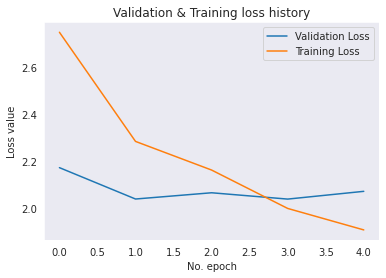

In [278]:
plot_loss(Bidir_Lstm_glove_Model_history2)

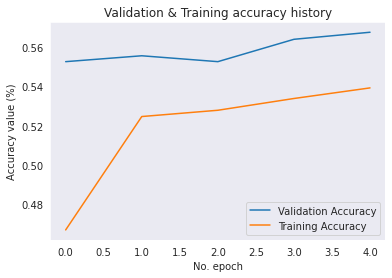

In [279]:
plot_accuracy(Bidir_Lstm_glove_Model_history2)

In [280]:
# Test the model after training
test_results = BiDir_lstm_model_glove2.evaluate(x_test, y_test, verbose=False)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {100*test_results[1]}%')

Test results - Loss: 2.2647619247436523 - Accuracy: 54.181599617004395%


In [281]:
y_pred = BiDir_lstm_model_glove2.predict_classes(x_test)

<Figure size 432x288 with 0 Axes>

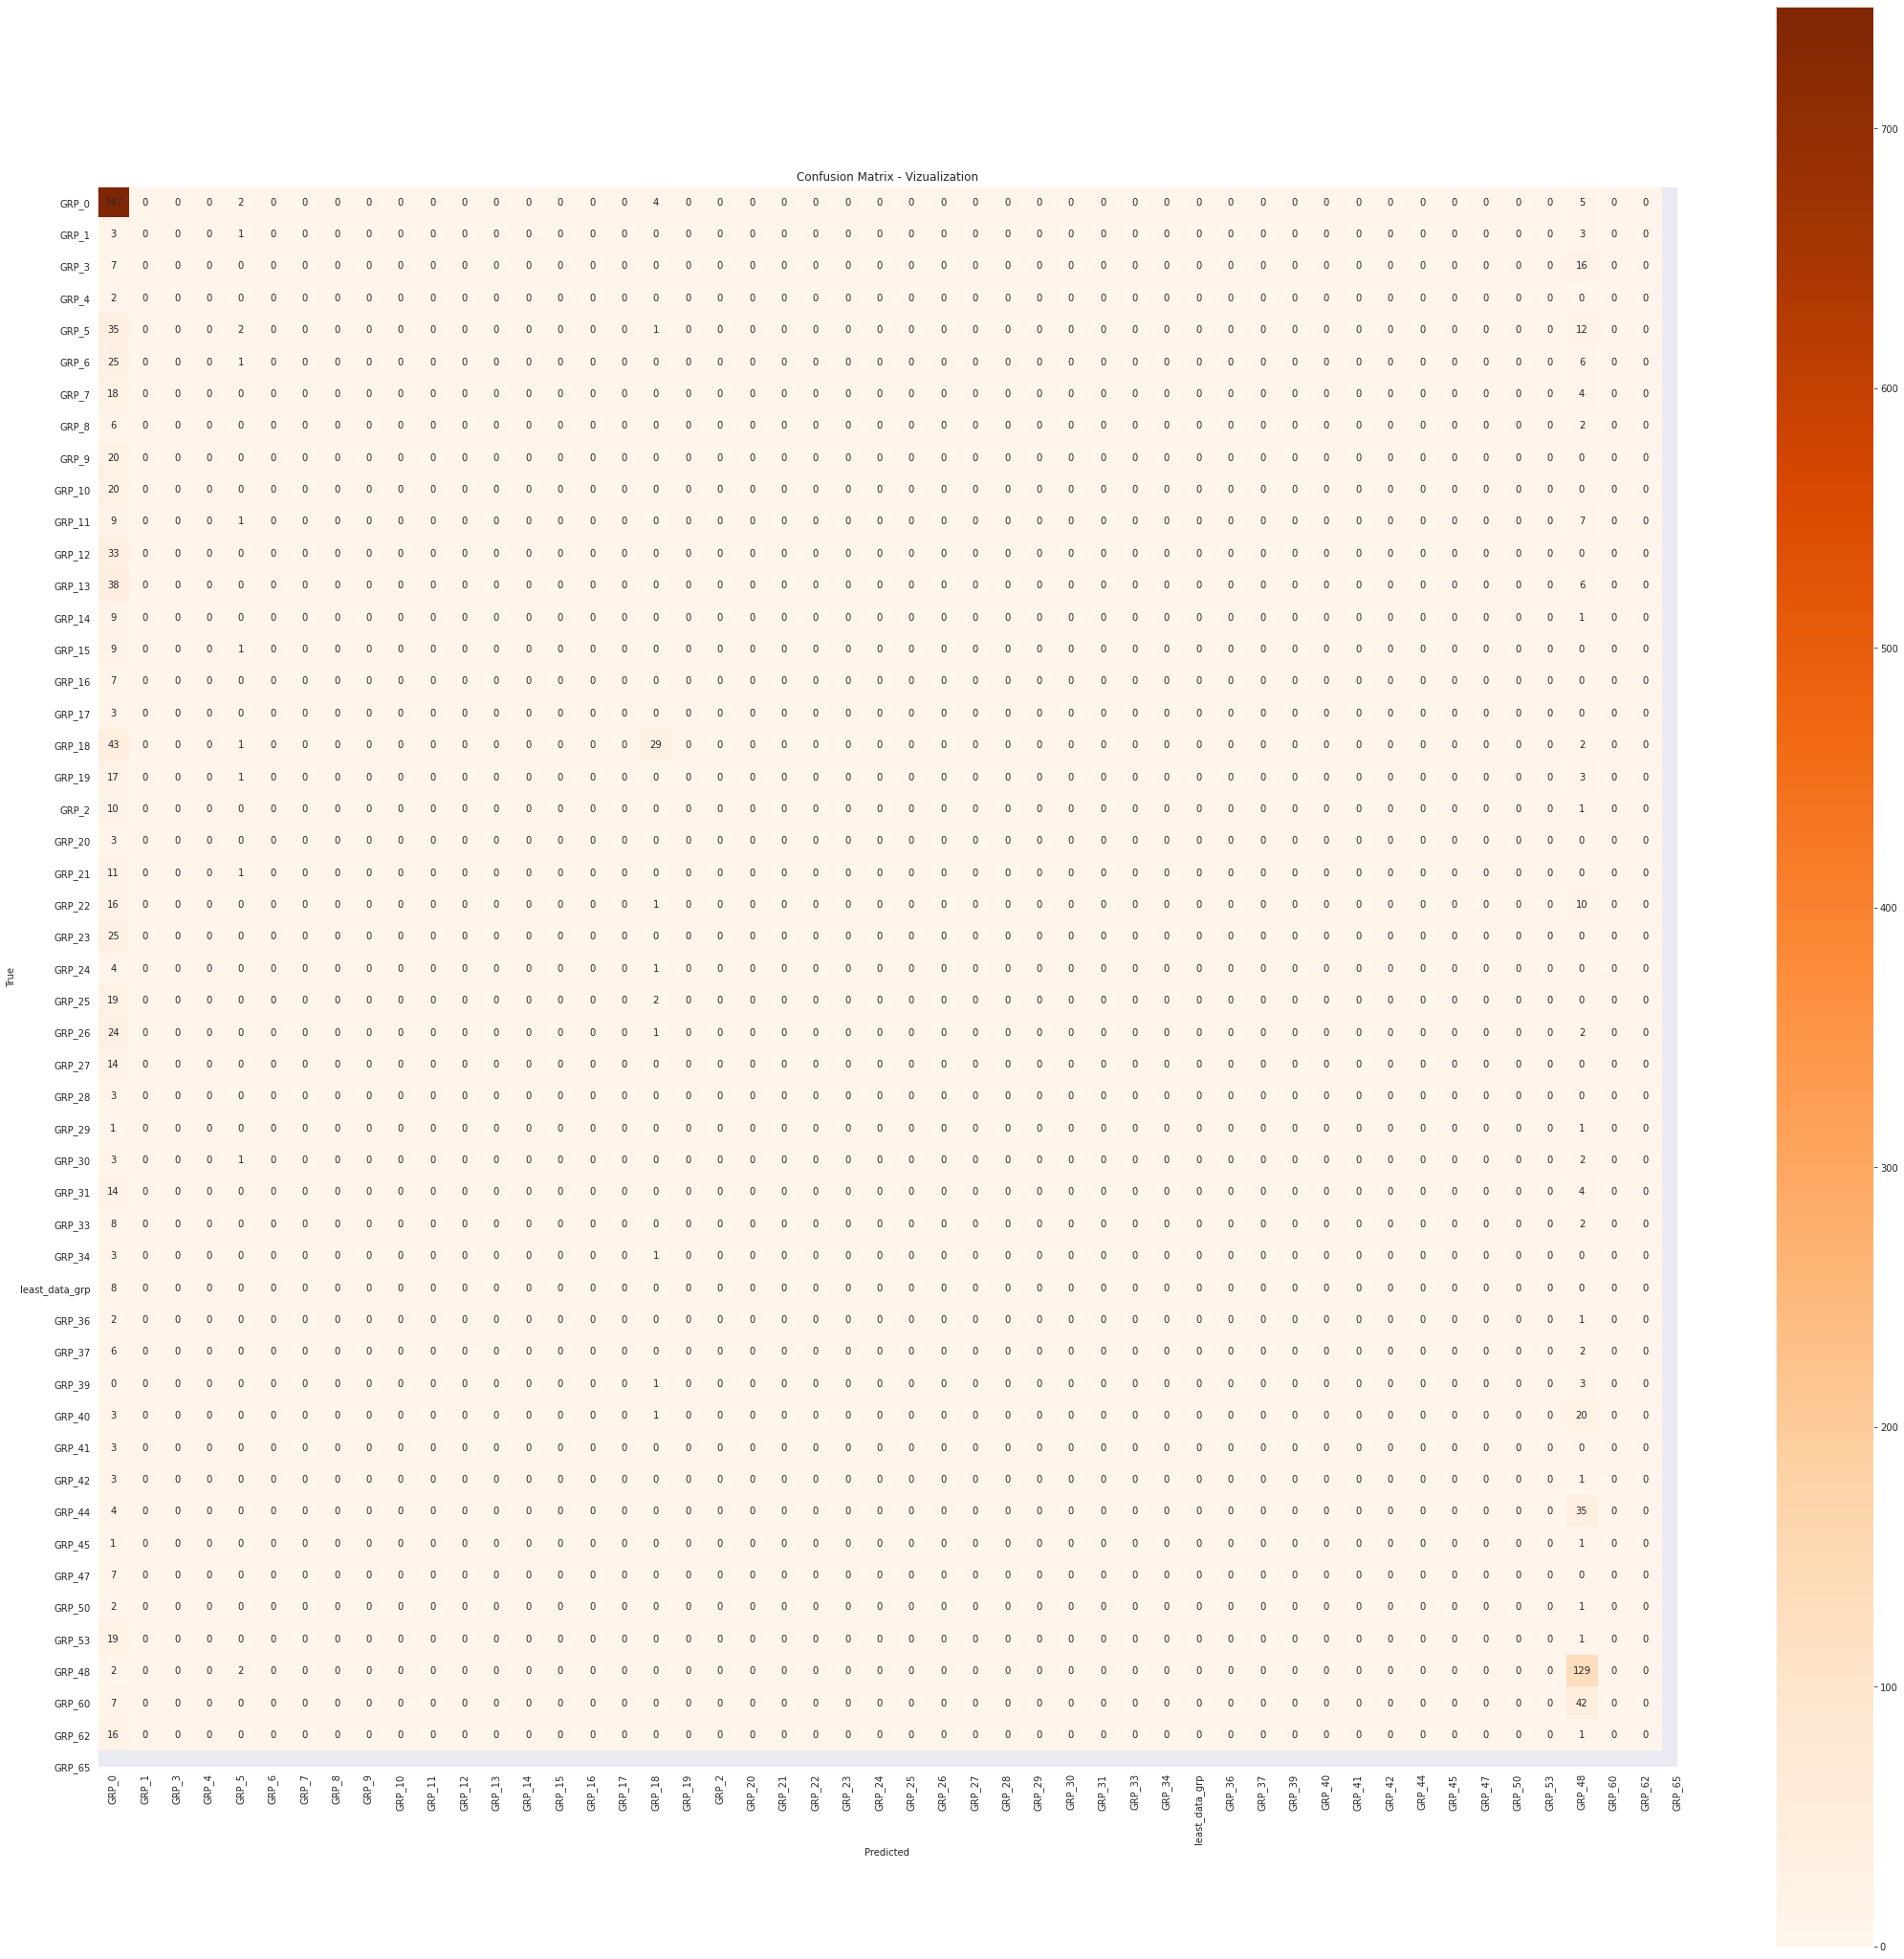

In [282]:
BiDir_lstm_glove2_report, BiDir_LSTM_Glove2_Accuracy_Score,BiDir_LSTM_Glove2_F1_Score = calculate_Accuracy_F1_Score(y_test, y_pred)

In [283]:
print("Accuracy_Score: ", BiDir_LSTM_Glove2_Accuracy_Score)
print("F1 Score: ", BiDir_LSTM_Glove2_F1_Score)
print(BiDir_lstm_glove2_report)

Accuracy_Score:  0.5418160095579451
F1 Score:  0.3987325369595133
              precision    recall  f1-score   support

           0       0.58      0.99      0.73       758
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        23
           3       0.00      0.00      0.00         2
           4       0.14      0.04      0.06        50
           5       0.00      0.00      0.00        32
           6       0.00      0.00      0.00        22
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        20
           9       0.00      0.00      0.00        20
          10       0.00      0.00      0.00        17
          11       0.00      0.00      0.00        33
          12       0.00      0.00      0.00        44
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00        10
          15       0.00      0.00      0.00         7
          16   

#### Compare the Models

In [284]:
AppendModelResults('BiDirectional LSTM with 256 units',BiDir_LSTM_Glove2_Accuracy_Score,BiDir_LSTM_Glove2_F1_Score)

Accuracy  F1 Score
LR_Model                                0.642772  0.553273
LR_Grped                                0.611111  0.514081
SVC Model                               0.643369  0.553122
SVC_Grped                               0.613501  0.519972
Decision Tree                           0.599761  0.586772
Decision Tree Grped                     0.580645  0.573504
Random Forest                           0.659498  0.589122
Random Forest Grped                     0.636798  0.564951
AdaBoost                                0.517324  0.386926
AdaBoost Grped                          0.486260  0.361604
Sequential NLP                          0.574074  0.500027
LSTM with Word2Vec                      0.560932  0.476163
LSTM with Glove                         0.578256  0.531280
BiDirectional LSTM with Glove           0.605735  0.578127
BiDirectional LSTM with 50 Dimensions   0.587216  0.523063
Bidirectional LSTM with 200 Dimensions  0.567503  0.470190
BiDirectional LSTM with 300 Dimensions  0.587814  0.490047
BiDirectional LSTM with LR 0.0001       0.516129  0.360143
BiDirectional LSTM with 256 units       0.541816  0.398733

**Observations:**

1. The performance of this model (Bidirectional LSTM with 256 units) is also not a better one compared to the base model (Bidirectional LSTM with Glove). With the increase in the number of LSTM units, the model did not perform with higher accuracy. The accuracy and F1 scores are lower than the base model.



### Create and Compile a Bidirectional LSTM Model with multiple LSTM layers

In [285]:
BiDir_lstm_model_glove3 = Sequential()
#Embedding layer
BiDir_lstm_model_glove3.add(Embedding(vocab_size, embedding_size, weights=[embedding_matrix_glove],trainable=True))
BiDir_lstm_model_glove3.add(Bidirectional(LSTM(units=128,recurrent_dropout=0.5,dropout=0.5, return_sequences=True)))
BiDir_lstm_model_glove3.add(LSTM(128, return_sequences=True))
BiDir_lstm_model_glove3.add(LSTM(64))
BiDir_lstm_model_glove3.add(Dense(50, activation='softmax'))
BiDir_lstm_model_glove3.compile(optimizer=Adam(lr = 0.01), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [286]:
BiDir_lstm_model_glove3.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 100)         1070800   
_________________________________________________________________
bidirectional_6 (Bidirection (None, None, 256)         234496    
_________________________________________________________________
lstm_9 (LSTM)                (None, None, 128)         197120    
_________________________________________________________________
lstm_10 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_15 (Dense)             (None, 50)                3250      
Total params: 1,555,074
Trainable params: 1,555,074
Non-trainable params: 0
_________________________________________________________________


In [287]:
Batch_size = 100
Epochs = 5
model_checkpoint = ModelCheckpoint("results_{val_loss:.2f}", save_best_only=True,verbose=1)
early_stopping = EarlyStopping(patience=5, verbose=1)
reduce_lr = ReduceLROnPlateau(patience=4, min_lr=1e-05, factor=0.1)
Bidir_Lstm_glove_Model_history3 = BiDir_lstm_model_glove3.fit(x_train, y_train, batch_size = Batch_size, callbacks=[model_checkpoint,early_stopping,reduce_lr], validation_data = (x_val,y_val), epochs = Epochs)

Epoch 1/5
51/51 [==============================] - ETA: 0s - loss: 2.5036 - acc: 0.4739
Epoch 00001: val_loss improved from inf to 2.12956, saving model to results_2.13
51/51 [==============================] - 56s 1s/step - loss: 2.5036 - acc: 0.4739 - val_loss: 2.1296 - val_acc: 0.5538
Epoch 2/5
51/51 [==============================] - ETA: 0s - loss: 2.1012 - acc: 0.5307
Epoch 00002: val_loss improved from 2.12956 to 2.01640, saving model to results_2.02
51/51 [==============================] - 55s 1s/step - loss: 2.1012 - acc: 0.5307 - val_loss: 2.0164 - val_acc: 0.5562
Epoch 3/5
51/51 [==============================] - ETA: 0s - loss: 1.9020 - acc: 0.5478
Epoch 00003: val_loss improved from 2.01640 to 1.93208, saving model to results_1.93
51/51 [==============================] - 56s 1s/step - loss: 1.9020 - acc: 0.5478 - val_loss: 1.9321 - val_acc: 0.5562
Epoch 4/5
51/51 [==============================] - ETA: 0s - loss: 1.7516 - acc: 0.5590
Epoch 00004: val_loss did not improve fr

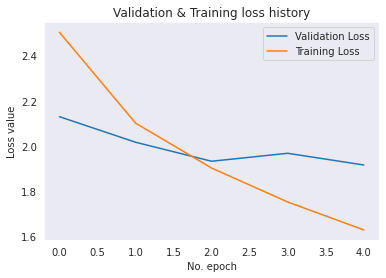

In [288]:
plot_loss(Bidir_Lstm_glove_Model_history3)

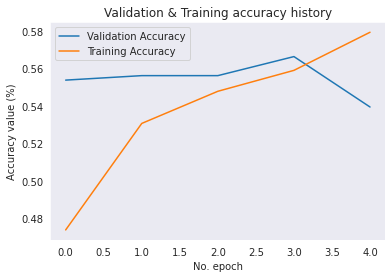

In [289]:
plot_accuracy(Bidir_Lstm_glove_Model_history3)

In [290]:
# Test the model after training
test_results = BiDir_lstm_model_glove3.evaluate(x_test, y_test, verbose=False)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {100*test_results[1]}%')

Test results - Loss: 2.0010905265808105 - Accuracy: 52.986860275268555%


In [291]:
y_pred = BiDir_lstm_model_glove3.predict_classes(x_test)

<Figure size 432x288 with 0 Axes>

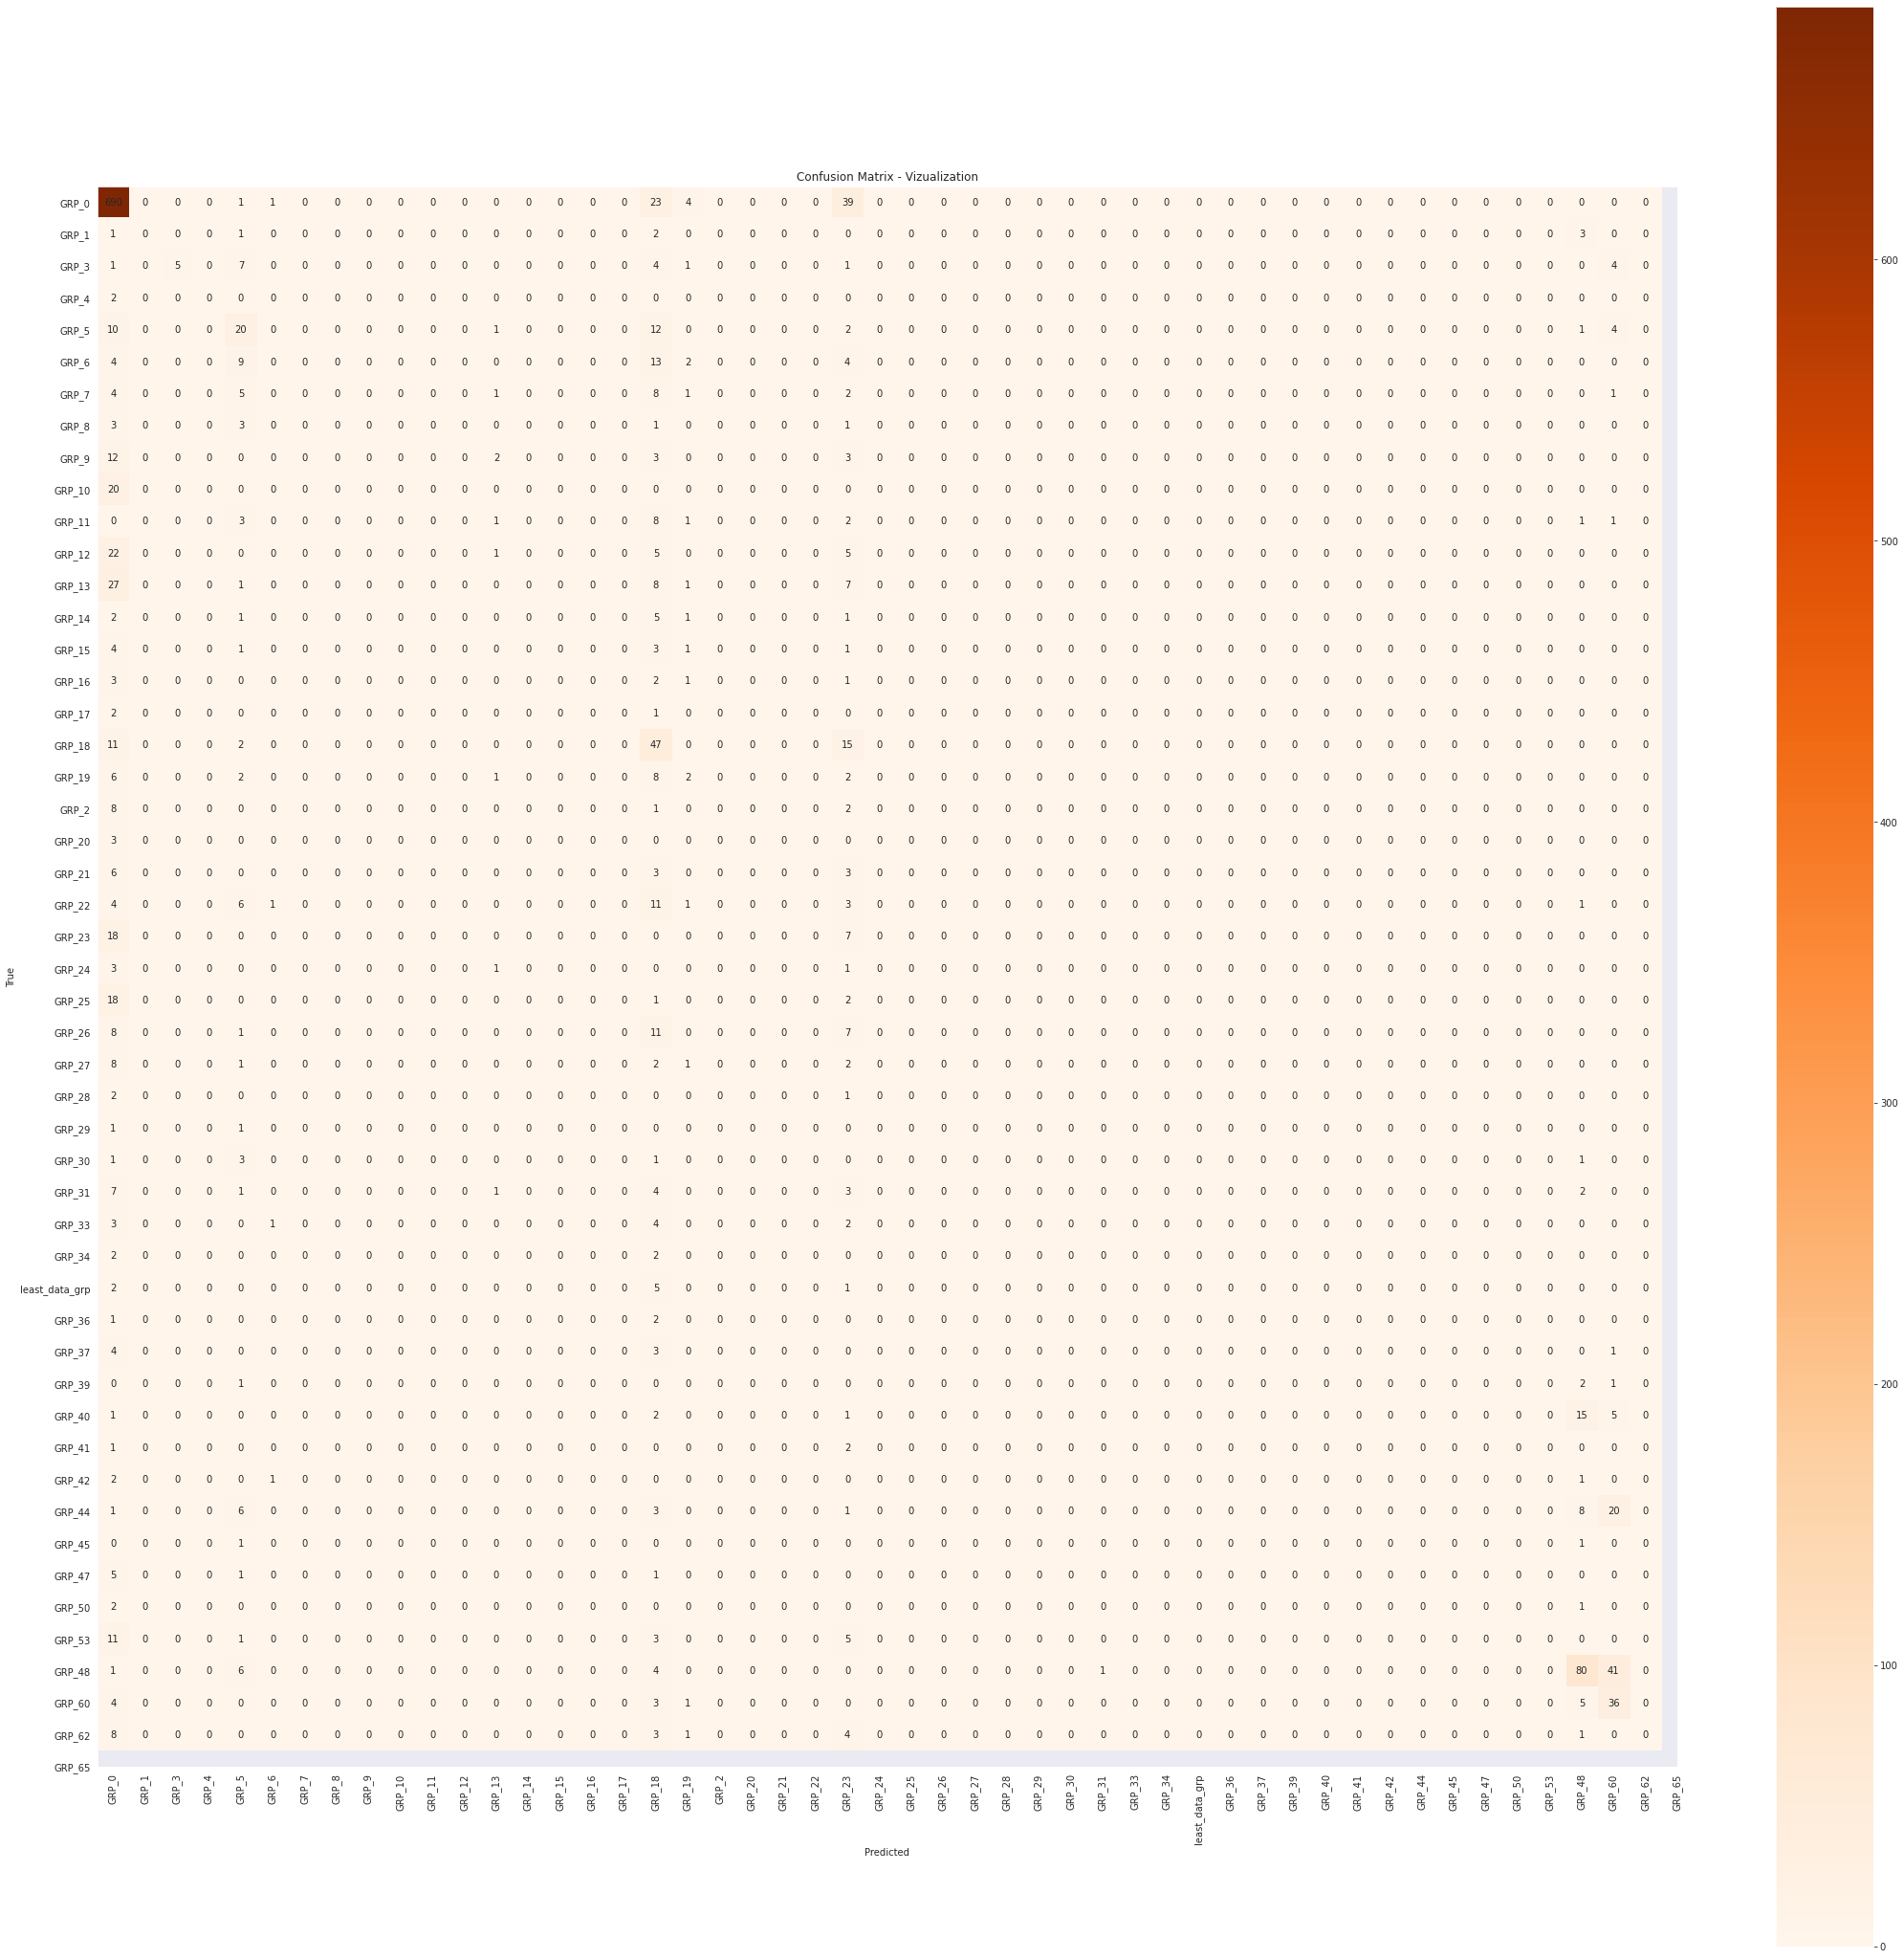

In [292]:
BiDir_lstm_glove3_report, BiDir_LSTM_Glove3_Accuracy_Score,BiDir_LSTM_Glove3_F1_Score = calculate_Accuracy_F1_Score(y_test, y_pred)

In [293]:
print("Accuracy_Score: ", BiDir_LSTM_Glove3_Accuracy_Score)
print("F1 Score: ", BiDir_LSTM_Glove3_F1_Score)
print(BiDir_lstm_glove3_report)

Accuracy_Score:  0.529868578255675
F1 Score:  0.45703478437669126
              precision    recall  f1-score   support

           0       0.72      0.91      0.80       758
           1       0.00      0.00      0.00         7
           2       1.00      0.22      0.36        23
           3       0.00      0.00      0.00         2
           4       0.24      0.40      0.30        50
           5       0.00      0.00      0.00        32
           6       0.00      0.00      0.00        22
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        20
           9       0.00      0.00      0.00        20
          10       0.00      0.00      0.00        17
          11       0.00      0.00      0.00        33
          12       0.00      0.00      0.00        44
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00        10
          15       0.00      0.00      0.00         7
          16   

#### Compare the Models

In [294]:
AppendModelResults('Multiple LSTM',BiDir_LSTM_Glove3_Accuracy_Score,BiDir_LSTM_Glove3_F1_Score)

Accuracy  F1 Score
LR_Model                                0.642772  0.553273
LR_Grped                                0.611111  0.514081
SVC Model                               0.643369  0.553122
SVC_Grped                               0.613501  0.519972
Decision Tree                           0.599761  0.586772
Decision Tree Grped                     0.580645  0.573504
Random Forest                           0.659498  0.589122
Random Forest Grped                     0.636798  0.564951
AdaBoost                                0.517324  0.386926
AdaBoost Grped                          0.486260  0.361604
Sequential NLP                          0.574074  0.500027
LSTM with Word2Vec                      0.560932  0.476163
LSTM with Glove                         0.578256  0.531280
BiDirectional LSTM with Glove           0.605735  0.578127
BiDirectional LSTM with 50 Dimensions   0.587216  0.523063
Bidirectional LSTM with 200 Dimensions  0.567503  0.470190
BiDirectional LSTM with 300 Dimensions  0.587814  0.490047
BiDirectional LSTM with LR 0.0001       0.516129  0.360143
BiDirectional LSTM with 256 units       0.541816  0.398733
Multiple LSTM                           0.529869  0.457035

**Observations:**

1. Multiple LSTM model is better than the LSTM model with 256 units with respect to F1 score but even this is not better than our base model. Even with return sequences set to true and making the embedding layer trainable, the accuracy or the F1 scores have not improved. 



### Base LSTM Model with Return Sequences True and trainable parameter True

This model contains Bidirectional lstm model, with 2 LSTM layers and have set the trainable parameter to True and return_sequences to True.

In [295]:
BiDir_lstm_model_glove_final = Sequential()
#Embedding layer
BiDir_lstm_model_glove_final.add(Embedding(vocab_size, embedding_size, input_length=maxlen, weights=[embedding_matrix_glove],trainable=True))
BiDir_lstm_model_glove_final.add(Bidirectional(LSTM(units=128,recurrent_dropout=0.5,dropout=0.5, return_sequences=True)))
BiDir_lstm_model_glove_final.add(Bidirectional(LSTM(units=128)))
BiDir_lstm_model_glove_final.add(Flatten())
BiDir_lstm_model_glove_final.add(Dense(100, activation='tanh'))
BiDir_lstm_model_glove_final.add(Flatten())
BiDir_lstm_model_glove_final.add(Dropout(0.50))
BiDir_lstm_model_glove_final.add(Dense(50, activation='softmax'))
BiDir_lstm_model_glove_final.compile(optimizer=Adam(lr = 0.01), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [296]:
BiDir_lstm_model_glove_final.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 100, 100)          1070800   
_________________________________________________________________
bidirectional_7 (Bidirection (None, 100, 256)          234496    
_________________________________________________________________
bidirectional_8 (Bidirection (None, 256)               394240    
_________________________________________________________________
flatten_13 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               25700     
_________________________________________________________________
flatten_14 (Flatten)         (None, 100)               0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 100)             

In [297]:
Batch_size = 100
Epochs = 5
model_checkpoint = ModelCheckpoint("results_{val_loss:.2f}", save_best_only=True,verbose=1)
early_stopping = EarlyStopping(patience=5, verbose=1)
reduce_lr = ReduceLROnPlateau(patience=4, min_lr=1e-05, factor=0.1)
Bidir_Lstm_glove_Model_history_final = BiDir_lstm_model_glove_final.fit(x_train, y_train, batch_size = Batch_size, callbacks=[model_checkpoint,early_stopping,reduce_lr], validation_data = (x_val,y_val), epochs = Epochs)

Epoch 1/5
51/51 [==============================] - ETA: 0s - loss: 2.5420 - acc: 0.4861
Epoch 00001: val_loss improved from inf to 2.04340, saving model to results_2.04
51/51 [==============================] - 59s 1s/step - loss: 2.5420 - acc: 0.4861 - val_loss: 2.0434 - val_acc: 0.5544
Epoch 2/5
51/51 [==============================] - ETA: 0s - loss: 1.9888 - acc: 0.5402
Epoch 00002: val_loss improved from 2.04340 to 1.84602, saving model to results_1.85
51/51 [==============================] - 58s 1s/step - loss: 1.9888 - acc: 0.5402 - val_loss: 1.8460 - val_acc: 0.5812
Epoch 3/5
51/51 [==============================] - ETA: 0s - loss: 1.7650 - acc: 0.5637
Epoch 00003: val_loss improved from 1.84602 to 1.78378, saving model to results_1.78
51/51 [==============================] - 57s 1s/step - loss: 1.7650 - acc: 0.5637 - val_loss: 1.7838 - val_acc: 0.5806
Epoch 4/5
51/51 [==============================] - ETA: 0s - loss: 1.5833 - acc: 0.5859
Epoch 00004: val_loss did not improve fr

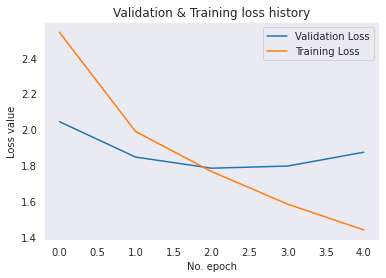

In [298]:
plot_loss(Bidir_Lstm_glove_Model_history_final)

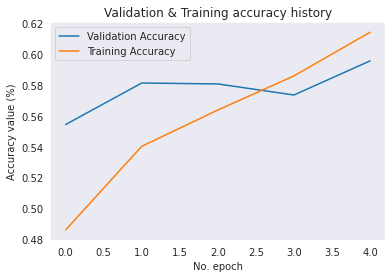

In [299]:
plot_accuracy(Bidir_Lstm_glove_Model_history_final)

In [300]:
# Test the model after training
test_results = BiDir_lstm_model_glove_final.evaluate(x_test, y_test, verbose=False)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {100*test_results[1]}%')

Test results - Loss: 1.9458965063095093 - Accuracy: 58.30346345901489%


In [301]:
y_pred = BiDir_lstm_model_glove_final.predict_classes(x_test)

<Figure size 432x288 with 0 Axes>

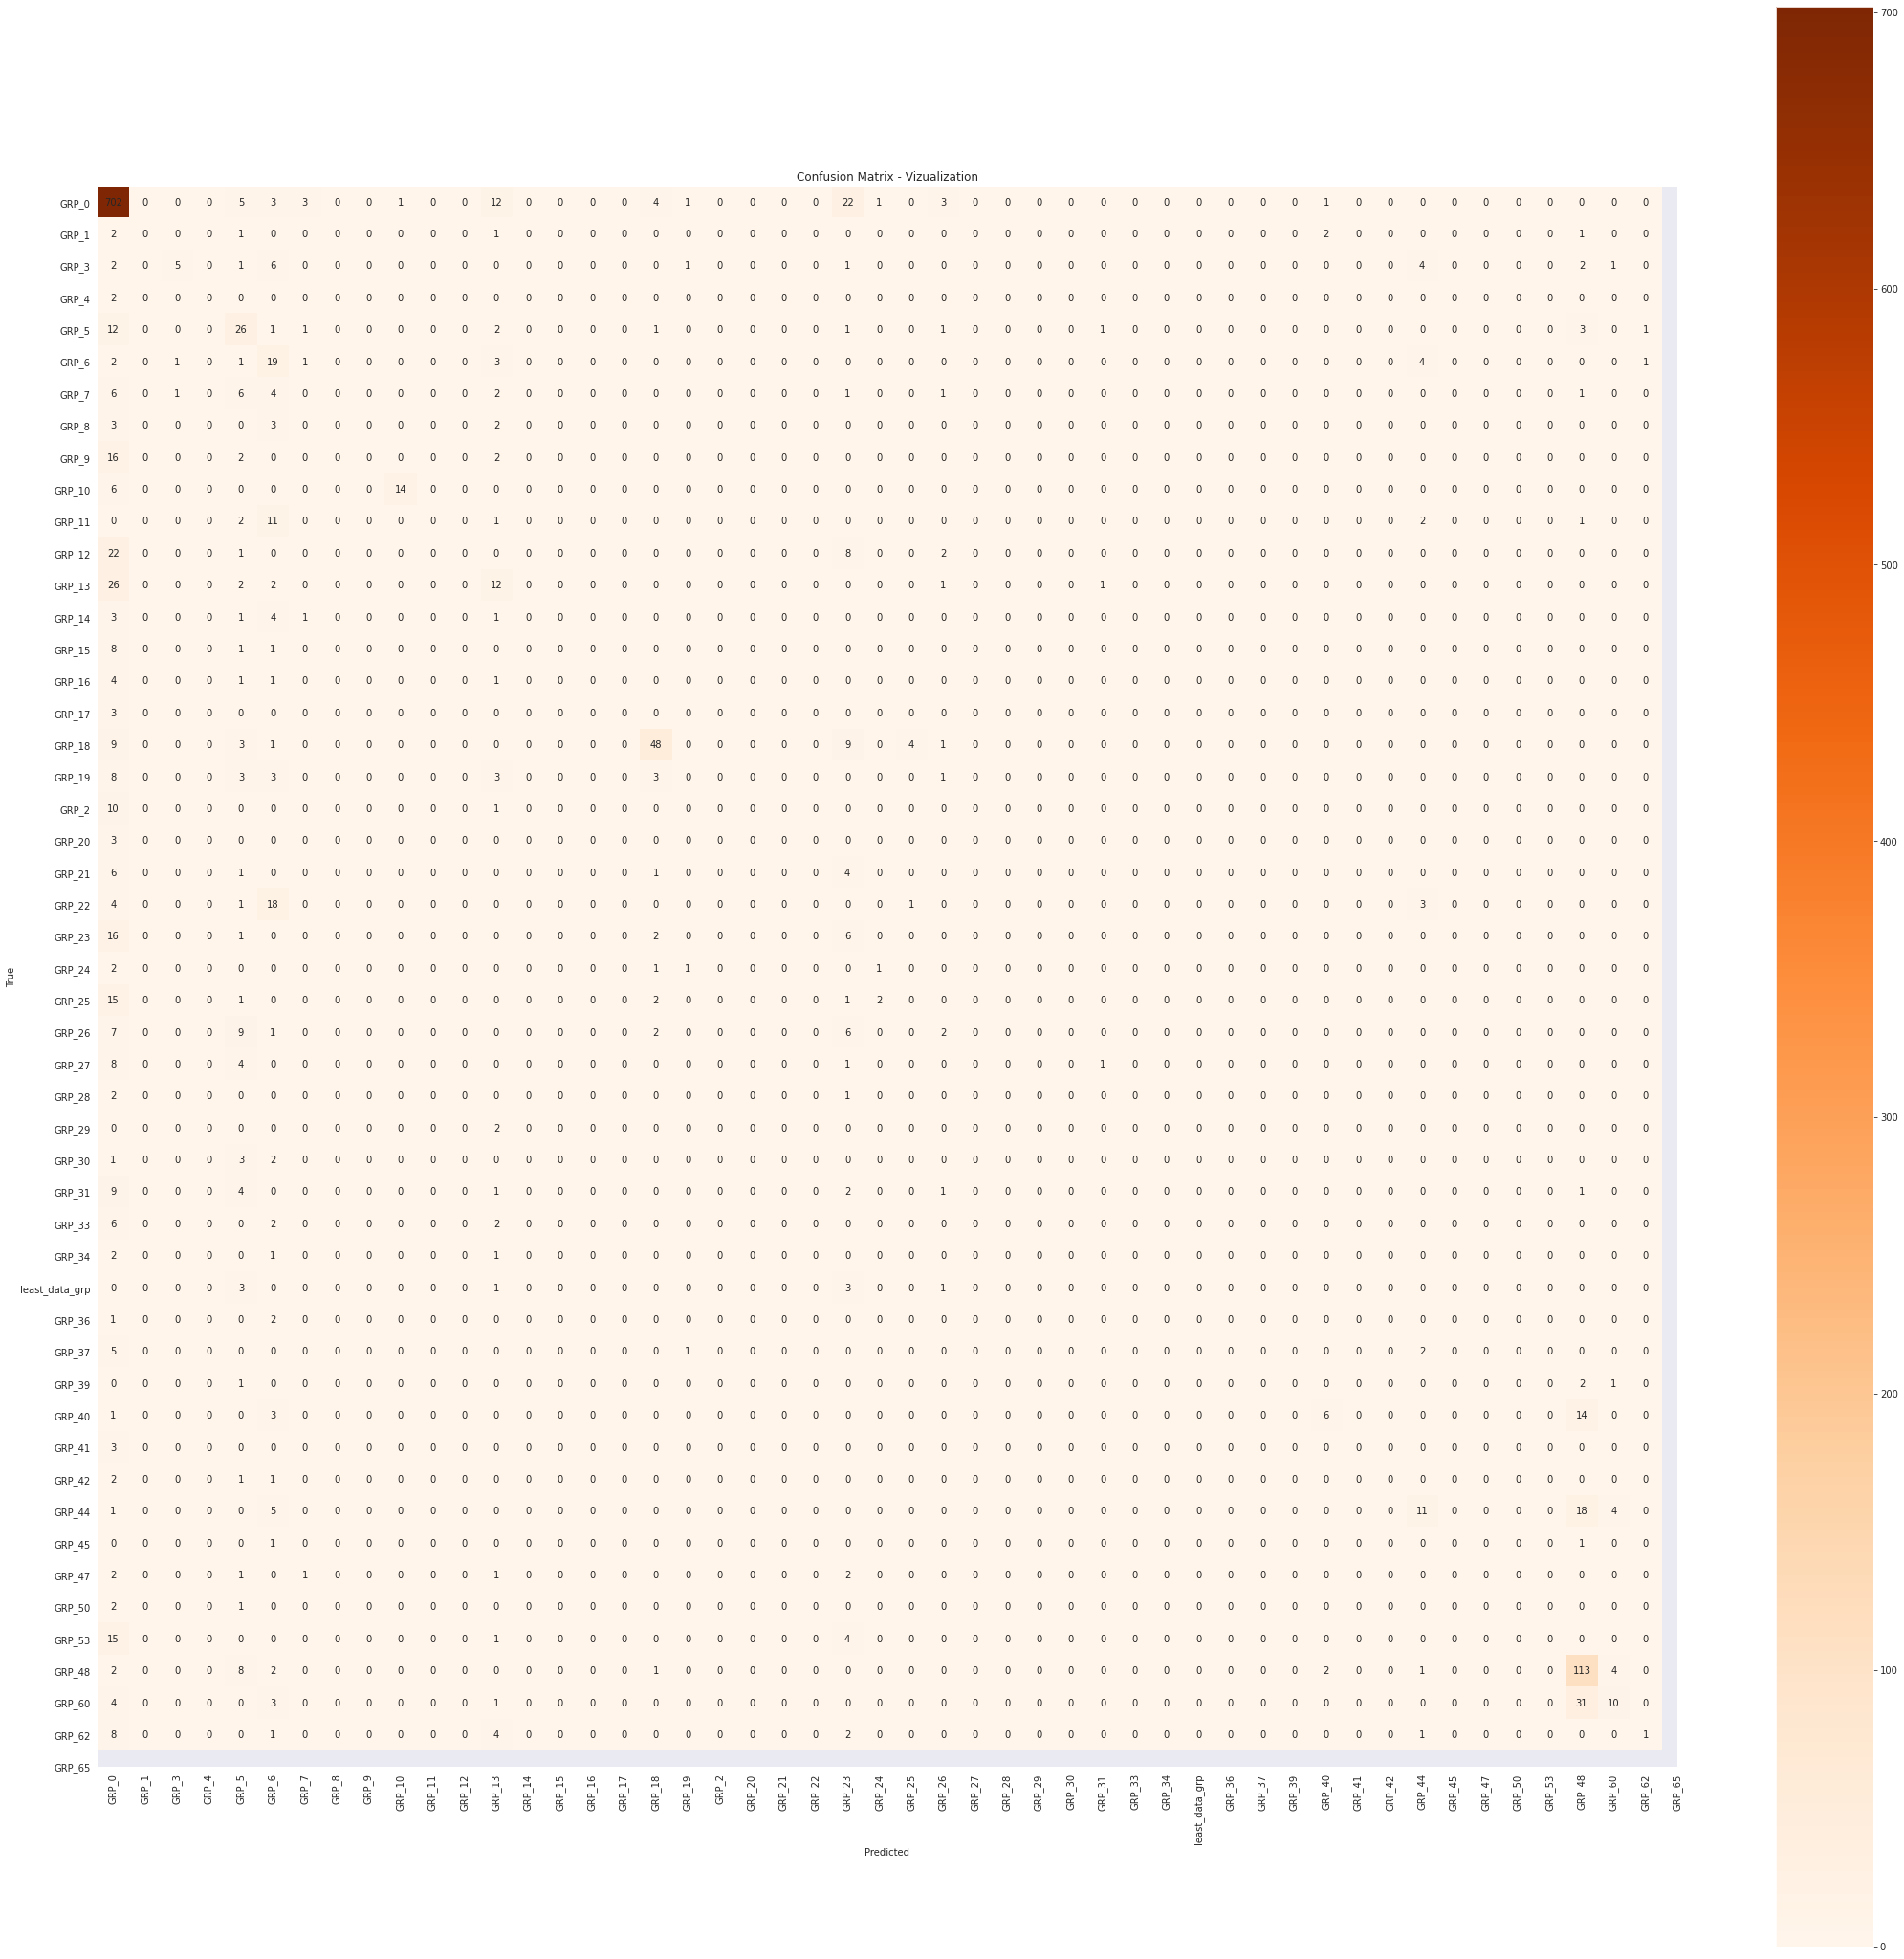

In [302]:
BiDir_lstm_glove_final_report, BiDir_LSTM_Glove_final_Accuracy_Score,BiDir_LSTM_Glove_final_F1_Score = calculate_Accuracy_F1_Score(y_test, y_pred)

In [303]:
print("Accuracy_Score: ", BiDir_LSTM_Glove_final_Accuracy_Score)
print("F1 Score: ", BiDir_LSTM_Glove_final_F1_Score)
print(BiDir_lstm_glove_final_report)

Accuracy_Score:  0.5830346475507766
F1 Score:  0.5165972704959606
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       758
           1       0.00      0.00      0.00         7
           2       0.71      0.22      0.33        23
           3       0.00      0.00      0.00         2
           4       0.27      0.52      0.36        50
           5       0.19      0.59      0.29        32
           6       0.00      0.00      0.00        22
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        20
           9       0.93      0.70      0.80        20
          10       0.00      0.00      0.00        17
          11       0.00      0.00      0.00        33
          12       0.21      0.27      0.24        44
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00        10
          15       0.00      0.00      0.00         7
          16   

#### Compare the Models

In [304]:
AppendModelResults('LSTM with Return Sequences',BiDir_LSTM_Glove_final_Accuracy_Score,BiDir_LSTM_Glove_final_F1_Score)

Accuracy  F1 Score
LR_Model                                0.642772  0.553273
LR_Grped                                0.611111  0.514081
SVC Model                               0.643369  0.553122
SVC_Grped                               0.613501  0.519972
Decision Tree                           0.599761  0.586772
Decision Tree Grped                     0.580645  0.573504
Random Forest                           0.659498  0.589122
Random Forest Grped                     0.636798  0.564951
AdaBoost                                0.517324  0.386926
AdaBoost Grped                          0.486260  0.361604
Sequential NLP                          0.574074  0.500027
LSTM with Word2Vec                      0.560932  0.476163
LSTM with Glove                         0.578256  0.531280
BiDirectional LSTM with Glove           0.605735  0.578127
BiDirectional LSTM with 50 Dimensions   0.587216  0.523063
Bidirectional LSTM with 200 Dimensions  0.567503  0.470190
BiDirectional LSTM with 300 Dimensions  0.587814  0.490047
BiDirectional LSTM with LR 0.0001       0.516129  0.360143
BiDirectional LSTM with 256 units       0.541816  0.398733
Multiple LSTM                           0.529869  0.457035
LSTM with Return Sequences              0.583035  0.516597

**Observations:**

1. LSTM with return sequences have performed well compared to the other LSTM models and also the second best performing model after the base Bidirectional LSTM model with Glove Embedding with respect to F1 Score and accuracy.

2. Even though we tried tuning the model with multiple hyper parameter values, the model performance did not improve drastically from the base model. This shows the skewness/imbalance in the data. 

3. The given data is highly imbalanced with having more records in GRP_0 and this affects the model performance and accuracy.



## RNN Model

In [305]:
RNN_model = Sequential()
#Embedding layer
RNN_model.add(Embedding(vocab_size, embedding_size, input_length=maxlen, weights=[embedding_matrix_glove],trainable=True))
RNN_model.add(Conv1D(100,10,activation='tanh'))
RNN_model.add(MaxPooling1D(pool_size=2))
RNN_model.add(Dropout(0.3))
RNN_model.add(Conv1D(100,10,activation='tanh'))
RNN_model.add(MaxPooling1D(pool_size=2))
RNN_model.add(Bidirectional(LSTM(units=128)))
RNN_model.add(Dropout(0.3))
RNN_model.add(Dense(100, activation='tanh'))
RNN_model.add(Dense(50, activation='softmax'))
RNN_model.compile(optimizer=Adam(lr = 0.01), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [306]:
RNN_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 100, 100)          1070800   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 91, 100)           100100    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 45, 100)           0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 45, 100)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 36, 100)           100100    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 18, 100)           0         
_________________________________________________________________
bidirectional_9 (Bidirection (None, 256)             

In [307]:
Batch_size = 100
Epochs = 5
model_checkpoint = ModelCheckpoint("results_{val_loss:.2f}", save_best_only=True,verbose=1,monitor='val_acc')
early_stopping = EarlyStopping(patience=5, verbose=1)
reduce_lr = ReduceLROnPlateau(patience=2, min_lr=1e-04, factor=0.2, monitor='val_loss')

RNN_model_history = RNN_model.fit(x_train, y_train, batch_size = Batch_size, callbacks=[model_checkpoint,early_stopping,reduce_lr], validation_data = (x_val,y_val), epochs = Epochs)

Epoch 1/5
51/51 [==============================] - ETA: 0s - loss: 2.7628 - acc: 0.4454
Epoch 00001: val_acc improved from -inf to 0.49642, saving model to results_2.47
51/51 [==============================] - 12s 236ms/step - loss: 2.7628 - acc: 0.4454 - val_loss: 2.4654 - val_acc: 0.4964
Epoch 2/5
49/51 [===========================>..] - ETA: 0s - loss: 2.6113 - acc: 0.4651
Epoch 00002: val_acc did not improve from 0.49642
51/51 [==============================] - 1s 24ms/step - loss: 2.6090 - acc: 0.4653 - val_loss: 2.4867 - val_acc: 0.4964
Epoch 3/5
51/51 [==============================] - ETA: 0s - loss: 2.4852 - acc: 0.4653
Epoch 00003: val_acc did not improve from 0.49642
51/51 [==============================] - 1s 21ms/step - loss: 2.4852 - acc: 0.4653 - val_loss: 2.4217 - val_acc: 0.3728
Epoch 4/5
49/51 [===========================>..] - ETA: 0s - loss: 2.2675 - acc: 0.5002
Epoch 00004: val_acc improved from 0.49642 to 0.56213, saving model to results_2.03
51/51 [==============

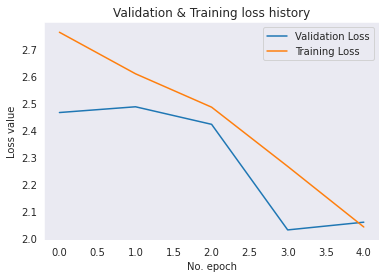

In [308]:
plot_loss(RNN_model_history)

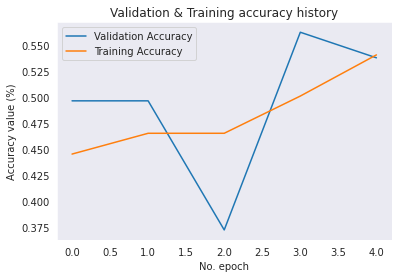

In [309]:
plot_accuracy(RNN_model_history)

In [310]:
# Test the model after training
test_results = RNN_model.evaluate(x_test, y_test, verbose=False)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {100*test_results[1]}%')

Test results - Loss: 2.206364154815674 - Accuracy: 50.53763389587402%


In [311]:
y_pred = RNN_model.predict_classes(x_test)

<Figure size 432x288 with 0 Axes>

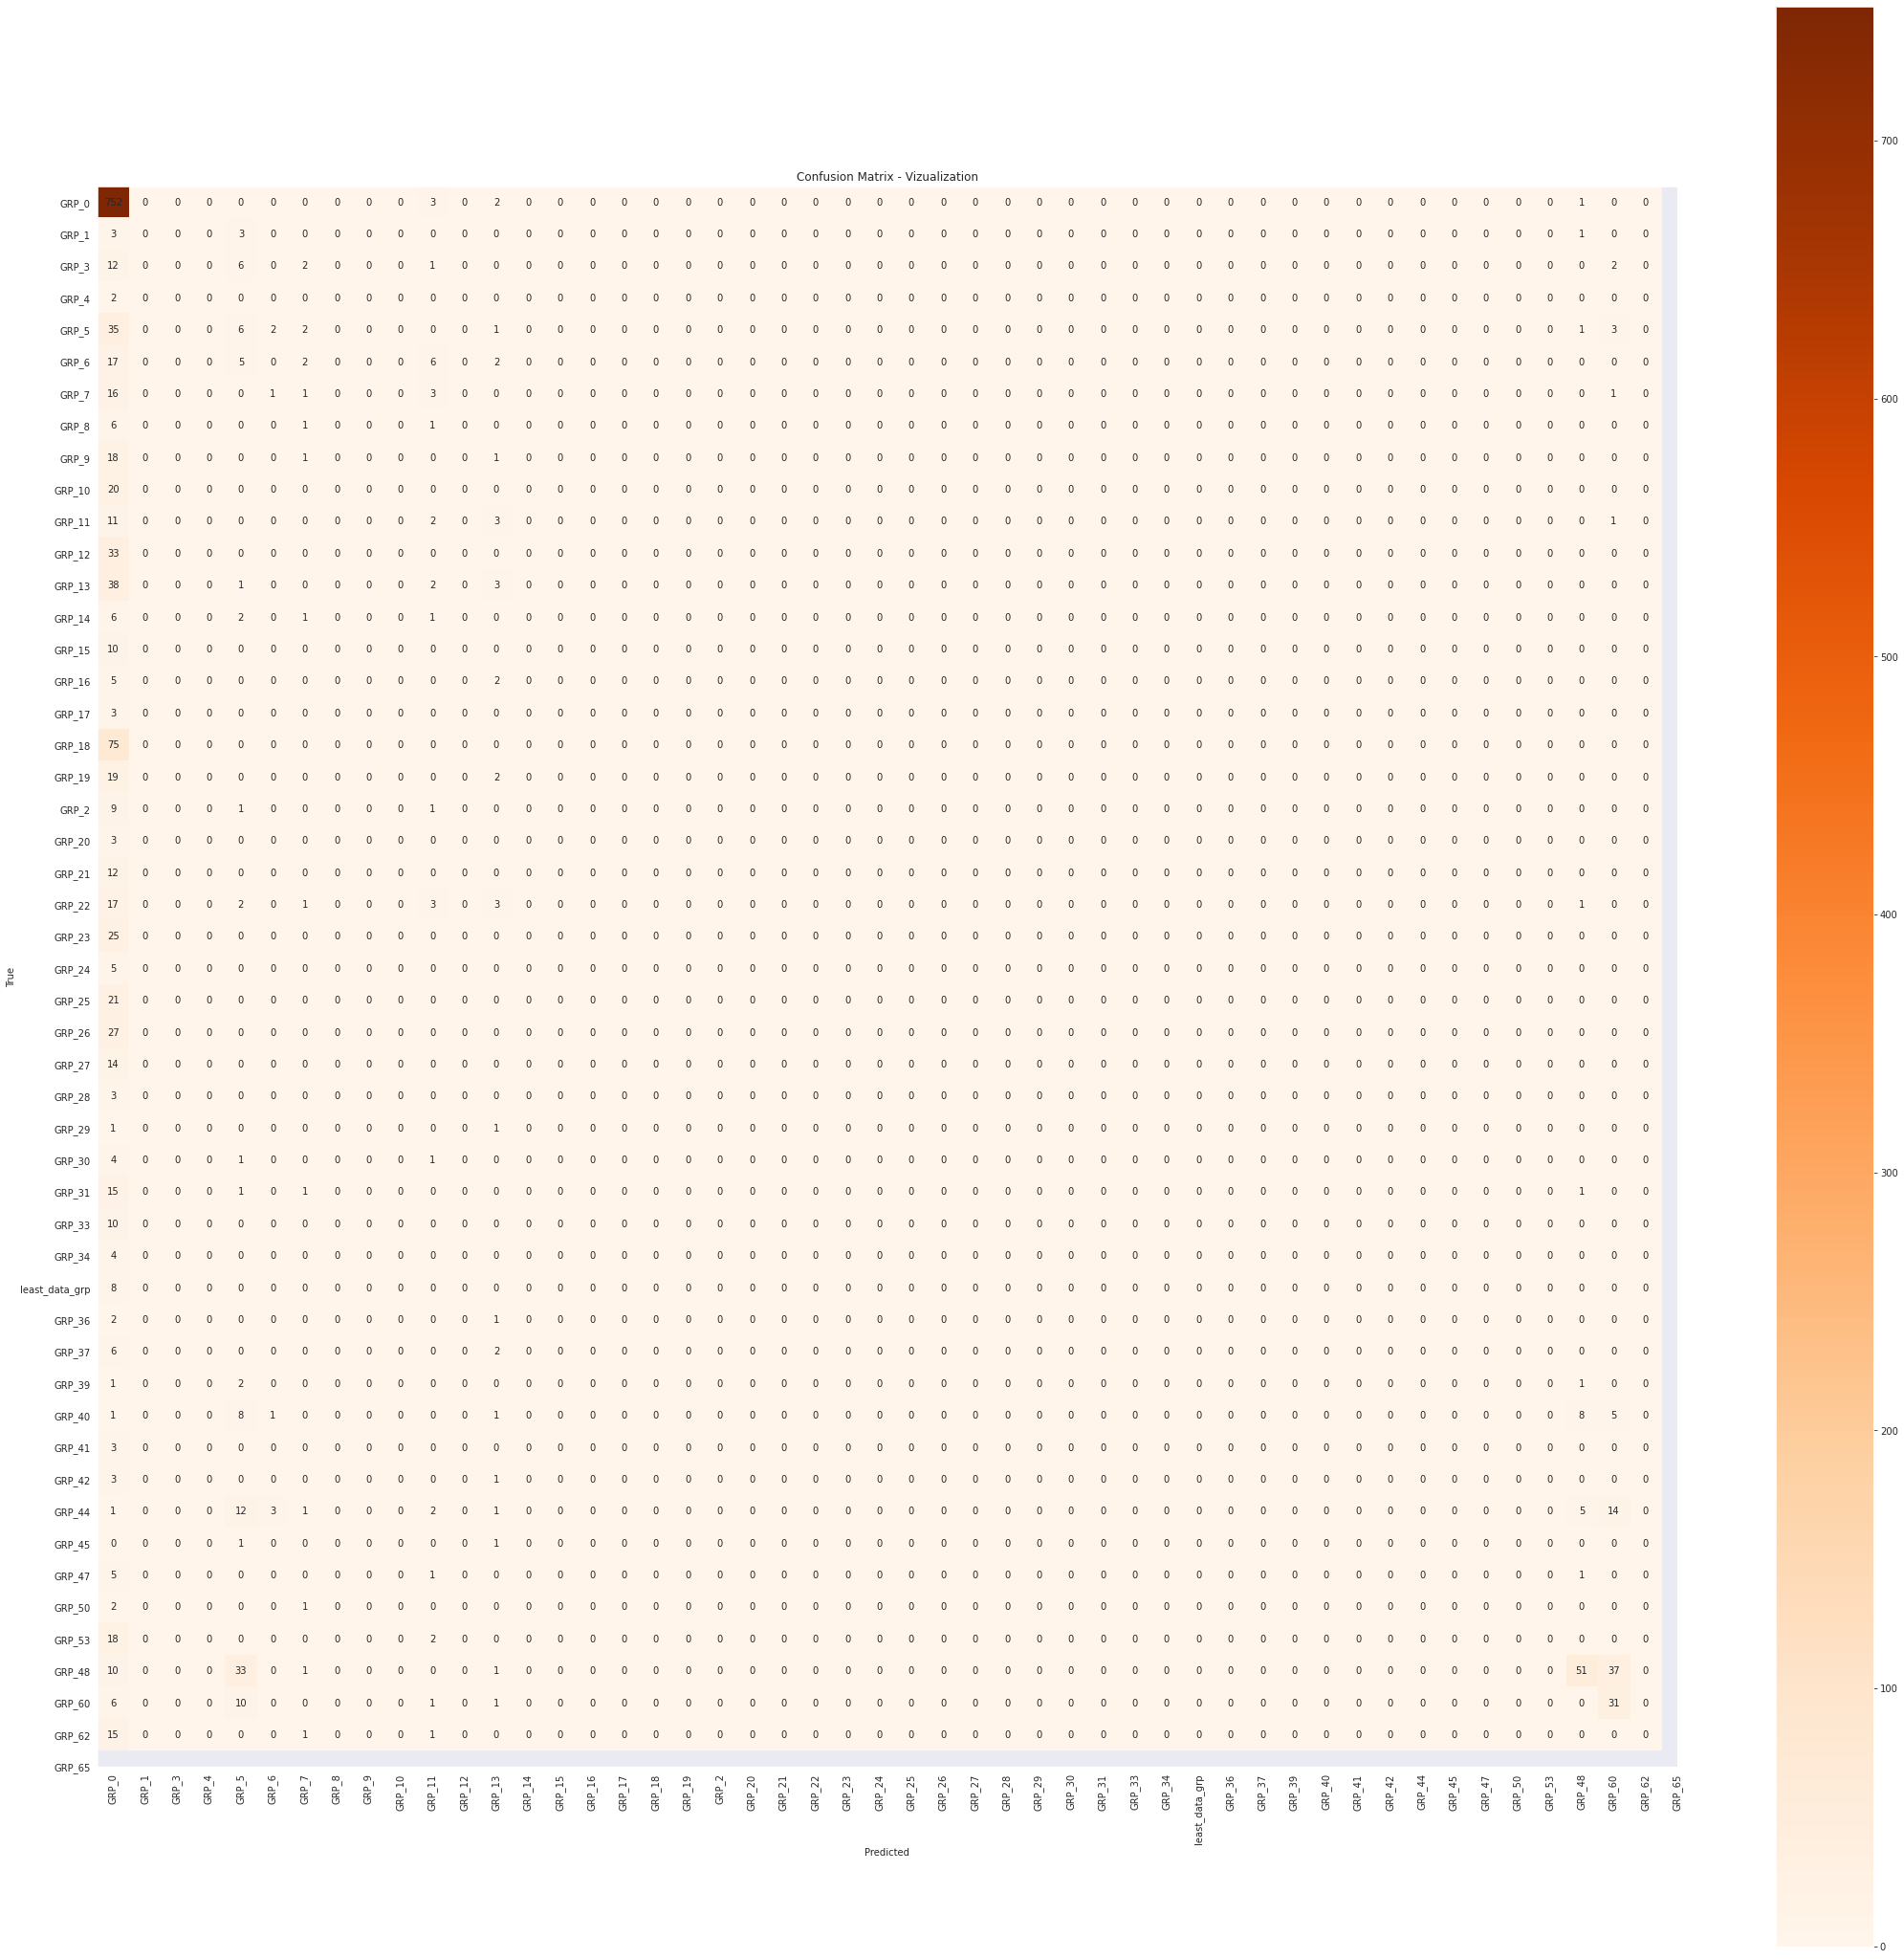

In [312]:
RNN_model_report, RNN_model_Accuracy_Score,RNN_model_F1_Score = calculate_Accuracy_F1_Score(y_test, y_pred)

In [313]:
print("Accuracy_Score: ", RNN_model_Accuracy_Score)
print("F1 Score: ", RNN_model_F1_Score)
print(RNN_model_report)

Accuracy_Score:  0.5053763440860215
F1 Score:  0.38445177905043326
              precision    recall  f1-score   support

           0       0.56      0.99      0.72       758
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        23
           3       0.00      0.00      0.00         2
           4       0.06      0.12      0.08        50
           5       0.00      0.00      0.00        32
           6       0.06      0.05      0.05        22
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        20
           9       0.00      0.00      0.00        20
          10       0.06      0.12      0.08        17
          11       0.00      0.00      0.00        33
          12       0.10      0.07      0.08        44
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00        10
          15       0.00      0.00      0.00         7
          16  

### Compare the Models

In [314]:
AppendModelResults('RNN Model', RNN_model_Accuracy_Score,RNN_model_F1_Score)

Accuracy  F1 Score
LR_Model                                0.642772  0.553273
LR_Grped                                0.611111  0.514081
SVC Model                               0.643369  0.553122
SVC_Grped                               0.613501  0.519972
Decision Tree                           0.599761  0.586772
Decision Tree Grped                     0.580645  0.573504
Random Forest                           0.659498  0.589122
Random Forest Grped                     0.636798  0.564951
AdaBoost                                0.517324  0.386926
AdaBoost Grped                          0.486260  0.361604
Sequential NLP                          0.574074  0.500027
LSTM with Word2Vec                      0.560932  0.476163
LSTM with Glove                         0.578256  0.531280
BiDirectional LSTM with Glove           0.605735  0.578127
BiDirectional LSTM with 50 Dimensions   0.587216  0.523063
Bidirectional LSTM with 200 Dimensions  0.567503  0.470190
BiDirectional LSTM with 300 Dimensions  0.587814  0.490047
BiDirectional LSTM with LR 0.0001       0.516129  0.360143
BiDirectional LSTM with 256 units       0.541816  0.398733
Multiple LSTM                           0.529869  0.457035
LSTM with Return Sequences              0.583035  0.516597
RNN Model                               0.505376  0.384452

**Observations:**

1. RNN model has the lowest Accuracy score and F1 scores of all the deep learning models



## GRU Model

This GRU model (Gated Recurrent Unit) is a different variation of LSTM that has update gate and reset gate. These gates decide what should be passed to the output. This keeps the relevant information and pass it to the next steps. In this GRU model, 
1. We hvae used the Glove embedding with trainable parameter set to True. 
2. We have used GRU with 128 units followed by tanh and softmax activation functions.  

In [315]:
GRU_model = Sequential()
#Embedding layer
GRU_model.add(Embedding(vocab_size, embedding_size, input_length=maxlen, weights=[embedding_matrix_glove],trainable=True))
GRU_model.add(GRU(units=128))
GRU_model.add(Dropout(0.3))
GRU_model.add(Dense(100, activation='tanh'))
GRU_model.add(Dense(50, activation='softmax'))
GRU_model.compile(optimizer=Adam(lr = 0.01), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [316]:
GRU_model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 100, 100)          1070800   
_________________________________________________________________
gru (GRU)                    (None, 128)               88320     
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 100)               12900     
_________________________________________________________________
dense_21 (Dense)             (None, 50)                5050      
Total params: 1,177,070
Trainable params: 1,177,070
Non-trainable params: 0
_________________________________________________________________


In [317]:
Batch_size = 100
Epochs = 5
model_checkpoint = ModelCheckpoint("results_{val_loss:.2f}", save_best_only=True,verbose=1,monitor='val_acc')
early_stopping = EarlyStopping(patience=5, verbose=1)
reduce_lr = ReduceLROnPlateau(patience=2, min_lr=1e-04, factor=0.2, monitor='val_loss')

GRU_model_history = GRU_model.fit(x_train, y_train, batch_size = Batch_size, callbacks=[model_checkpoint,early_stopping,reduce_lr], validation_data = (x_val,y_val), epochs = Epochs)

Epoch 1/5
51/51 [==============================] - ETA: 0s - loss: 2.1262 - acc: 0.5311
Epoch 00001: val_acc improved from -inf to 0.61708, saving model to results_1.61
51/51 [==============================] - 6s 112ms/step - loss: 2.1262 - acc: 0.5311 - val_loss: 1.6143 - val_acc: 0.6171
Epoch 2/5
51/51 [==============================] - ETA: 0s - loss: 1.3493 - acc: 0.6450
Epoch 00002: val_acc improved from 0.61708 to 0.64277, saving model to results_1.46
51/51 [==============================] - 4s 87ms/step - loss: 1.3493 - acc: 0.6450 - val_loss: 1.4559 - val_acc: 0.6428
Epoch 3/5
49/51 [===========================>..] - ETA: 0s - loss: 0.8790 - acc: 0.7522
Epoch 00003: val_acc improved from 0.64277 to 0.66010, saving model to results_1.52
51/51 [==============================] - 4s 86ms/step - loss: 0.8738 - acc: 0.7528 - val_loss: 1.5217 - val_acc: 0.6601
Epoch 4/5
50/51 [============================>.] - ETA: 0s - loss: 0.5509 - acc: 0.8402
Epoch 00004: val_acc did not improve f

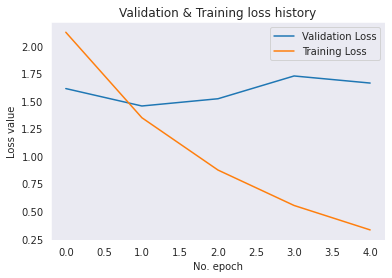

In [318]:
plot_loss(GRU_model_history)

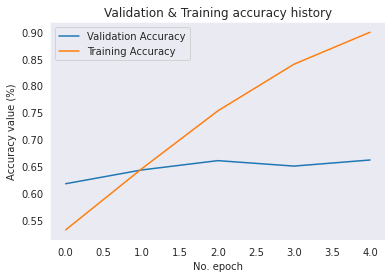

In [319]:
plot_accuracy(GRU_model_history)

In [320]:
# Test the model after training
test_results = GRU_model.evaluate(x_test, y_test, verbose=False)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {100*test_results[1]}%')

Test results - Loss: 1.7688028812408447 - Accuracy: 62.2461199760437%


In [321]:
y_pred = GRU_model.predict_classes(x_test)

<Figure size 432x288 with 0 Axes>

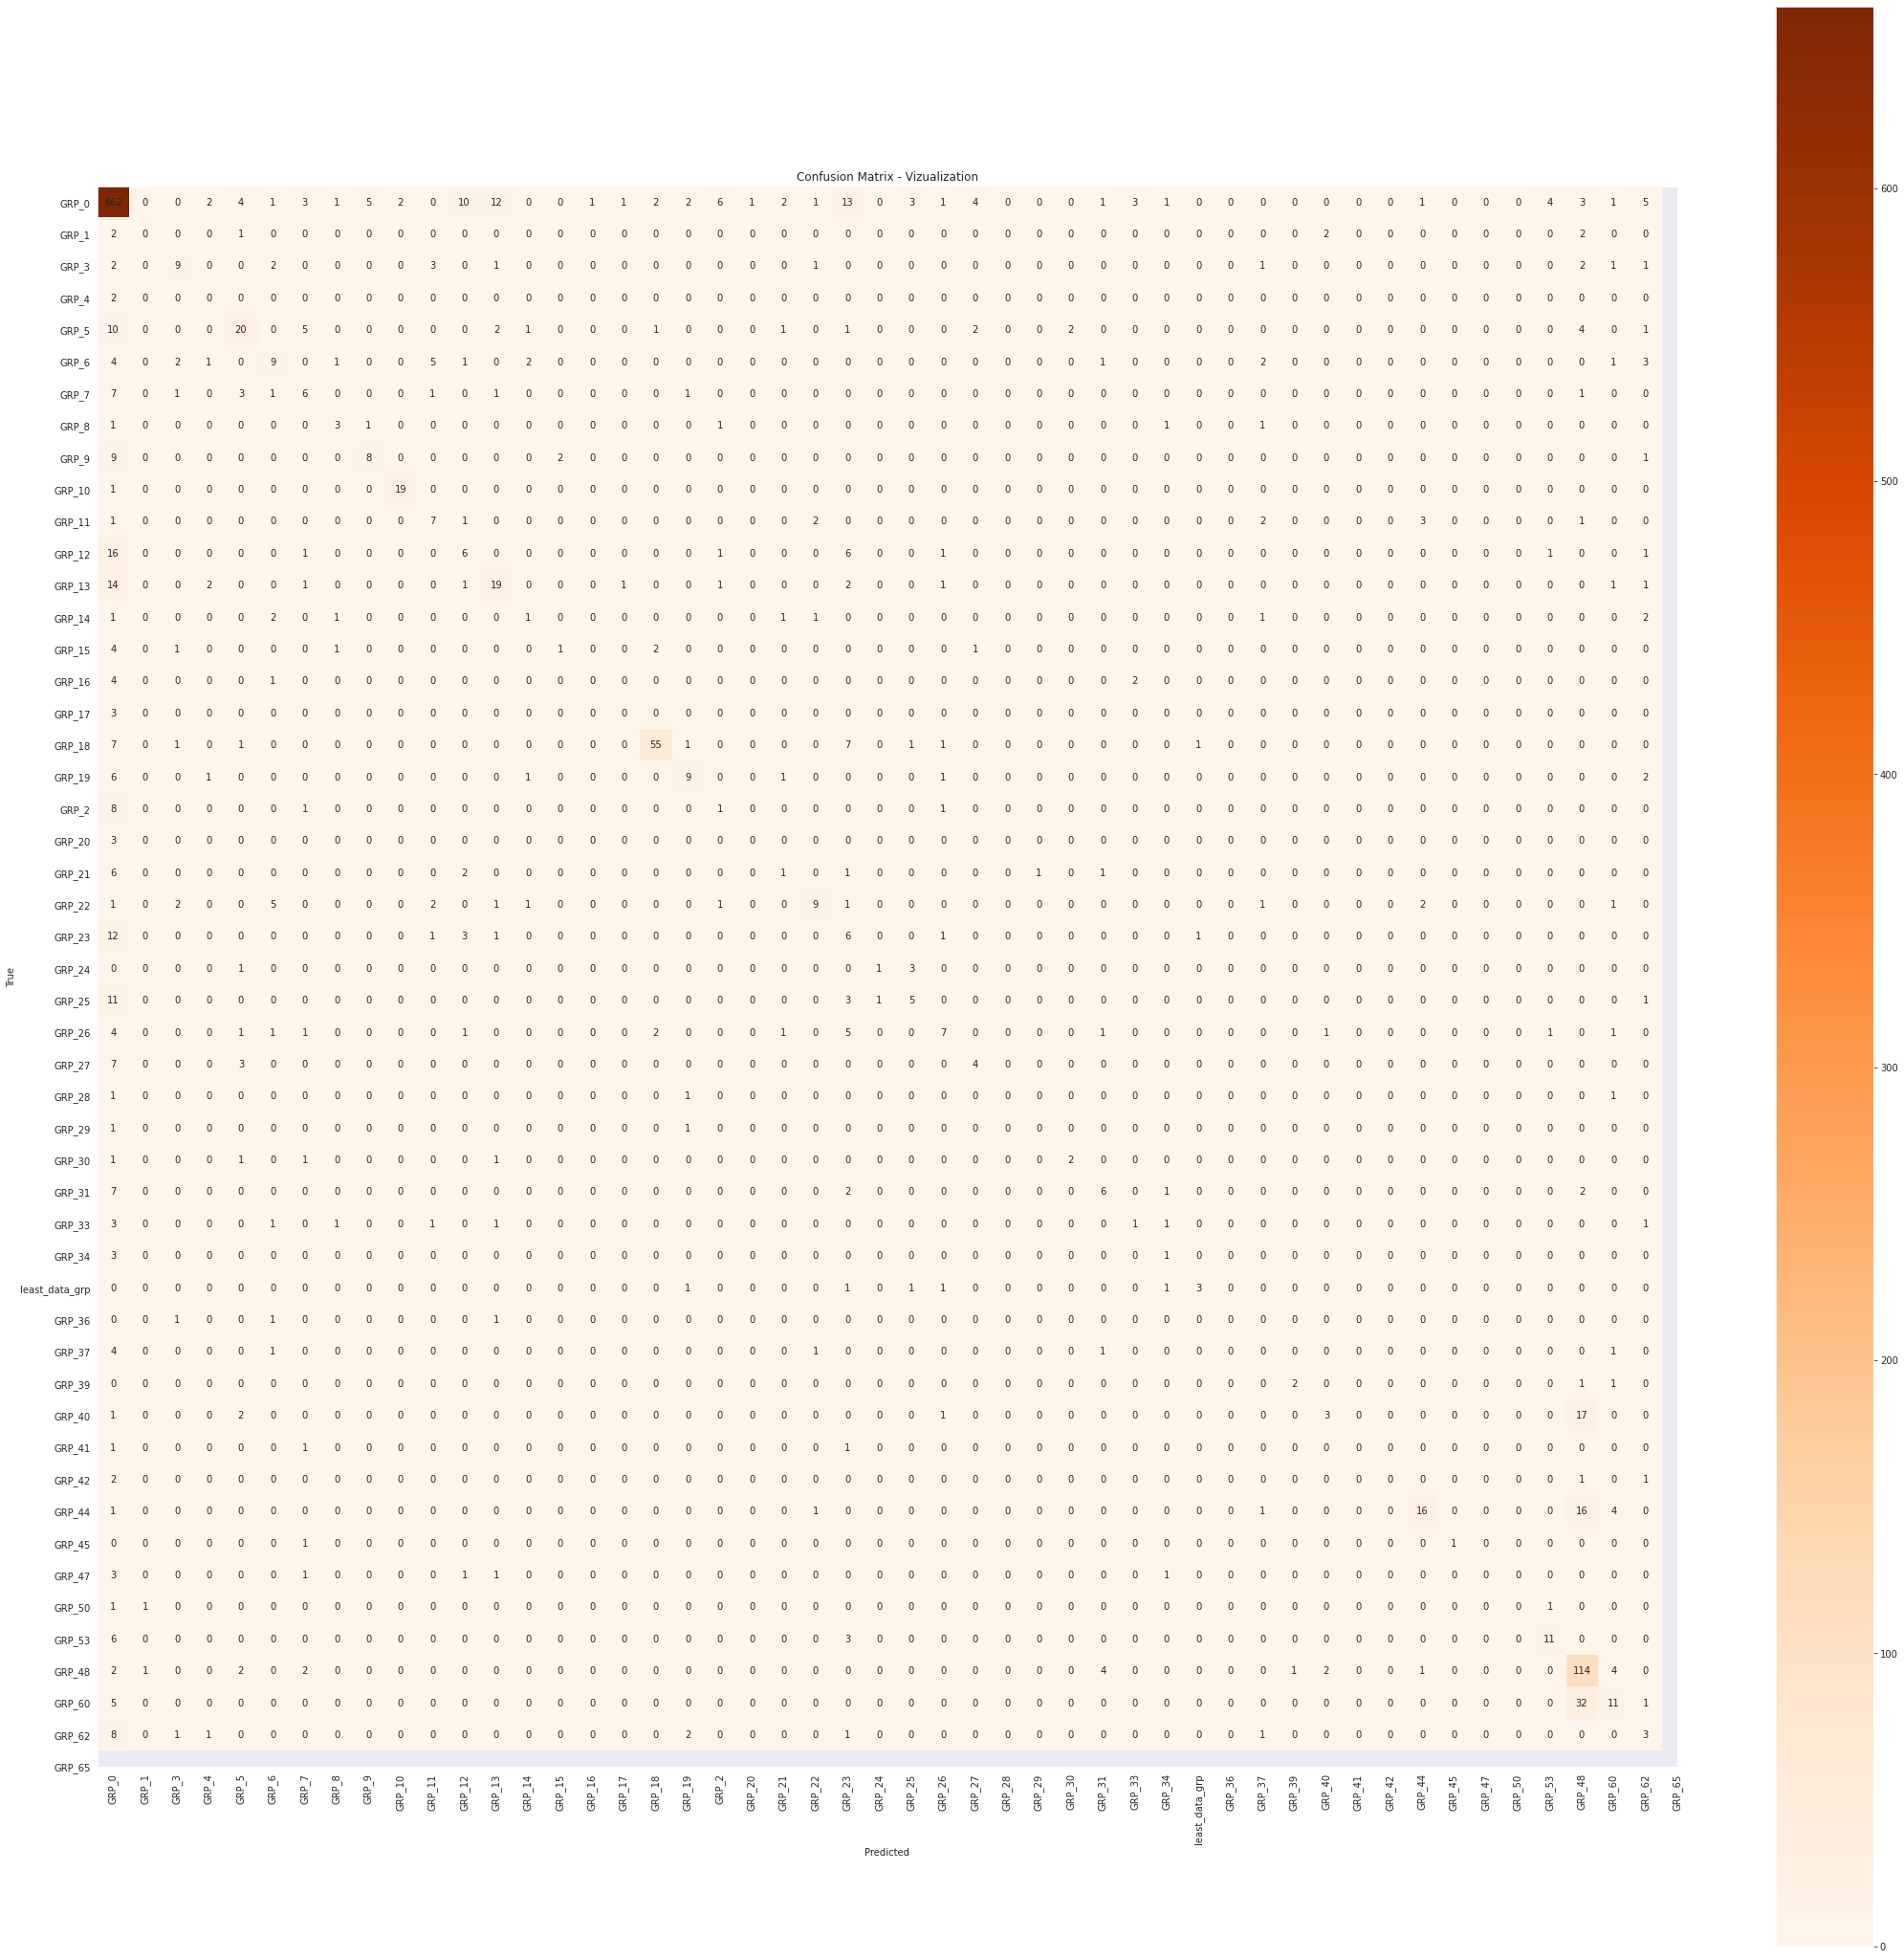

In [322]:
GRU_model_report, GRU_model_Accuracy_Score,GRU_model_F1_Score = calculate_Accuracy_F1_Score(y_test, y_pred)

In [323]:
print("Accuracy_Score: ", GRU_model_Accuracy_Score)
print("F1 Score: ", GRU_model_F1_Score)
print(GRU_model_report)

Accuracy_Score:  0.6224611708482676
F1 Score:  0.6017317547749582
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       758
           1       0.00      0.00      0.00         7
           2       0.50      0.39      0.44        23
           3       0.00      0.00      0.00         2
           4       0.51      0.40      0.45        50
           5       0.36      0.28      0.32        32
           6       0.25      0.27      0.26        22
           7       0.38      0.38      0.38         8
           8       0.57      0.40      0.47        20
           9       0.90      0.95      0.93        20
          10       0.35      0.41      0.38        17
          11       0.23      0.18      0.20        33
          12       0.46      0.43      0.45        44
          13       0.17      0.10      0.12        10
          14       0.33      0.10      0.15        10
          15       0.00      0.00      0.00         7
          16   

### Compare the Models

In [324]:
AppendModelResults('GRU Model',GRU_model_Accuracy_Score,GRU_model_F1_Score)

Accuracy  F1 Score
LR_Model                                0.642772  0.553273
LR_Grped                                0.611111  0.514081
SVC Model                               0.643369  0.553122
SVC_Grped                               0.613501  0.519972
Decision Tree                           0.599761  0.586772
Decision Tree Grped                     0.580645  0.573504
Random Forest                           0.659498  0.589122
Random Forest Grped                     0.636798  0.564951
AdaBoost                                0.517324  0.386926
AdaBoost Grped                          0.486260  0.361604
Sequential NLP                          0.574074  0.500027
LSTM with Word2Vec                      0.560932  0.476163
LSTM with Glove                         0.578256  0.531280
BiDirectional LSTM with Glove           0.605735  0.578127
BiDirectional LSTM with 50 Dimensions   0.587216  0.523063
Bidirectional LSTM with 200 Dimensions  0.567503  0.470190
BiDirectional LSTM with 300 Dimensions  0.587814  0.490047
BiDirectional LSTM with LR 0.0001       0.516129  0.360143
BiDirectional LSTM with 256 units       0.541816  0.398733
Multiple LSTM                           0.529869  0.457035
LSTM with Return Sequences              0.583035  0.516597
RNN Model                               0.505376  0.384452
GRU Model                               0.622461  0.601732

**Observations:**

1. GRU Model has performed better than LSTM with accuracy at 62% and F1 score at ~60%. This is the best model so far with respect to accuracy and F1 score when compared to all the models. Though the training acucracy jumped up to 80% (overfitting), the validation and test accuracy were only in the range of 60%



# State of the art Models

In this section, we will see 2 state of the art models.
1. ULMFit
2. BERT

## ULMFit Model

Universal Language Model FIne-Tuning(ULMFIT) is a transfer learning technique which can help in various NLP tasks. ULMFiT involves 3 major stages: 
1. LM pre-training
2. LM fine-tuning
3. Classifier fine-tuning

The method is universal:
1. It works across tasks varying in document size, number, and label type.
2. It uses a single architecture and training process.
3. It requires no custom feature engineering or pre-processing.
4. It does not require additional in-domain documents or labels.

### Load the data and initialize the variables

In [325]:
from fastai.text import *

In [326]:
n_epochs = 5 # how many times to iterate over all samples
n_splits = 5 # Number of K-fold Splits
SEED = 10
debug = 0

In [327]:
ULMData = Final_Data_Grouped.copy()
print(ULMData.shape)
ULMData.head()

(8368, 7)


Description  ... EncodedGroup
0  login issue verified user details employee man...  ...            0
1  outlook meetings skype etc appearing calendar ...  ...            0
2                                       cant log vpn  ...            0
3                         unable access hr tool page  ...            0
4                                        skype error  ...            0

[5 rows x 7 columns]

In [328]:
ULMData = ULMData.drop(['length','num_words','bins','BagOfWords','AssignmentGroup'],axis=1)
ULMData.head()

Description  EncodedGroup
0  login issue verified user details employee man...             0
1  outlook meetings skype etc appearing calendar ...             0
2                                       cant log vpn             0
3                         unable access hr tool page             0
4                                        skype error             0

### Split the data into Train, Test and Validation datasets

In [329]:
#Split the data into Train, test and validation data frames
rng = RandomState()

train_data = ULMData.sample(frac=0.8, random_state=rng)
test_df = ULMData.loc[~ULMData.index.isin(train_data.index)]

In [330]:
print(train_data.shape,test_df.shape)

(6694, 2) (1674, 2)


In [331]:
rng1 = RandomState()
train_df = train_data.sample(frac=0.75, random_state=rng1)
valid_df = train_data.loc[~train_data.index.isin(train_df.index)]

In [332]:
print(train_df.shape, valid_df.shape, test_df.shape)


(5020, 2) (1674, 2) (1674, 2)


### Language modeling

In [333]:
# Language model data : We use test_df as validation for language model
data_lm = TextLMDataBunch.from_df(path = "",train_df= train_df ,valid_df = valid_df,test_df=test_df,text_cols='Description', label_cols='EncodedGroup')
data_lm.show_batch()

In [334]:
#train the model with model learner and LSTM algorithm
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)
#fit the trained model
learn.fit_one_cycle(1, 1e-2)

As seen above, the accuracy is very low at 11%. Lets call the learning rate find method to find the best learning rate that can be used for the model.

In [335]:
#find the best learning rate
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 4.79E-02
Min loss divided by 10: 7.59E-02
0.0478630092322638


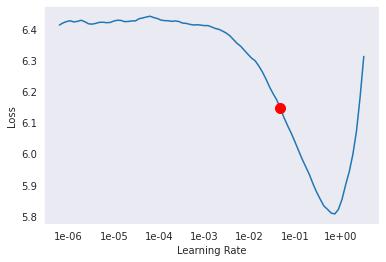

In [336]:
#plot the findings
learn.recorder.plot(suggestion=True)
min_lr = learn.recorder.min_grad_lr
print(min_lr)

**Observation**: 

Initially the loss starts reducing and after 5-6 epochs, the loss started increasing again as shown in the graph above. Now, lets try to use the best learning rate for which the loss is low and fit the model

In [337]:
learn.fit_one_cycle(2, min_lr)

**Observation:**

With the best learning rate, the accuracy has increased from 11% to 31%

In [338]:
#Save the model
learn.save('fit_head')

### LM Fine tuning with unfreezing and more Epochs

In [339]:
#unfreezing the layers in the model
learn.unfreeze()

In [340]:
#fitting the model with 5 epochs
learn.fit_one_cycle(5, 1e-3,moms=(0.9,0.8))

In [341]:
#Save the model
learn.save('fine_tuned')

In [342]:
#Save the model encoder
learn.save_encoder('fine_tuned_enc')

In [343]:
learn.predict('password', n_words=10)

'password reset xxbos ba png alert prod full deleted dmvpn rtr'

**Observation:**

Unfreezing the layers did not improve the accuracy much from 30%

### Build the ULM Classifier Model

In [344]:
# Creating Classification Data
print("Creating Classification Data")
data_clas = TextClasDataBunch.from_df(path ="", train_df=train_df, valid_df =valid_df,vocab=data_lm.train_ds.vocab, bs=32,label_cols = 'EncodedGroup',text_cols='Description')

Creating Classification Data


In [345]:
data_clas.show_batch()

In [ ]:
print("Creating Classifier Object")
claslearn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
claslearn.load_encoder('fine_tuned_enc')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.74E-01
Min loss divided by 10: 2.51E-02


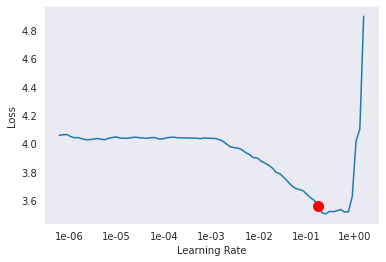

In [347]:
claslearn.lr_find()
claslearn.recorder.plot(suggestion=True)
min_grad_lr = claslearn.recorder.min_grad_lr

In [348]:
claslearn.fit_one_cycle(2, min_grad_lr)

**Observation:**

With classifier model, the accuracy has improved to 55%

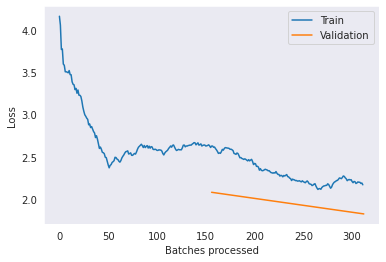

In [349]:
claslearn.recorder.plot_losses()

In [350]:
#unfreezing the last 2 layers alone
claslearn.freeze_to(-2)
claslearn.fit_one_cycle(5, slice(5e-3, 2e-3), moms=(0.8,0.7))

Observation:

The accuracy has improved to 61% when last 2 layers are unfreezed.

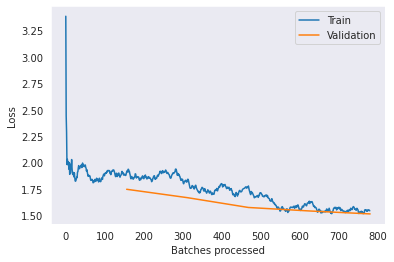

In [351]:
claslearn.recorder.plot_losses()

In [352]:
claslearn.unfreeze()
claslearn.fit_one_cycle(5, slice(2e-3/100, 2e-3), moms=(0.8,0.7))

In [ ]:
preds = claslearn.predict(test_df.Description)
print(preds)

In [354]:
def evaluate():
  texts = test_df['Description'].values
  labels = test_df['EncodedGroup'].values
  preds = []
  for t in texts:
    preds.append(claslearn.predict(t)[1].numpy())
  return preds, labels

In [355]:
preds, labels = evaluate()

<Figure size 432x288 with 0 Axes>

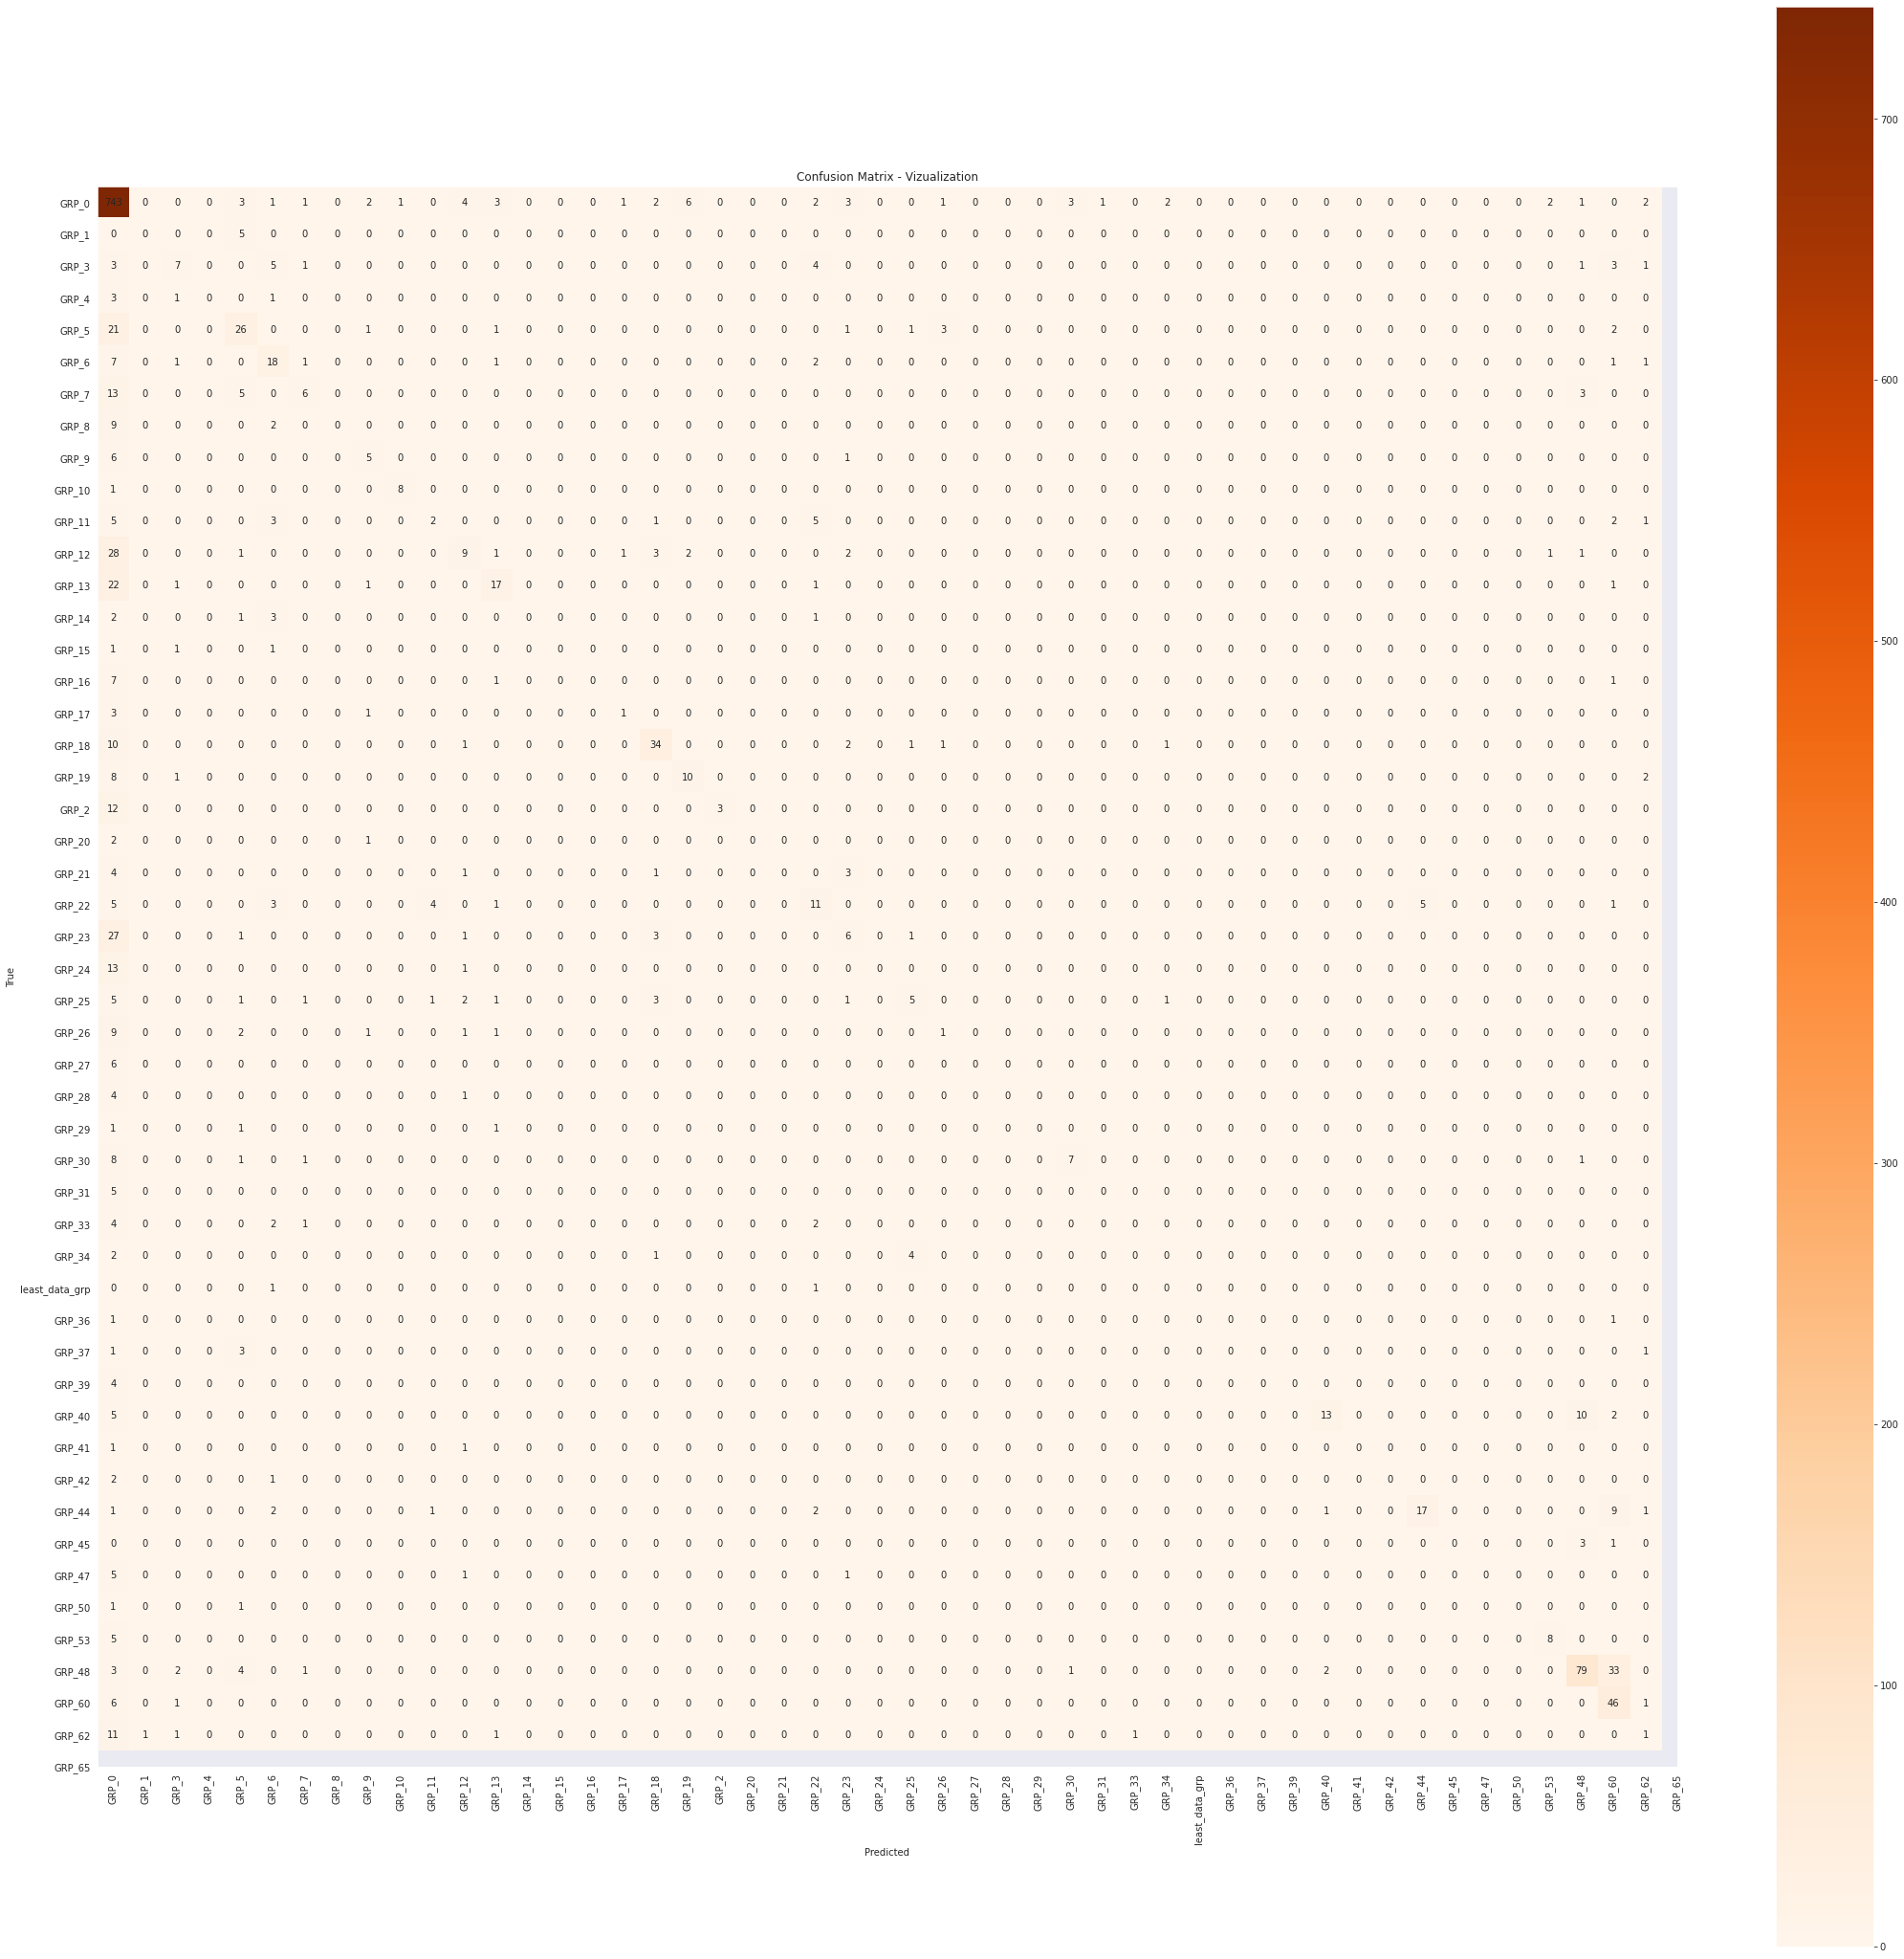

In [356]:
ULMReport, ULMAccuracyScore, ULMF1Score = calculate_Accuracy_F1_Score(labels,preds)

In [357]:
print("Accuracy_Score: ", ULMAccuracyScore)
print("F1 Score: ", ULMF1Score)
print(ULMReport)

Accuracy_Score:  0.6469534050179212
F1 Score:  0.5960486450855724
              precision    recall  f1-score   support

           0       0.71      0.95      0.81       784
           1       0.00      0.00      0.00         5
           2       0.44      0.28      0.34        25
           3       0.00      0.00      0.00         5
           4       0.47      0.46      0.47        56
           5       0.42      0.56      0.48        32
           6       0.46      0.22      0.30        27
           7       0.00      0.00      0.00        11
           8       0.42      0.42      0.42        12
           9       0.89      0.89      0.89         9
          10       0.25      0.11      0.15        19
          11       0.39      0.18      0.25        49
          12       0.59      0.40      0.47        43
          13       0.00      0.00      0.00         7
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         9
          16   

### Compare the Models

In [358]:
AppendModelResults('ULMFit Model',ULMAccuracyScore, ULMF1Score)

Accuracy  F1 Score
LR_Model                                0.642772  0.553273
LR_Grped                                0.611111  0.514081
SVC Model                               0.643369  0.553122
SVC_Grped                               0.613501  0.519972
Decision Tree                           0.599761  0.586772
Decision Tree Grped                     0.580645  0.573504
Random Forest                           0.659498  0.589122
Random Forest Grped                     0.636798  0.564951
AdaBoost                                0.517324  0.386926
AdaBoost Grped                          0.486260  0.361604
Sequential NLP                          0.574074  0.500027
LSTM with Word2Vec                      0.560932  0.476163
LSTM with Glove                         0.578256  0.531280
BiDirectional LSTM with Glove           0.605735  0.578127
BiDirectional LSTM with 50 Dimensions   0.587216  0.523063
Bidirectional LSTM with 200 Dimensions  0.567503  0.470190
BiDirectional LSTM with 300 Dimensions  0.587814  0.490047
BiDirectional LSTM with LR 0.0001       0.516129  0.360143
BiDirectional LSTM with 256 units       0.541816  0.398733
Multiple LSTM                           0.529869  0.457035
LSTM with Return Sequences              0.583035  0.516597
RNN Model                               0.505376  0.384452
GRU Model                               0.622461  0.601732
ULMFit Model                            0.646953  0.596049

**Observation:**

1. Classification accuracy was 55% when all the layers are freezed.
2. Accuracy improved to 63% when the last 2 layers were unfreezed..
3. Accuracy had a very slight increase to 61% when all the layers where unfreezed.
4. The model performed well with 64% accuracy and 60% F1 Score


In [363]:
#Exporting the compare_models dataframe to csv before running the bert model
#Since bert model uses tensorflor 1.15, uninstalling the existing tensorflow version
#will cause all the variables to be lost. So saving the results dataframe
Compare_Models.to_excel(project_path+'TestResults.xlsx',index=True, index_label='Model')


## BERT 

BERT stands for Bidirectional Encoder Representations from Transformers. It is designed to pre-train deep bidirectional representations from unlabeled text by jointly conditioning on both left and right context. As a result, the pre-trained BERT model can be fine-tuned with just one additional output layer to create state-of-the-art models for a wide range of NLP tasks.

### Install necessary packages and import the headers

In [ ]:
!pip uninstall tensorflow==2.3.0
!pip install tensorflow-gpu==1.15.0
!pip install q keras==2.2.4

In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
device_name

'/device:GPU:0'

In [2]:
!wget -q https://raw.githubusercontent.com/google-research/bert/master/modeling.py 
!wget -q https://raw.githubusercontent.com/google-research/bert/master/optimization.py 
!wget -q https://raw.githubusercontent.com/google-research/bert/master/run_classifier.py 
!wget -q https://raw.githubusercontent.com/google-research/bert/master/tokenization.py 

In [ ]:
import os
import numpy as np
import pandas as pd
import datetime
import sys
import zipfile
import modeling
import optimization
import run_classifier
import tokenization

from run_classifier import FLAGS
from tokenization import FullTokenizer
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from sklearn.model_selection import train_test_split
import keras
import tensorflow_hub as hub
from tqdm import tqdm_notebook
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
import re
from keras.layers import Layer
import warnings
import logging

print(tf.__version__)
warnings.filterwarnings("ignore")

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # FATAL
logging.getLogger('tensorflow').setLevel(logging.FATAL)

In [4]:
sess = tf.Session()

# Params for bert model and tokenization
bert_path = "https://tfhub.dev/google/bert_uncased_L-12_H-768_A-12/1"
max_seq_length = 128       # MIt Initial value was: 512

### Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [6]:
#Set your project path 
project_path = '/content/drive/My Drive/Colab Notebooks/Capstone Working copy/'
input_df=pd.read_excel(project_path+'FinalDataGrouped.xlsx')
input_df.head()

Unnamed: 0  ...  bins
0           0  ...  0-30
1           1  ...  0-30
2           2  ...  0-30
3           3  ...  0-30
4           4  ...  0-30

[5 rows x 7 columns]

### Split the data into Train, test and validation datasets

In [7]:
### New - 
# Perform Label Encoding, Split into Test-train set
from sklearn.model_selection import train_test_split

train_ratio = 0.60
validation_ratio = 0.20
test_ratio = 0.20

label_encoder = LabelEncoder()
input_df['AssignmentGroup']= label_encoder.fit_transform(input_df['AssignmentGroup']) 

X = input_df['Description']
y = input_df['AssignmentGroup']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

In [8]:
## New
train_text = X_train.astype(str)
train_text = [' '.join(t.split()[0:max_seq_length]) for t in train_text]
train_text = np.array(train_text, dtype=object)[:, np.newaxis]
train_label = y_train

val_text = X_val.astype(str)
val_text = [' '.join(t.split()[0:max_seq_length]) for t in val_text]
val_text = np.array(val_text, dtype=object)[:, np.newaxis]
val_label = y_val

test_text = X_test.astype(str)
test_text = [' '.join(t.split()[0:max_seq_length]) for t in test_text]
test_text = np.array(test_text, dtype=object)[:, np.newaxis]

### Define the BERT layer

In [9]:
# Define the class for BERT layer that needs to be used in modeling

class BertLayer(Layer):
    
    '''BertLayer which support next output_representation param:
    
    pooled_output: the first CLS token after adding projection layer () with shape [batch_size, 768]. 
    sequence_output: all tokens output with shape [batch_size, max_length, 768].
    mean_pooling: mean pooling of all tokens output [batch_size, max_length, 768].
    
    
    You can simple fine-tune last n layers in BERT with n_fine_tune_layers parameter. For view trainable parameters call model.trainable_weights after creating model.
    
    '''
    
    def __init__(self, n_fine_tune_layers=10, tf_hub = None, output_representation = 'pooled_output', trainable = False, **kwargs):
        
        self.n_fine_tune_layers = n_fine_tune_layers
        self.is_trainble = trainable
        self.output_size = 768
        self.tf_hub = tf_hub
        self.output_representation = output_representation
        self.supports_masking = True
        
        super(BertLayer, self).__init__(**kwargs)

    def build(self, input_shape):

        self.bert = hub.Module(
            self.tf_hub,
            trainable=self.is_trainble,
            name="{}_module".format(self.name)
        )
        
        
        variables = list(self.bert.variable_map.values())
        if self.is_trainble:
            # 1 first remove unused layers
            trainable_vars = [var for var in variables if not "/cls/" in var.name]
            
            
            if self.output_representation == "sequence_output" or self.output_representation == "mean_pooling":
                # 1 first remove unused pooled layers
                trainable_vars = [var for var in trainable_vars if not "/pooler/" in var.name]
                
            # Select how many layers to fine tune
            trainable_vars = trainable_vars[-self.n_fine_tune_layers :]
            
            # Add to trainable weights
            for var in trainable_vars:
                self._trainable_weights.append(var)

            # Add non-trainable weights
            for var in self.bert.variables:
                if var not in self._trainable_weights:
                    self._non_trainable_weights.append(var)
                
        else:
             for var in variables:
                self._non_trainable_weights.append(var)
                

        super(BertLayer, self).build(input_shape)

    def call(self, inputs):
        inputs = [K.cast(x, dtype="int32") for x in inputs]
        input_ids, input_mask, segment_ids = inputs
        bert_inputs = dict(
            input_ids=input_ids, input_mask=input_mask, segment_ids=segment_ids
        )
        result = self.bert(inputs=bert_inputs, signature="tokens", as_dict=True)
        
        if self.output_representation == "pooled_output":
            pooled = result["pooled_output"]
            
        elif self.output_representation == "mean_pooling":
            result_tmp = result["sequence_output"]
        
            mul_mask = lambda x, m: x * tf.expand_dims(m, axis=-1)
            masked_reduce_mean = lambda x, m: tf.reduce_sum(mul_mask(x, m), axis=1) / (
                    tf.reduce_sum(m, axis=1, keepdims=True) + 1e-10)
            input_mask = tf.cast(input_mask, tf.float32)
            pooled = masked_reduce_mean(result_tmp, input_mask)
            
        elif self.output_representation == "sequence_output":
            
            pooled = result["sequence_output"]
       
        return pooled
    
    def compute_mask(self, inputs, mask=None):
        
        if self.output_representation == 'sequence_output':
            inputs = [K.cast(x, dtype="bool") for x in inputs]
            mask = inputs[1]
            
            return mask
        else:
            return None
        
        
    def compute_output_shape(self, input_shape):
        if self.output_representation == "sequence_output":
            return (input_shape[0][0], input_shape[0][1], self.output_size)
        else:
            return (input_shape[0][0], self.output_size)

### Model Building

In [10]:
# function the build the bert model using class BertLayer
def build_model(max_seq_length, tf_hub, n_classes, n_fine_tune): 
    in_id = keras.layers.Input(shape=(max_seq_length,), name="input_ids")
    in_mask = keras.layers.Input(shape=(max_seq_length,), name="input_masks")
    in_segment = keras.layers.Input(shape=(max_seq_length,), name="segment_ids")
    bert_inputs = [in_id, in_mask, in_segment]
    
    bert_output = BertLayer(n_fine_tune_layers=n_fine_tune, tf_hub = tf_hub, output_representation = 'mean_pooling', trainable = True)(bert_inputs)
    drop = keras.layers.Dropout(0.3)(bert_output)
    dense = keras.layers.Dense(128, activation='tanh')(drop)
    drop = keras.layers.Dropout(0.3)(dense)
    dense = keras.layers.Dense(64, activation='tanh')(drop)
    pred = keras.layers.Dense(n_classes, activation='softmax')(dense)
    
    model = keras.models.Model(inputs=bert_inputs, outputs=pred)
    Adam = keras.optimizers.Adam(lr = 0.001)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam, metrics=['sparse_categorical_accuracy'])
    model.summary()

    return model

def initialize_vars(sess):
    sess.run(tf.local_variables_initializer())
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    K.set_session(sess)

In [11]:
n_classes = len(label_encoder.classes_)
n_fine_tune_layers = 5
model = build_model(max_seq_length, bert_path, n_classes, n_fine_tune_layers)

# Instantiate variables
initialize_vars(sess)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          (None, 128)          0                                            
__________________________________________________________________________________________________
input_masks (InputLayer)        (None, 128)          0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        (None, 128)          0                                            
__________________________________________________________________________________________________
bert_layer_1 (BertLayer)        (None, 768)          110104890   input_ids[0][0]                  
                                                                 input_masks[0][0]                
          

In [12]:
model.trainable_weights

[<tf.Variable 'bert_layer_1_module/bert/encoder/layer_11/intermediate/dense/bias:0' shape=(3072,) dtype=float32>,
 <tf.Variable 'bert_layer_1_module/bert/encoder/layer_11/output/dense/kernel:0' shape=(3072, 768) dtype=float32>,
 <tf.Variable 'bert_layer_1_module/bert/encoder/layer_11/output/dense/bias:0' shape=(768,) dtype=float32>,
 <tf.Variable 'bert_layer_1_module/bert/encoder/layer_11/output/LayerNorm/beta:0' shape=(768,) dtype=float32>,
 <tf.Variable 'bert_layer_1_module/bert/encoder/layer_11/output/LayerNorm/gamma:0' shape=(768,) dtype=float32>,
 <tf.Variable 'dense_1/kernel:0' shape=(768, 128) dtype=float32_ref>,
 <tf.Variable 'dense_1/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'dense_2/kernel:0' shape=(128, 64) dtype=float32_ref>,
 <tf.Variable 'dense_2/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'dense_3/kernel:0' shape=(64, 50) dtype=float32_ref>,
 <tf.Variable 'dense_3/bias:0' shape=(50,) dtype=float32_ref>]

### Tokenization

In [13]:
class PaddingInputExample(object):
    """Fake example so the num input examples is a multiple of the batch size.
  When running eval/predict on the TPU, we need to pad the number of examples
  to be a multiple of the batch size, because the TPU requires a fixed batch
  size. The alternative is to drop the last batch, which is bad because it means
  the entire output data won't be generated.
  We use this class instead of `None` because treating `None` as padding
  battches could cause silent errors.
  """

class InputExample(object):
    """A single training/test example for simple sequence classification."""

    def __init__(self, guid, text_a, text_b=None, label=None):
        """Constructs a InputExample.
    Args:
      guid: Unique id for the example.
      text_a: string. The untokenized text of the first sequence. For single
        sequence tasks, only this sequence must be specified.
      text_b: (Optional) string. The untokenized text of the second sequence.
        Only must be specified for sequence pair tasks.
      label: (Optional) string. The label of the example. This should be
        specified for train and dev examples, but not for test examples.
    """
        self.guid = guid
        self.text_a = text_a
        self.text_b = text_b
        self.label = label

def create_tokenizer_from_hub_module(tf_hub):
    """Get the vocab file and casing info from the Hub module."""
    bert_module =  hub.Module(tf_hub)
    tokenization_info = bert_module(signature="tokenization_info", as_dict=True)
    vocab_file, do_lower_case = sess.run(
        [
            tokenization_info["vocab_file"],
            tokenization_info["do_lower_case"],
        ]
    )
    
    return FullTokenizer(vocab_file=vocab_file, do_lower_case=do_lower_case)

def convert_single_example(tokenizer, example, max_seq_length=256):
    """Converts a single `InputExample` into a single `InputFeatures`."""

    if isinstance(example, PaddingInputExample):
        input_ids = [0] * max_seq_length
        input_mask = [0] * max_seq_length
        segment_ids = [0] * max_seq_length
        label = 0
        return input_ids, input_mask, segment_ids, label

    tokens_a = tokenizer.tokenize(example.text_a)
    if len(tokens_a) > max_seq_length - 2:
        tokens_a = tokens_a[0 : (max_seq_length - 2)]

    tokens = []
    segment_ids = []
    tokens.append("[CLS]")
    segment_ids.append(0)
    for token in tokens_a:
        tokens.append(token)
        segment_ids.append(0)
    tokens.append("[SEP]")
    segment_ids.append(0)
    
    #print(tokens)
    input_ids = tokenizer.convert_tokens_to_ids(tokens)

    # The mask has 1 for real tokens and 0 for padding tokens. Only real
    # tokens are attended to.
    input_mask = [1] * len(input_ids)

    # Zero-pad up to the sequence length.
    while len(input_ids) < max_seq_length:
        input_ids.append(0)
        input_mask.append(0)
        segment_ids.append(0)

    assert len(input_ids) == max_seq_length
    assert len(input_mask) == max_seq_length
    assert len(segment_ids) == max_seq_length

    return input_ids, input_mask, segment_ids, example.label

def convert_examples_to_features(tokenizer, examples, max_seq_length=256):
    """Convert a set of `InputExample`s to a list of `InputFeatures`."""

    input_ids, input_masks, segment_ids, labels = [], [], [], []
    for example in tqdm_notebook(examples, desc="Converting examples to features"):
        input_id, input_mask, segment_id, label = convert_single_example(
            tokenizer, example, max_seq_length
        )
        input_ids.append(input_id)
        input_masks.append(input_mask)
        segment_ids.append(segment_id)
        labels.append(label)
    return (
        np.array(input_ids),
        np.array(input_masks),
        np.array(segment_ids),
        np.array(labels).reshape(-1, 1),
    )

def convert_text_to_examples(texts, labels):
    """Create InputExamples"""
    InputExamples = []
    for text, label in zip(texts, labels):
        InputExamples.append(
            InputExample(guid=None, text_a=" ".join(text), text_b=None, label=label)
        )
    return InputExamples


In [14]:
# Instantiate tokenizer
tokenizer = create_tokenizer_from_hub_module(bert_path)

# Convert data to InputExample format
train_examples = convert_text_to_examples(train_text, train_label)
val_examples = convert_text_to_examples(val_text, val_label)

# Convert to features
(train_input_ids, train_input_masks, train_segment_ids, train_labels 
) = convert_examples_to_features(tokenizer, train_examples, max_seq_length=max_seq_length)
(val_input_ids, val_input_masks, val_segment_ids, val_labels
) = convert_examples_to_features(tokenizer, val_examples, max_seq_length=max_seq_length)



### Model Training

In [15]:
from keras.callbacks import EarlyStopping

BATCH_SIZE = 64     # Reduced batch size from 256 to 128 (increase in accuracy), will reduce to 32 and increase Epochs
MONITOR = 'val_sparse_categorical_accuracy'
print('BATCH_SIZE is {}'.format(BATCH_SIZE))
e_stopping = EarlyStopping(monitor=MONITOR, patience=3, verbose=1, mode='max', restore_best_weights=True)
callbacks =  [e_stopping]

history = model.fit(
   [train_input_ids, train_input_masks, train_segment_ids], 
    train_labels,
    validation_data = ([val_input_ids, val_input_masks, val_segment_ids], val_labels),
    epochs = 10,
    verbose = 1,
    batch_size = BATCH_SIZE, callbacks = callbacks
)

BATCH_SIZE is 64
Train on 5020 samples, validate on 1674 samples
Epoch 1/10
5020/5020 [==============================] - 63s 13ms/step - loss: 2.3713 - sparse_categorical_accuracy: 0.4922 - val_loss: 2.1578 - val_sparse_categorical_accuracy: 0.5221
Epoch 2/10
5020/5020 [==============================] - 61s 12ms/step - loss: 2.0140 - sparse_categorical_accuracy: 0.5446 - val_loss: 1.9698 - val_sparse_categorical_accuracy: 0.5400
Epoch 3/10
5020/5020 [==============================] - 63s 13ms/step - loss: 1.8305 - sparse_categorical_accuracy: 0.5663 - val_loss: 1.8863 - val_sparse_categorical_accuracy: 0.5484
Epoch 4/10
5020/5020 [==============================] - 65s 13ms/step - loss: 1.7094 - sparse_categorical_accuracy: 0.5833 - val_loss: 1.7876 - val_sparse_categorical_accuracy: 0.5705
Epoch 5/10
5020/5020 [==============================] - 66s 13ms/step - loss: 1.6147 - sparse_categorical_accuracy: 0.5984 - val_loss: 1.7210 - val_sparse_categorical_accuracy: 0.5759
Epoch 6/10
5020

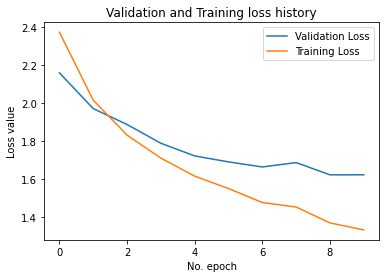

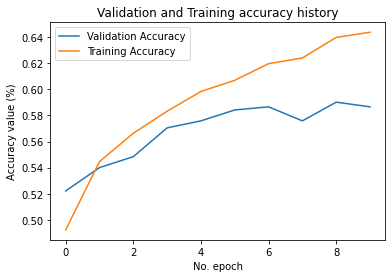

In [16]:
# Visualize history
# Plot history: Validation loss
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Validation and Training loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_sparse_categorical_accuracy'], label = 'Validation Accuracy')
plt.plot(history.history['sparse_categorical_accuracy'], label = 'Training Accuracy')
plt.title('Validation and Training accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

**Observation:**

Training loss and Accuracy are better than Validation loss and accuracy but this is expected.

### Model testing and Prediction

In [17]:
test_examples = convert_text_to_examples(test_text, np.zeros(len(test_text)))

In [18]:
(test_input_ids, test_input_masks, test_segment_ids, test_labels
) = convert_examples_to_features(tokenizer, test_examples, max_seq_length=max_seq_length)

In [19]:
# Test the model after training
test_results = model.evaluate([test_input_ids, test_input_masks, test_segment_ids], test_labels, verbose=False)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {100*test_results[1]}%')

Test results - Loss: 2.1426353021619424 - Accuracy: 58.422939068100355%


In [20]:
prediction = model.predict([test_input_ids, test_input_masks, test_segment_ids], verbose = 1)

1674/1674 [==============================] - 17s 10ms/step


In [21]:
preds = np.argmax(prediction, axis =1)

In [22]:
from sklearn.metrics import accuracy_score,f1_score,classification_report
Bert_Accuracy_Score = accuracy_score(y_test, preds)
print('accuracy %s' % Bert_Accuracy_Score)
Bert_F1_Score = f1_score(y_test, preds,average='weighted')
print('Testing F1 score: {}'.format(Bert_F1_Score))
print(classification_report(y_test, preds))

accuracy 0.5973715651135006
Testing F1 score: 0.52847436632961
              precision    recall  f1-score   support

           0       0.73      0.92      0.81       780
           1       0.00      0.00      0.00         5
           2       0.83      0.40      0.54        25
           3       0.00      0.00      0.00         9
           4       0.24      0.67      0.36        58
           5       0.22      0.26      0.24        19
           6       0.18      0.23      0.20        26
           7       0.00      0.00      0.00         7
           8       0.38      0.31      0.34        16
           9       0.62      0.83      0.71         6
          10       0.07      0.08      0.07        13
          11       0.00      0.00      0.00        44
          12       0.32      0.26      0.29        47
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         7
          15       0.00      0.00      0.00         2
          16      

**Observations:**

1. BERT model has an accuracy of 59% and F1 Score of 53%. But this is not the best performing model compared to other models seen above.


# Visual Representaion of performance of all the Models

### Display Results

In [30]:
#Load the test results data and append the accuracy score of bert model
Resultsdf = pd.read_excel(project_path + 'TestResults.xlsx')
new_row = ['BERT Model', Bert_Accuracy_Score,Bert_F1_Score]
Resultsdf = Resultsdf.append(pd.Series(new_row,index=Resultsdf.columns,name=24))
display(Resultsdf)

Model  Accuracy  F1 Score
0                                 LR_Model  0.642772  0.553273
1                                 LR_Grped  0.611111  0.514081
2                                SVC Model  0.643369  0.553122
3                                SVC_Grped  0.613501  0.519972
4                            Decision Tree  0.599761  0.586772
5                      Decision Tree Grped  0.580645  0.573504
6                            Random Forest  0.659498  0.589122
7                      Random Forest Grped  0.636798  0.564951
8                                 AdaBoost  0.517324  0.386926
9                           AdaBoost Grped  0.486260  0.361604
10                          Sequential NLP  0.574074  0.500027
11                      LSTM with Word2Vec  0.560932  0.476163
12                         LSTM with Glove  0.578256  0.531280
13           BiDirectional LSTM with Glove  0.605735  0.578127
14   BiDirectional LSTM with 50 Dimensions  0.587216  0.523063
15  Bidirectional LSTM with 200 Dimensions  0.567503  0.470190
16  BiDirectional LSTM with 300 Dimensions  0.587814  0.490047
17       BiDirectional LSTM with LR 0.0001  0.516129  0.360143
18       BiDirectional LSTM with 256 units  0.541816  0.398733
19                           Multiple LSTM  0.529869  0.457035
20              LSTM with Return Sequences  0.583035  0.516597
21                               RNN Model  0.505376  0.384452
22                               GRU Model  0.622461  0.601732
23                            ULMFit Model  0.646953  0.596049
24                              BERT Model  0.597372  0.528474

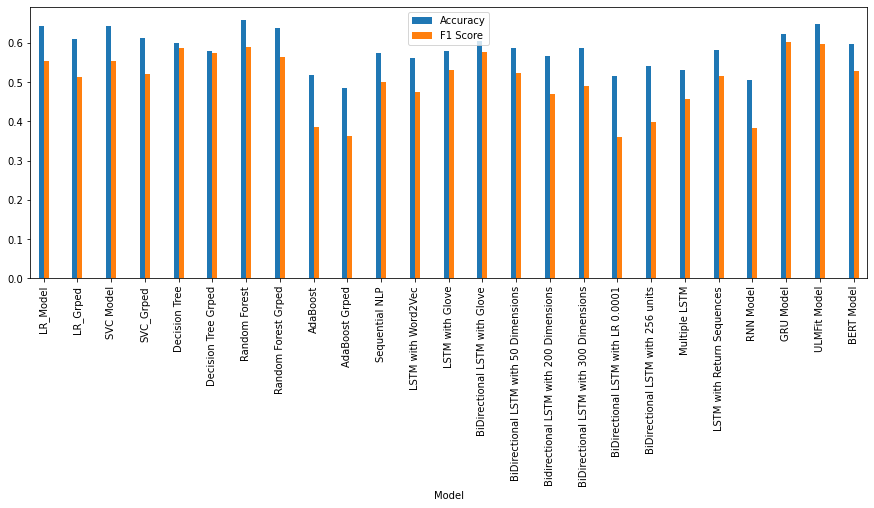

In [59]:
ax = Resultsdf.plot(x='Model', y = ['Accuracy', 'F1 Score'], kind='bar', width=0.3, figsize=(15,5))

# **Challenges**

**1. Handling of Skewed Data:**

The given data-set is heavily skewed based on the tickets assigned to the groups. Hence we had different approaches among us.


> Approach 1 – Dropping the groups which has less tickets assigned into it and to model for the data or Combining the groups which have least tickets assigned to form a group and consider that one among the group, hence we are not dropping even one value and not taking the risk of losing even a single value.

> Approach 2 – Include every group information for modelling and not dropping or combining any of them.

Finally, to address an individual person’s concern, we neither dropped nor used the group information as is, we decided to combine the least value group and treat it as one group.


**2. Handling of Junk Values:**

The data-set had to be cleansed and handled for numerous type of junk value and at the same time we have some essential values which might looks like junk value, so most of the project duration had gone for the finalising the approach to derive the functions we had to cleanse the data and to retain essential information for classification

**3. Handling of other languages:**

The given dataset had the ticket description in both English and German languages. So we had to convert the ticket descriptions in German to English before proceeding. For this we used the google translator web-service. 

**4. Tensorflow compatibility for BERT model**

The BERT model we build used tensorflow 1.x version where as the default version of tensorflow in google colab is 2.3 and all the other deep learning models including LSTM were built using Tensorflow version 2.x. So there were challenges in integrating all the models together and we had to switch the tensorflow version to 1.x while running the BERT model.

# **Conclusion**

* The given problem involved classifying the ticket assignments based on the description and short description columns. 

* The data pre-processing was done by removing all the junk characters, translating to english text, removing stop words, tokenization, and Lemmatization. 

* Then **bi-grams, tri-grams model and word clouds** were built to understand the mapping between language and the ticket groups. 

* Different Machine learning Models such as Logistic Regression, SVC, Decision Tree, Random Forest and Ada Boost Classifier with TFIDF vectorization were built and executed.

* **Random Forest and Decision Tree Models** performed well compared to other Machine learning models.

* The metrics mainly used for model comparison and evaluation were **Accuracy Score, F1 Score. Classification Report and confusion matrix** were also generated for all the models.

* Different deep learning algorithms such as Sequential NLP, Simple LSTM, Bidirectional LSTM, RNN and GRU models were also built. 

* The Embeddings used were **Word2Vec and GLOVE**. Since GLOVE embeddings performed better compared to Word2Vec, GLOVE was predominantly used in most of the models.

* **Hyper parameter tuning** was also done for different parameters such as maxlen, embedding size, epochs, batch size, learning rate, etc

* **GRU Model** is the best model in deep learning algorithms followed by **Bidirectional LSTM with Glove**.

*  Also, state of the art models such as **ULMFit and BERT** were also built and executed. 

* All these algorithms were run on google colabs and the code was developed on **Tensorflow Keras** libraries. 

* The test results of all these algorithms with their accuracy and F1 scores have been added to a separate dataframe and provided in the notebook. A **comparison of all the Models** were also done. 

* The accuracy and F1 score of all the models are less than 65%. This is because the given data is highly skewed with GRP_0 data. **Accuracy, F1 Score < 65%**

* The Top 3 Performing models were:
      1. ULMFit
      2. GRU
      3. BiDirectional LSTM with Glove 

# **Future Work (to be done)**

**1. Data Sampling:**

More data about other assignment groups need to be collected and the data needs to be sampled inorder for the algorithms to improve upon the accuracy scores.
  
**2. Two Model Approach for Grp 0 and rest of the groups:**

Another approach to tackle the skewness of data is by first running a binary classifier and identify whether the ticket belongs to GRP_0 or not. Once done, another multi-class classifier can be developed to run the model to classify the ticket in rest of the assignment groups.

**3. ML Pipeline to automate the Model Buiding:**

Further a ML pipeline can also be developed using apache airflow to automate the model building process so that the models can be continuously evaluated for future data. 